In [1]:
from astropy import units as u
distance = 2.9*u.kpc

In [2]:
cd /orange/adamginsburg/salt

/orange/adamginsburg/salt


In [3]:
ls YichenKei/*

YichenKei/I16547A_NaCl_mom0_ticks.png
YichenKei/I16547A_NaCl_mom0_ticks_redbluecontours.png
YichenKei/I16547A_naclPV_withcolorcurves.png
YichenKei/I16547A.reg
YichenKei/I16547A_water_mom0_ticks.png
YichenKei/I16547B_NaCl_mom0_ticks.png
YichenKei/I16547B_naclPV_withcolorcurves.png
YichenKei/I16547B.reg
YichenKei/I16547_PeakA_H2O_pvdiagram.png
YichenKei/I16547_PeakA_NaCl_pvdiagram.png
YichenKei/I16547_PeakB_H2O_pvdiagram.png
YichenKei/I16547_PeakB_NaCl_pvdiagram.png
YichenKei/KCl_v_le_4_stackcubeB.fits
YichenKei/KCl_v_le_4_stackcube.fits
YichenKei/NaCl_v_le_3_stackcubeA.fits
YichenKei/NaCl_v_le_3_stackcubeB.fits
YichenKei/water_cube.fits

YichenKei/detected:
IRAS16547.232510MHz.NaCl_v=1.image.pbcor.fits*
IRAS16547.234252MHz.NaCl.image.pbcor.fits*

YichenKei/other:
IRAS16547.217980MHz.NaCl_v=2.image.pbcor.fits*
IRAS16547.219615MHz.NaCl_v=1.image.pbcor.fits*
IRAS16547.350969MHz.NaCl.image.pbcor.fits*
IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor.fits*

YichenKei/spectra:
figures/
I16547A.r

In [4]:
from spectral_cube import SpectralCube

In [5]:
cubev0 = SpectralCube.read('YichenKei/detected/IRAS16547.234252MHz.NaCl.image.pbcor.fits', use_dask=True)#.to(u.K)
cubev0

DaskSpectralCube with shape=(161, 1024, 1024) and unit=Jy / beam and chunk size (161, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    161  type_s: VRAD      unit_s: m / s  range:  -129952.786 m / s:   70020.571 m / s

In [6]:
cubev1 = SpectralCube.read('YichenKei/detected/IRAS16547.232510MHz.NaCl_v=1.image.pbcor.fits', use_dask=True)#.to(u.K)
cubev1

DaskSpectralCube with shape=(159, 1024, 1024) and unit=Jy / beam and chunk size (159, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    159  type_s: VRAD      unit_s: m / s  range:  -129436.166 m / s:   69516.903 m / s

In [7]:
cubev0.beam, cubev1.beam

(Beam: BMAJ=0.063343503 arcsec BMIN=0.063343503 arcsec BPA=0.0 deg,
 Beam: BMAJ=0.065262063999996 arcsec BMIN=0.065262063999996 arcsec BPA=0.0 deg)

In [8]:
(cubev0.beam.major*distance).to(u.au, u.dimensionless_angles())

<Quantity 183.6961587 AU>

In [9]:
(cubev0.beam.minor*distance).to(u.au, u.dimensionless_angles())

<Quantity 183.6961587 AU>

In [10]:
%matplotlib inline
import pylab as pl
pl.rcParams['figure.figsize'] = (10,10)
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['font.size'] = 16
from astropy.visualization import quantity_support
quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x2b12fec0ab50>

In [11]:
from astropy import coordinates, units as u

In [12]:
peakA = coordinates.SkyCoord('16:58:17.2082 -42:52:07.421', frame='icrs', unit=(u.hour, u.deg))
peakB = coordinates.SkyCoord('16:58:17.2173 -42:52:07.461', frame='icrs', unit=(u.hour, u.deg))

In [13]:
scubev1 = cubev1[:,460:570,440:540].to(u.K)

In [14]:
import regions

In [200]:
cutout = regions.RectangleSkyRegion(center=peakB, width=1*u.arcsec, height=1*u.arcsec)
peakAcirc = regions.CircleSkyRegion(peakA, radius=0.08*u.arcsec)
peakBcirc = regions.CircleSkyRegion(peakB, radius=0.06*u.arcsec)
peakAcirc_big = regions.CircleSkyRegion(peakA, radius=0.2*u.arcsec)
peakBcirc_big = regions.CircleSkyRegion(peakB, radius=0.2*u.arcsec)


In [16]:
scubev1 = cubev1.subcube_from_regions([cutout]).to(u.K)

In [17]:
scubev1

DaskSpectralCube with shape=(159, 125, 125) and unit=K and chunk size (159, 68, 72):
 n_x:    125  type_x: RA---SIN  unit_x: deg    range:   254.571551 deg:  254.571927 deg
 n_y:    125  type_y: DEC--SIN  unit_y: deg    range:   -42.868877 deg:  -42.868601 deg
 n_s:    159  type_s: VRAD      unit_s: m / s  range:  -129436.166 m / s:   69516.903 m / s

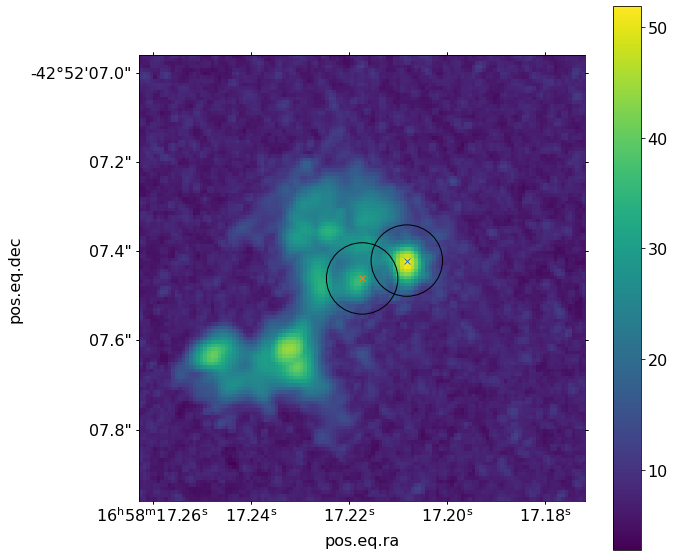

In [18]:
mx = scubev1.max(axis=0)
ax = pl.subplot(projection=mx.wcs)
_=pl.imshow(mx.value, origin='lower', interpolation='none')
_=pl.colorbar()
_=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'))
_=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'))
peakApix = peakAcirc.to_pixel(mx.wcs)
ax.add_artist(peakApix.as_artist())
peakBpix = peakBcirc.to_pixel(mx.wcs)
ax.add_artist(peakBpix.as_artist())

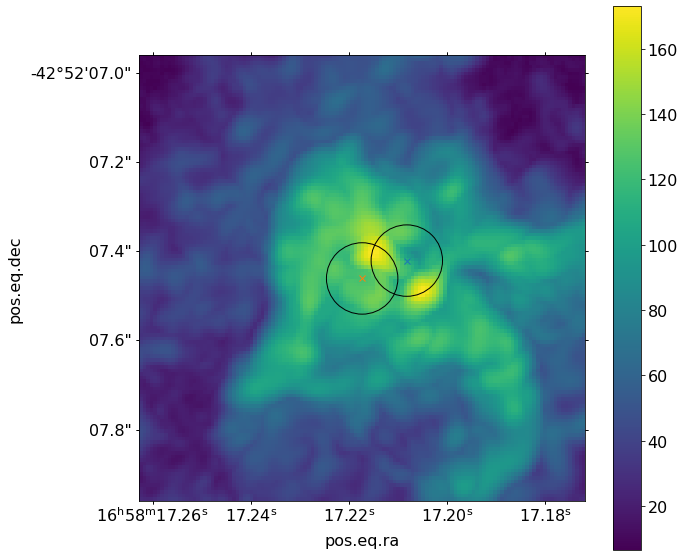

In [19]:
scubev0 = cubev0.subcube_from_regions([cutout]).to(u.K)
mx = scubev0.max(axis=0)
ax = pl.subplot(projection=mx.wcs)
_=pl.imshow(mx.value, origin='lower', interpolation='none')
_=pl.colorbar()
_=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'))
_=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'))
peakApix = peakAcirc.to_pixel(mx.wcs)
ax.add_artist(peakApix.as_artist())
peakBpix = peakBcirc.to_pixel(mx.wcs)
ax.add_artist(peakBpix.as_artist())

In [20]:
jtok = scubev1.beam.jtok(scubev1.with_spectral_unit(u.GHz).spectral_axis).mean()
jtok

<Quantity 5306.67431431 K>

In [21]:
msk = mx > 0.004*jtok
sp = scubev1.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).with_mask(msk).mean(axis=(1,2))
spA = scubev1.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakAcirc]).mean(axis=(1,2))
spB = scubev1.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakBcirc]).mean(axis=(1,2))

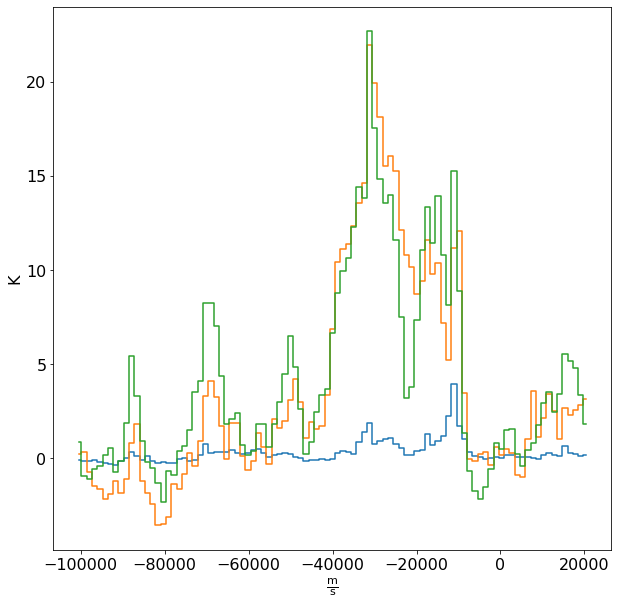

In [22]:
sp.quicklook()
spA.quicklook()
spB.quicklook()

In [23]:
msk = mx > 0.004*jtok
sp = scubev0.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).with_mask(msk).mean(axis=(1,2))
spA = scubev0.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakAcirc]).mean(axis=(1,2))
spB = scubev0.spectral_slab(-100*u.km/u.s, 20*u.km/u.s).subcube_from_regions([peakBcirc]).mean(axis=(1,2))

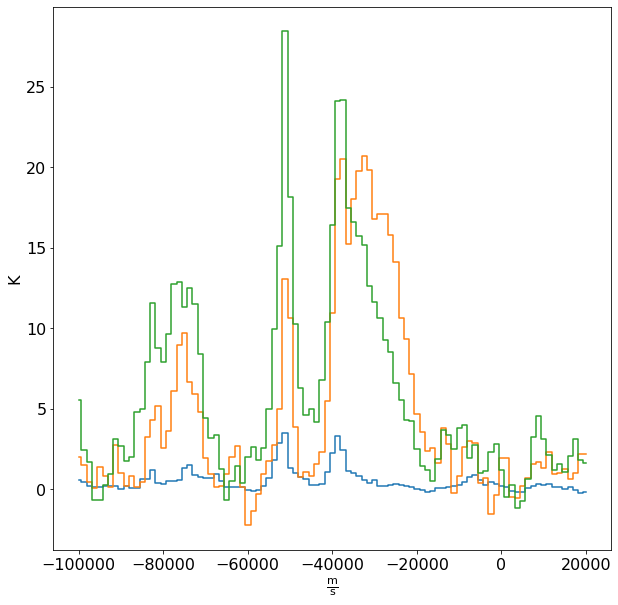

In [24]:
sp.quicklook()
spA.quicklook()
spB.quicklook()

In [25]:
water_cube = (SpectralCube.read('YichenKei/spw/IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor.fits')
              .with_spectral_unit(u.km/u.s, rest_value=232.68670*u.GHz, velocity_convention='radio')
              .subcube_from_regions([cutout])
              .spectral_slab(-90*u.km/u.s, 20*u.km/u.s)
              .to(u.K))
water_cube.write('YichenKei/water_cube.fits', overwrite=True)

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /


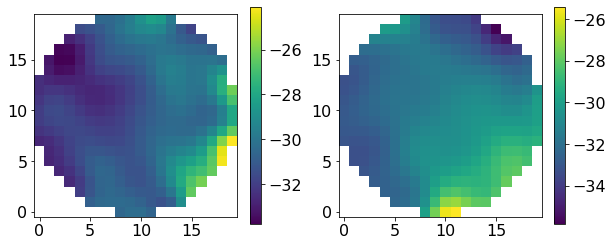

In [26]:
pl.figure(figsize=(10,4))
m1 = scubev1.subcube_from_regions([peakAcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -22*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,1)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

#vmapA = m1 = scubev0.subcube_from_regions([peakAcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -22*u.km/u.s).moment1(axis=0)
vmapA = m1 = water_cube.subcube_from_regions([peakAcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -22*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,2)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in divide
  return (np.nansum(data * pix_cen, axis=axis) /


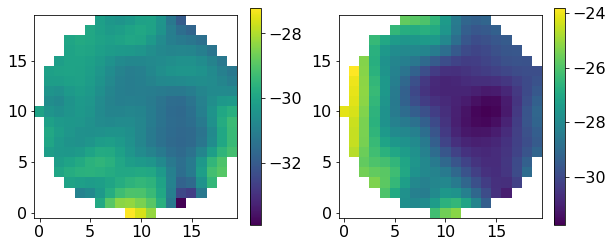

In [27]:
pl.figure(figsize=(10,4))
m1 = scubev1.subcube_from_regions([peakBcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -18*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,1)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

#vmapB = m1 = scubev0.subcube_from_regions([peakBcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -18*u.km/u.s).moment1(axis=0)
vmapB = m1 = water_cube.subcube_from_regions([peakBcirc]).with_spectral_unit(u.km/u.s).spectral_slab(-45*u.km/u.s, -18*u.km/u.s).moment1(axis=0)
pl.subplot(1,2,2)
pl.imshow(m1.value,  origin='lower', interpolation='none')
pl.colorbar()

In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
kcl1312_22_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=98.70595243263405*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
kcl1312_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=99.31662591202812*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
kcl1312_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=99.92952090985044*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
nacl87_2337_33_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=99726.74800*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
nacl2726_2335_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=350969.30000*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
nacl2827_2337_22_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=350916.27200*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
nacl1817_2335_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band6.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=234251.91200*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
nacl1817_2335_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=232509.97700*u.MHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)

kcl4645_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=352.4286424785739*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
kcl_4135_4746_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=351.7695170324307*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)

kcl_4135_1312_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=97.62808576093418*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
kcl_4135_1312_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=97.03620007980506*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
kcl_3937_1312_00_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=97.0894846636644*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)
kcl_3937_1312_11_cube = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits').with_spectral_unit(u.km/u.s, rest_value=96.5024933707571*u.GHz, velocity_convention='radio').subcube_from_regions([cutout]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).to(u.K)



In [30]:
nacl1817_2335_00_cube.with_spectral_unit(u.GHz)

SpectralCube with shape=(89, 125, 125) and unit=K:
 n_x:    125  type_x: RA---SIN  unit_x: deg    range:   254.571551 deg:  254.571927 deg
 n_y:    125  type_y: DEC--SIN  unit_y: deg    range:   -42.868877 deg:  -42.868601 deg
 n_s:     89  type_s: FREQ      unit_s: GHz    range:      234.236 GHz:     234.322 GHz

In [31]:
names = {val: key.strip("_cube") for key, val in locals().items() if 'cube' in key}

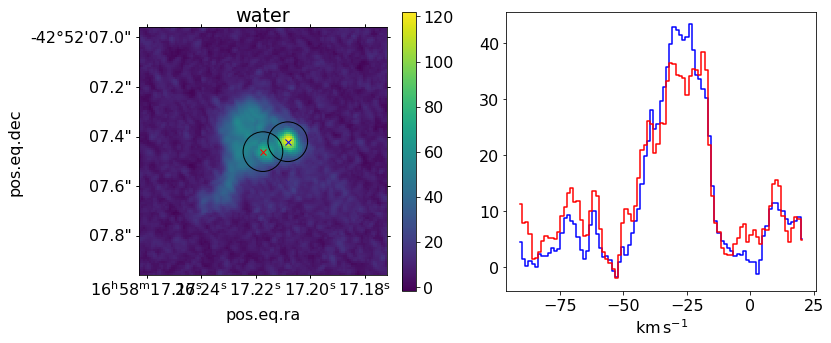

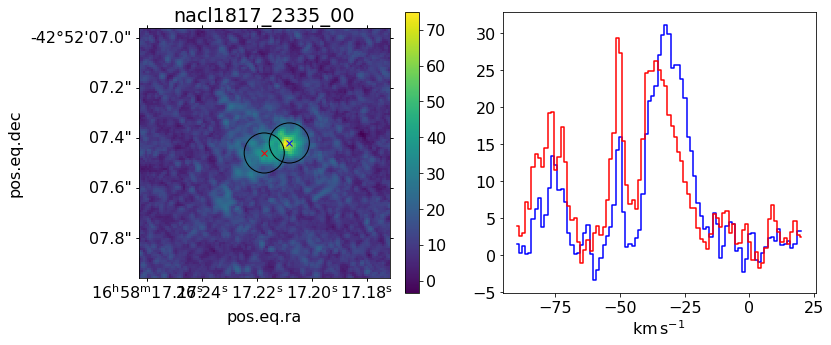

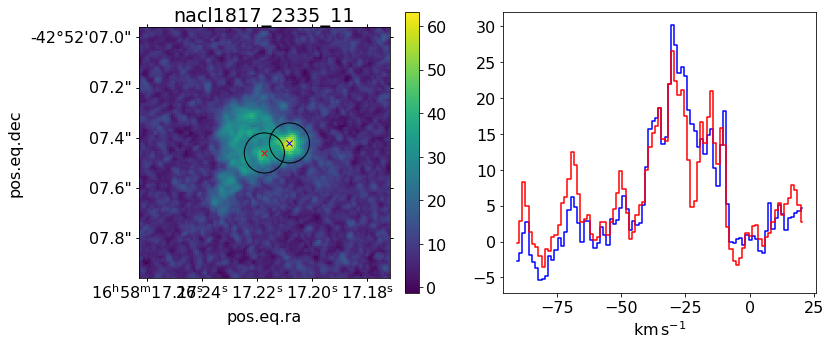

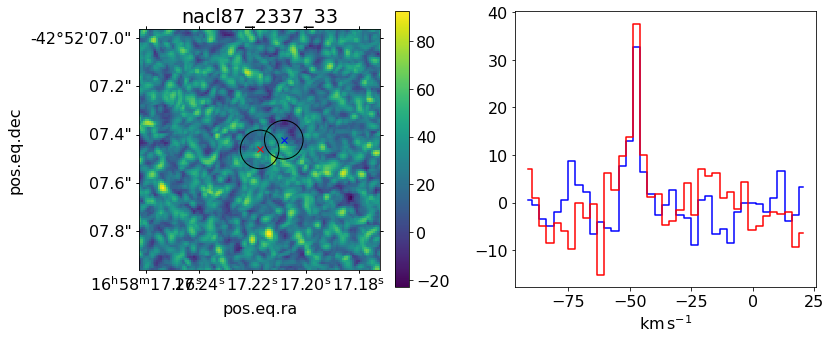

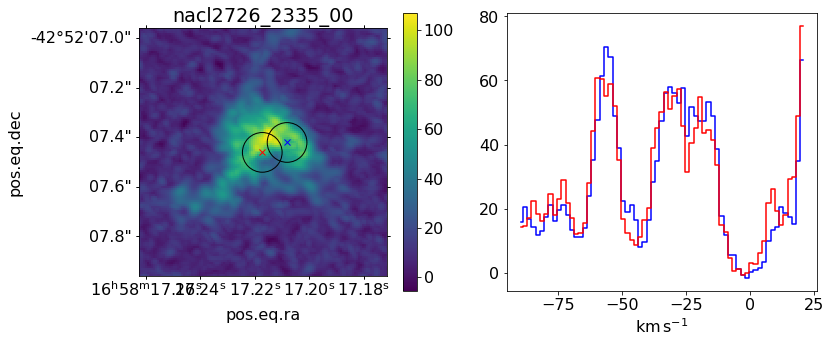

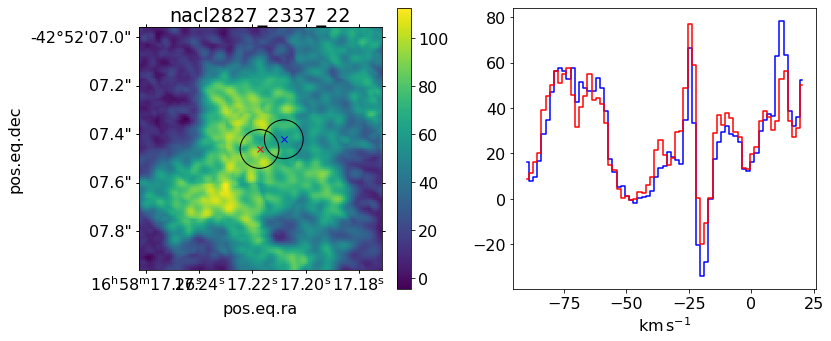

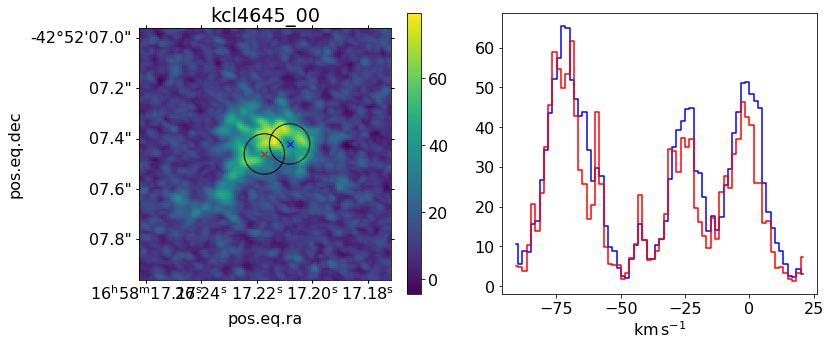

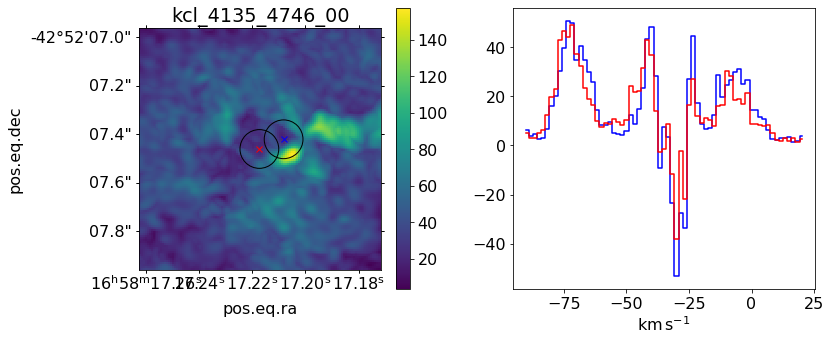

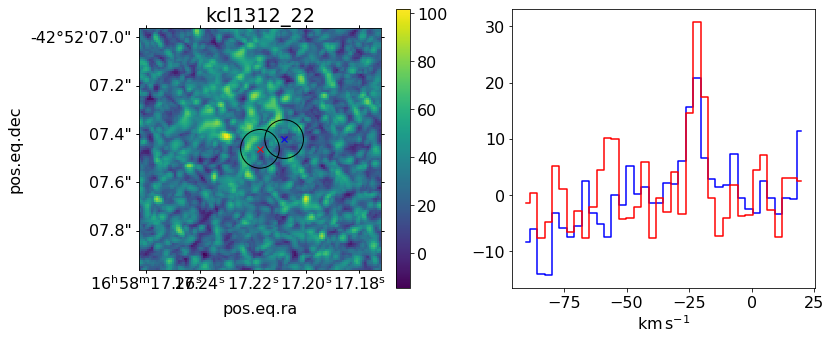

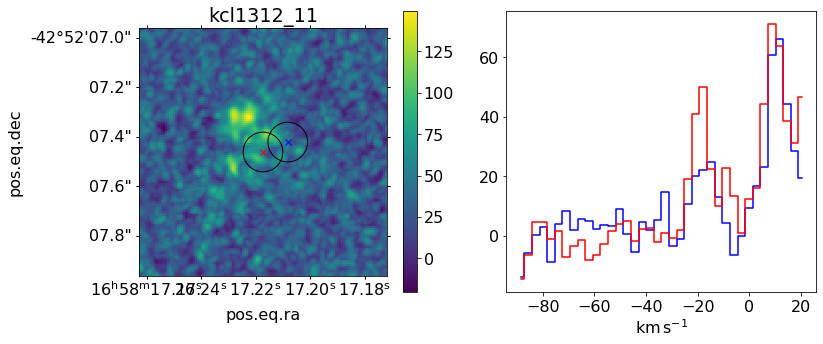

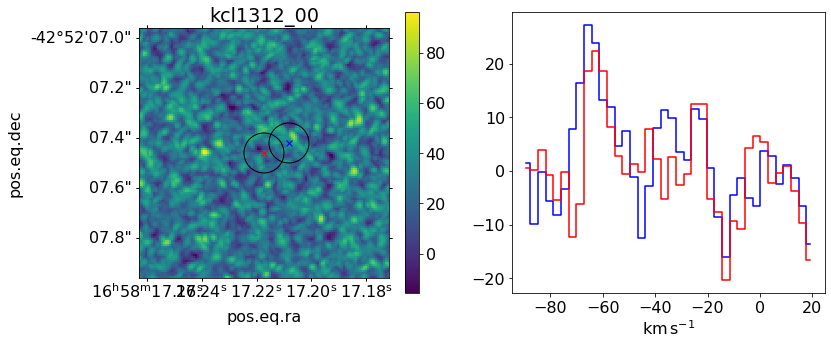

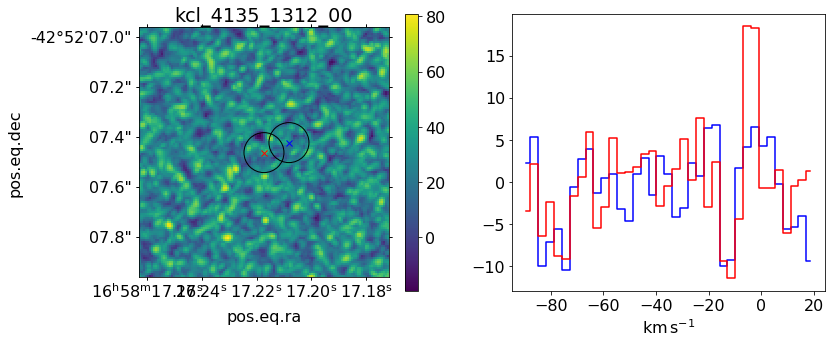

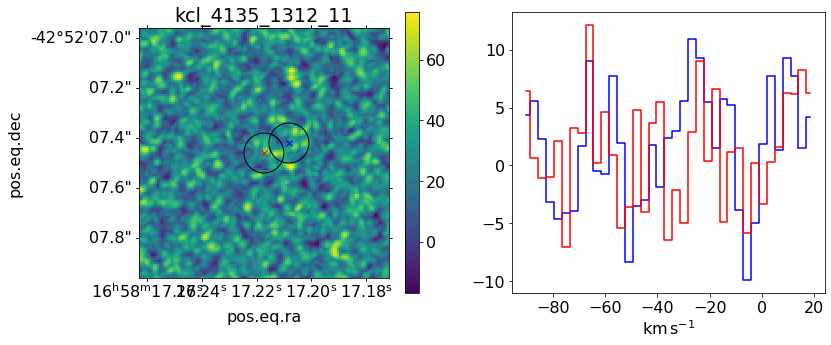

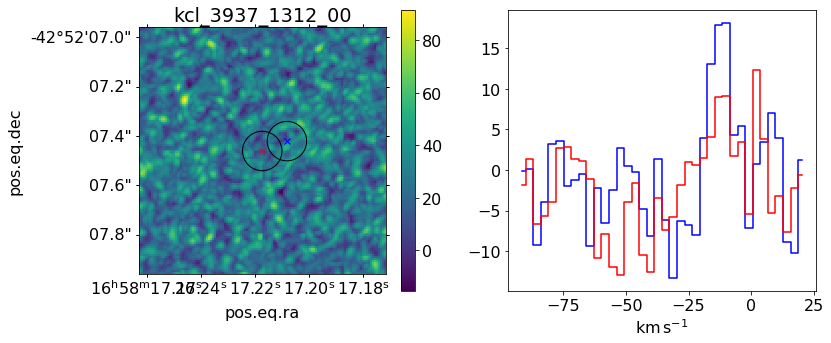

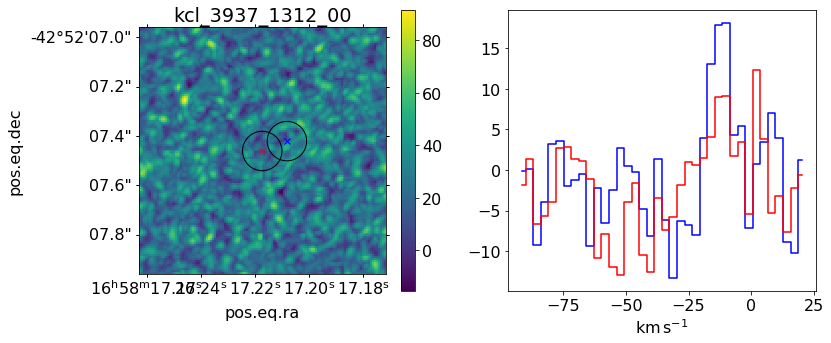

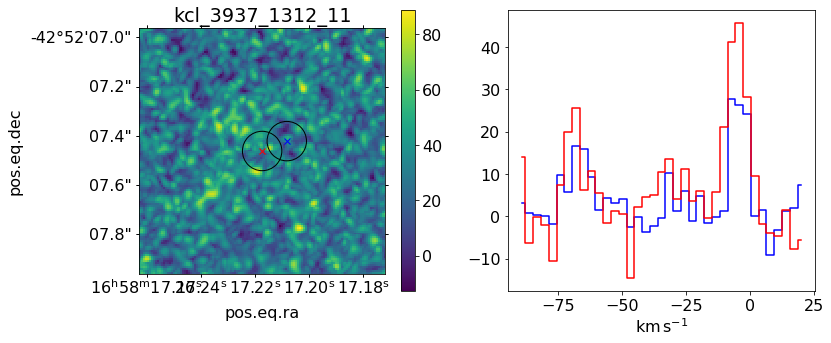

In [32]:
for cube in (water_cube, nacl1817_2335_00_cube, nacl1817_2335_11_cube, nacl87_2337_33_cube, nacl2726_2335_00_cube, nacl2827_2337_22_cube, kcl4645_00_cube, kcl_4135_4746_00_cube, kcl1312_22_cube, kcl1312_11_cube, kcl1312_00_cube, kcl_4135_1312_00_cube, kcl_4135_1312_11_cube, kcl_3937_1312_00_cube, kcl_3937_1312_00_cube, kcl_3937_1312_11_cube):
    mx = cube.spectral_slab(-36*u.km/u.s, -14*u.km/u.s).max(axis=0)
    avspcA = cube.subcube_from_regions([peakAcirc]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).mean(axis=(1,2))
    avspcB = cube.subcube_from_regions([peakBcirc]).spectral_slab(-90*u.km/u.s, 20*u.km/u.s).mean(axis=(1,2))
    pl.figure(figsize=(10,5))
    ax = pl.subplot(1,2,1,projection=mx.wcs)
    _=pl.imshow(mx.value, origin='lower', interpolation='none')
    _=pl.colorbar()
    _=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'), color='b')
    _=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'), color='r')
    peakApix = peakAcirc.to_pixel(mx.wcs)
    ax.add_artist(peakApix.as_artist())
    peakBpix = peakBcirc.to_pixel(mx.wcs)
    ax.add_artist(peakBpix.as_artist())
    pl.title(names[cube])
    ax2 = pl.subplot(1,2,2)
    ax2.plot(avspcA.spectral_axis, avspcA.value, color='b', drawstyle='steps-mid')
    ax2.plot(avspcB.spectral_axis, avspcB.value, color='r', drawstyle='steps-mid')
    pl.tight_layout()

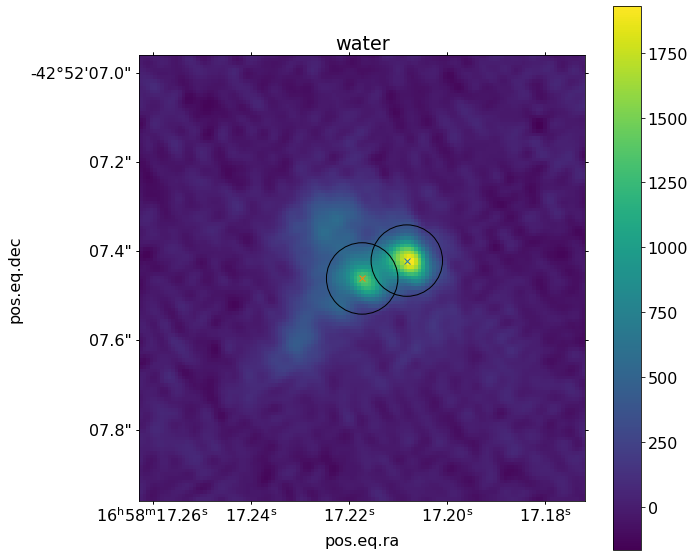

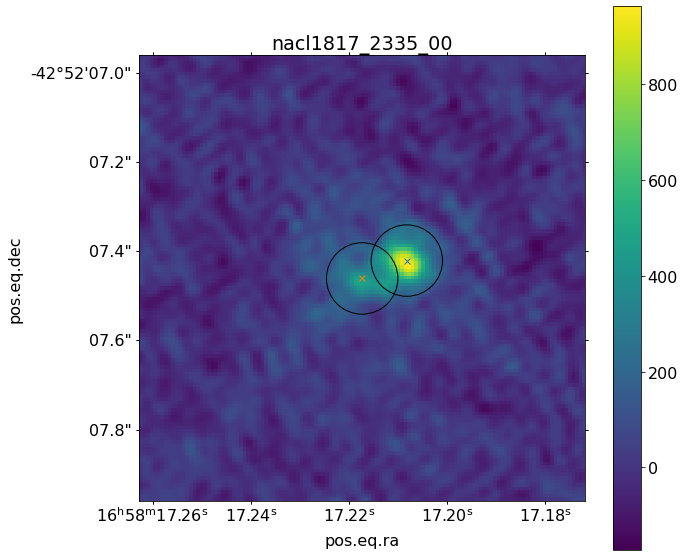

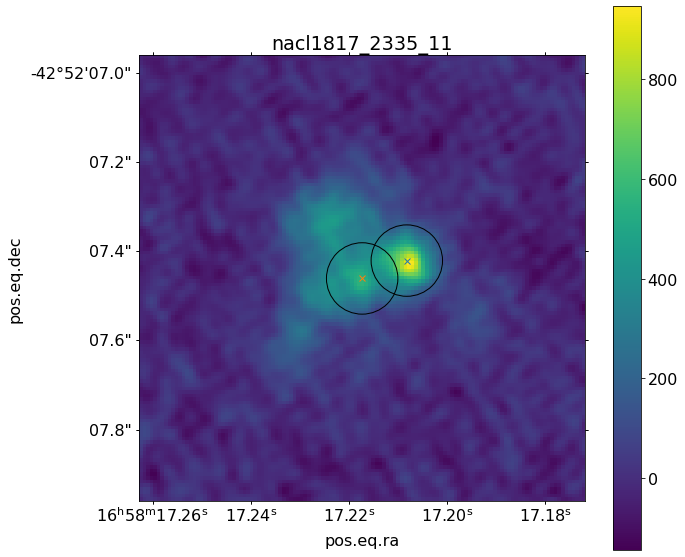

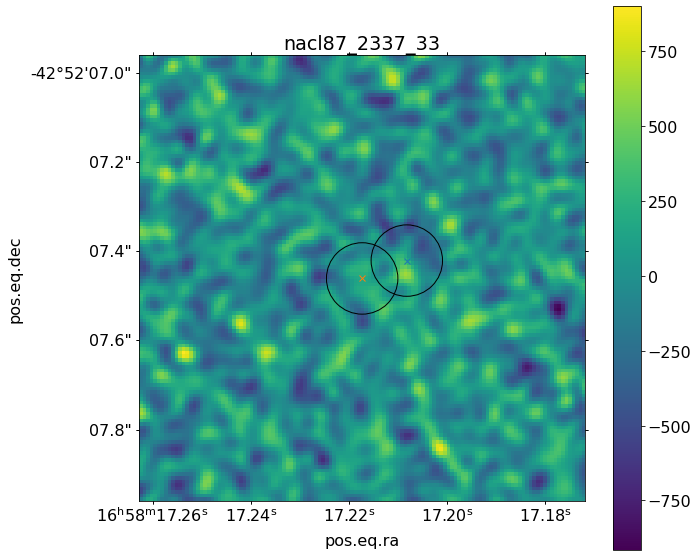

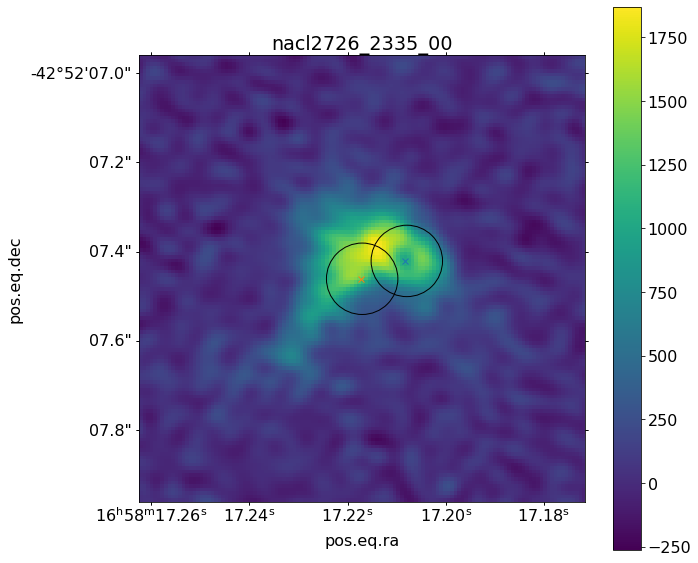

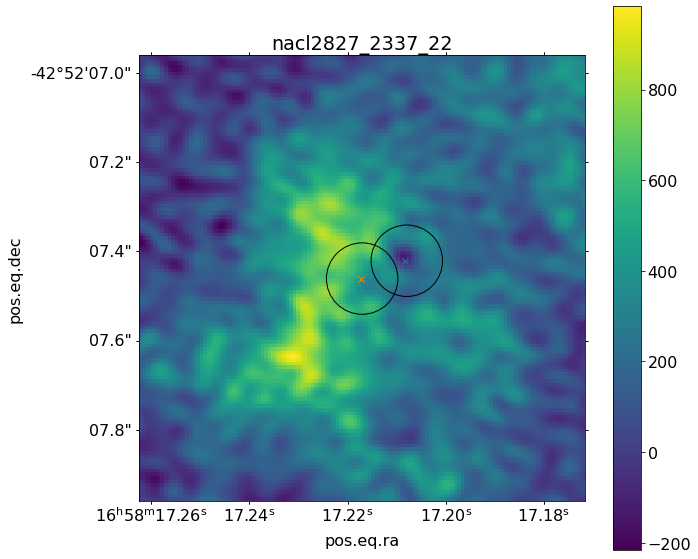

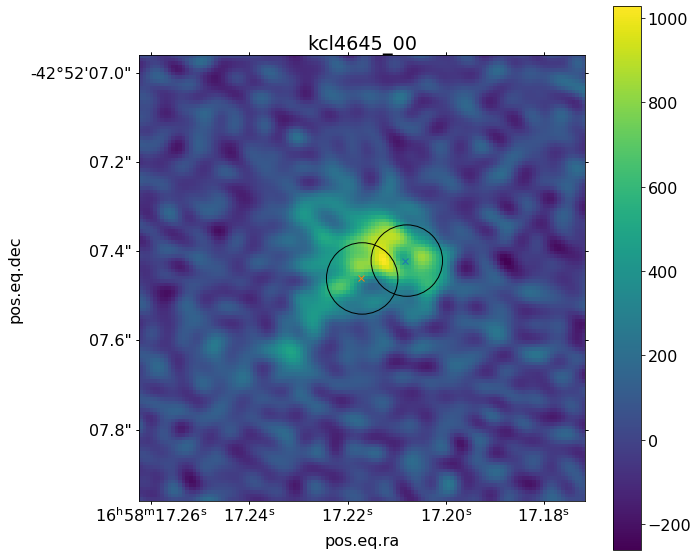

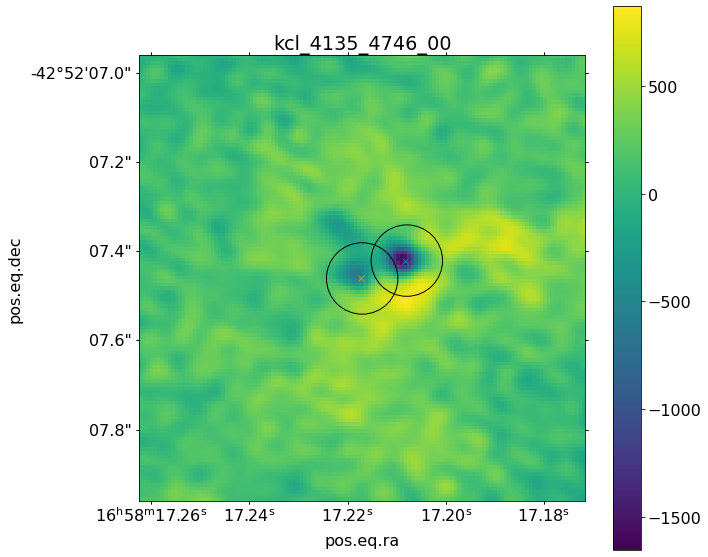

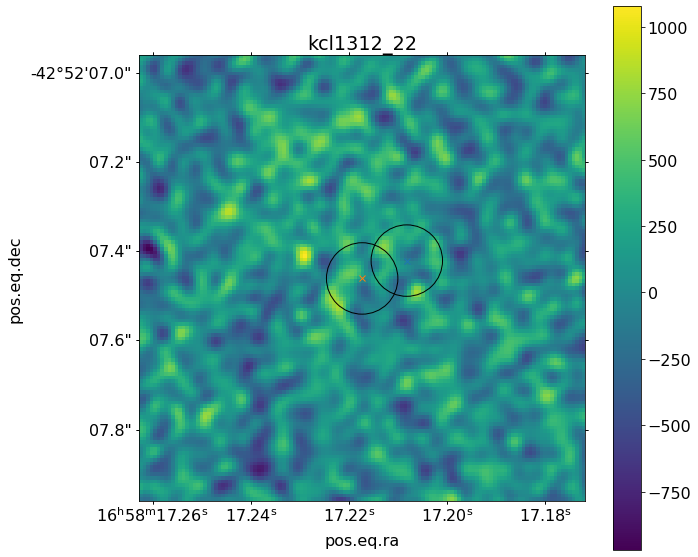

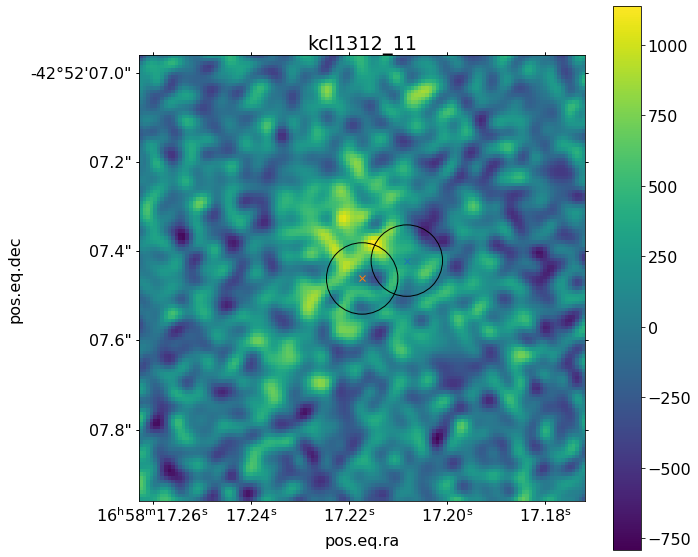

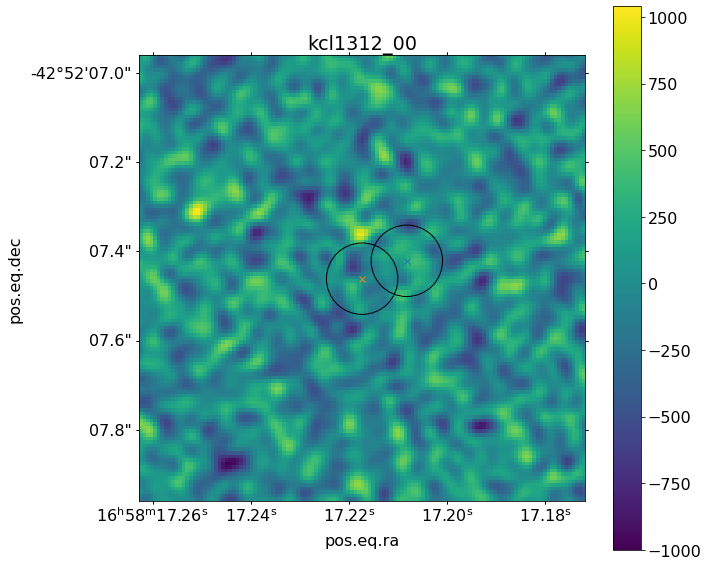

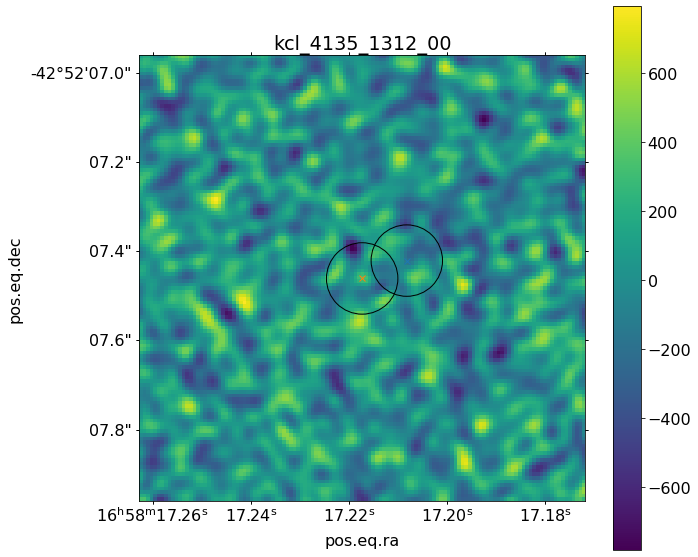

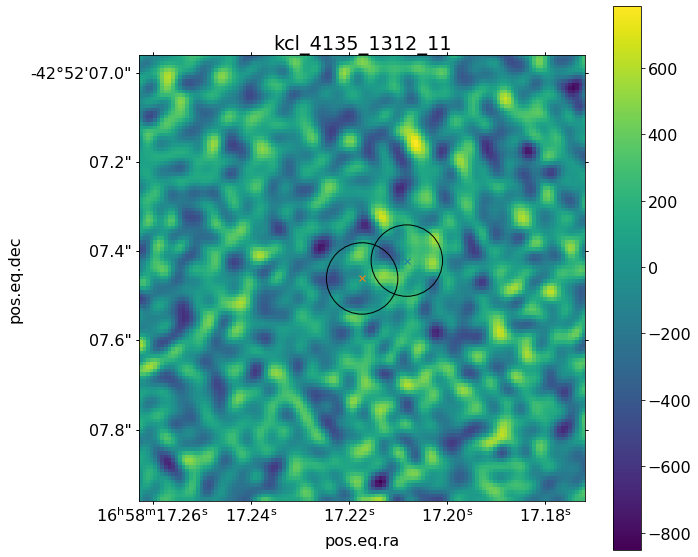

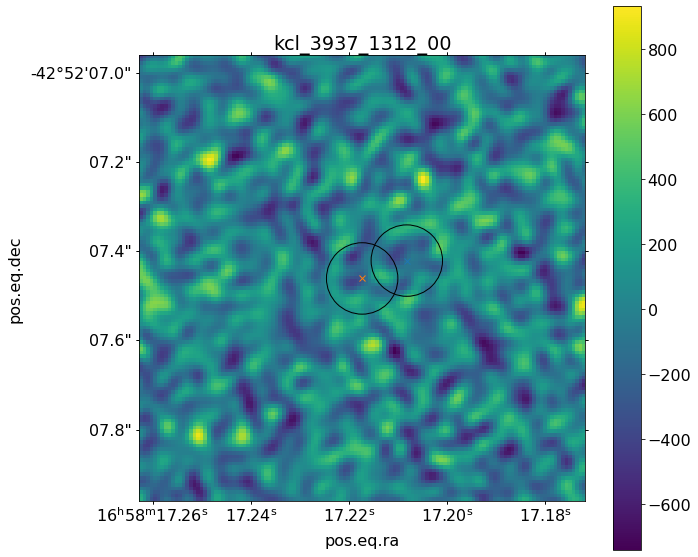

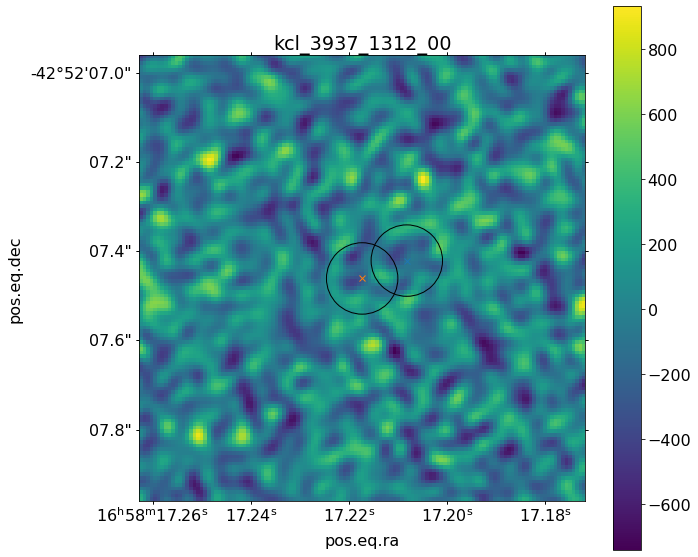

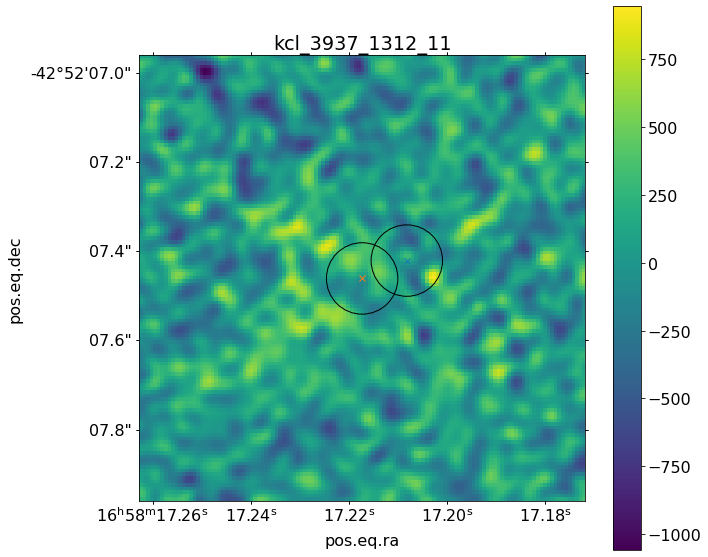

In [33]:
for cube in (water_cube, nacl1817_2335_00_cube, nacl1817_2335_11_cube, nacl87_2337_33_cube, nacl2726_2335_00_cube, nacl2827_2337_22_cube, kcl4645_00_cube, kcl_4135_4746_00_cube, kcl1312_22_cube, kcl1312_11_cube, kcl1312_00_cube, kcl_4135_1312_00_cube, kcl_4135_1312_11_cube, kcl_3937_1312_00_cube, kcl_3937_1312_00_cube, kcl_3937_1312_11_cube):
    m0 = cube.spectral_slab(-36*u.km/u.s, -14*u.km/u.s).moment0(axis=0)
    pl.figure()
    ax = pl.subplot(projection=m0.wcs)
    _=pl.imshow(m0.value, origin='lower', interpolation='none')
    _=pl.colorbar()
    _=ax.plot(peakA.ra, peakA.dec, 'x', transform=ax.get_transform('world'))
    _=ax.plot(peakB.ra, peakB.dec, 'x', transform=ax.get_transform('world'))
    peakApix = peakAcirc.to_pixel(mx.wcs)
    ax.add_artist(peakApix.as_artist())
    peakBpix = peakBcirc.to_pixel(mx.wcs)
    ax.add_artist(peakBpix.as_artist())
    pl.title(names[cube])    

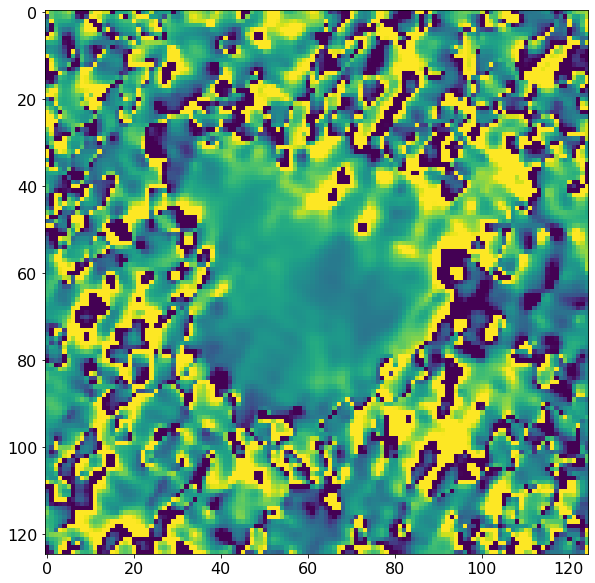

In [34]:
m1 = water_cube.spectral_slab(-36*u.km/u.s, -14*u.km/u.s).moment1(axis=0)
pl.imshow(m1.value, vmin=-36, vmax=-14)

In [35]:
#mkdir YichenKei/spectra/

DaskSpectralCube with shape=(150, 1024, 1024) and unit=Jy / beam and chunk size (150, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    150  type_s: VRAD      unit_s: m / s  range:  -129659.672 m / s:   70466.694 m / s
DaskSpectralCube with shape=(121, 1024, 1024) and unit=Jy / beam and chunk size (121, 512, 512):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570221 deg:  254.573323 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 deg
 n_s:    121  type_s: VRAD      unit_s: m / s  range:  -129590.990 m / s:   70622.368 m / s
DaskSpectralCube with shape=(151, 1024, 1024) and unit=Jy / beam and chunk size (151, 256, 256):
 n_x:   1024  type_x: RA---SIN  unit_x: deg    range:   254.570159 deg:  254.573261 deg
 n_y:   1024  type_y: DEC--SIN  unit_y: deg    range:   -42.869888 deg:  -42.867614 d

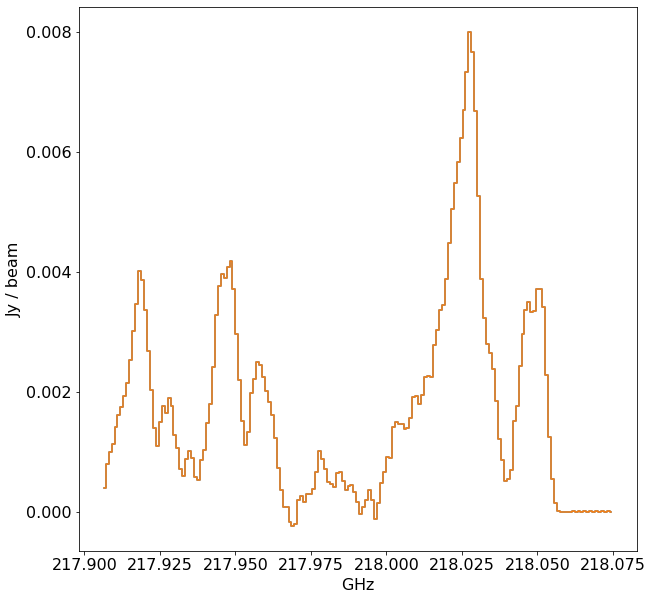

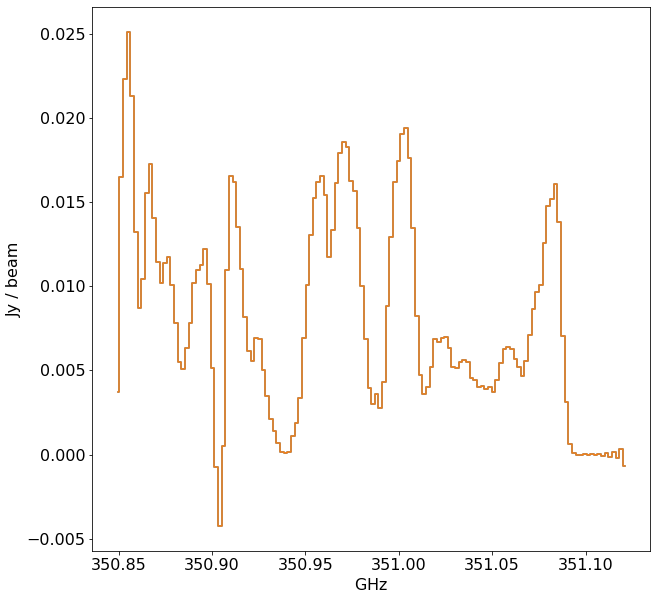

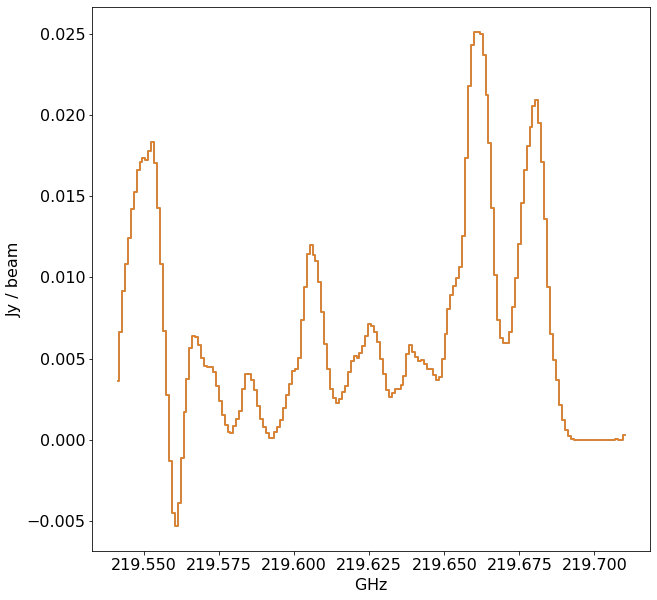

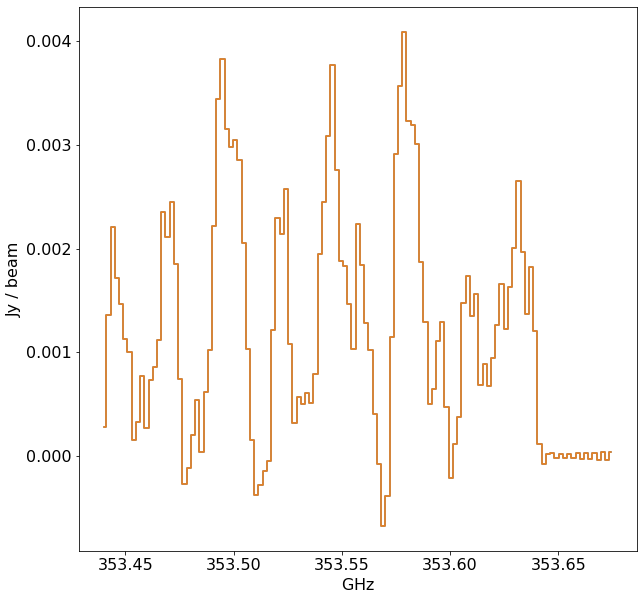

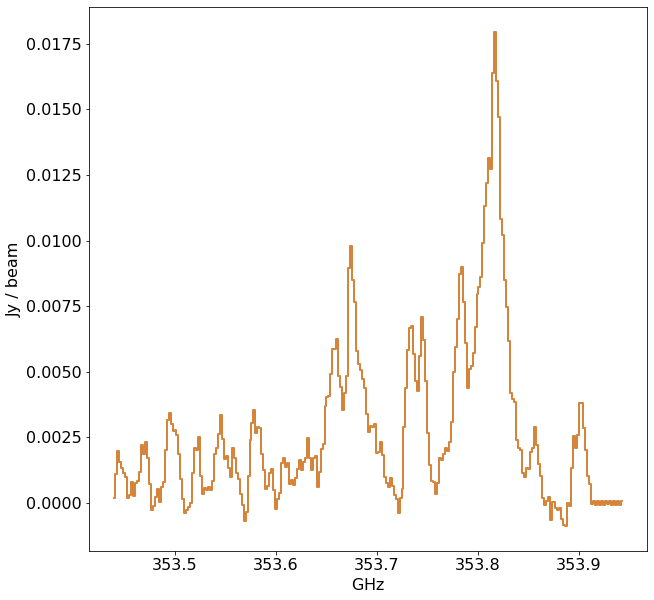

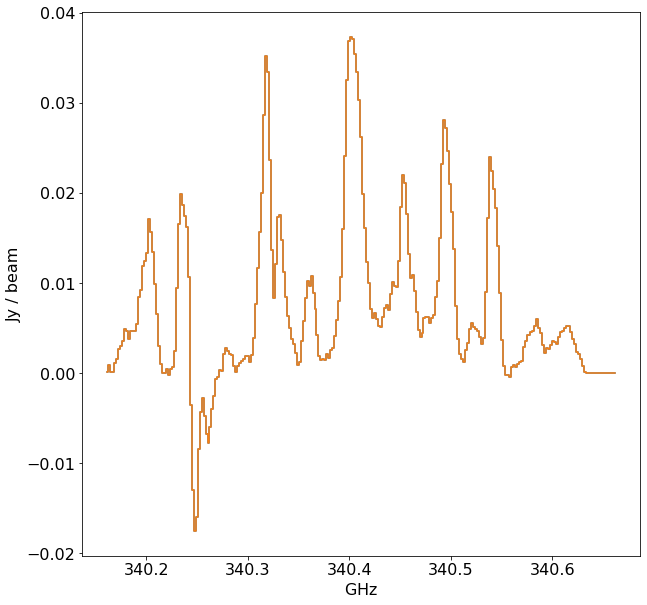

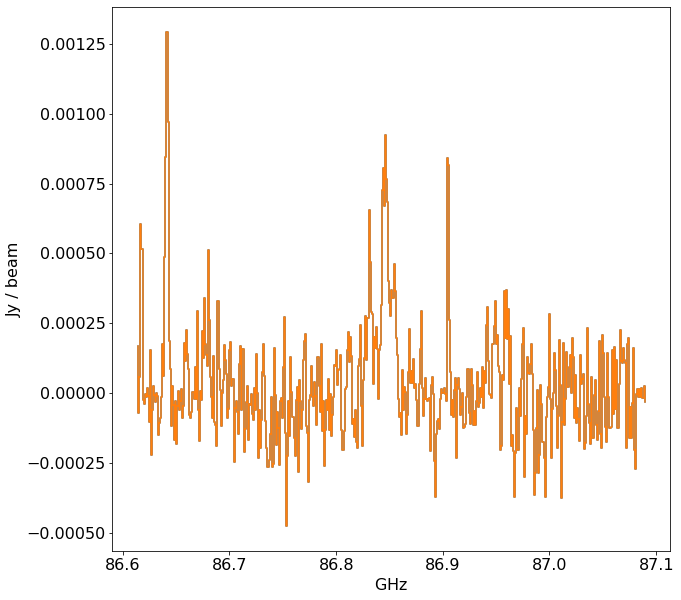

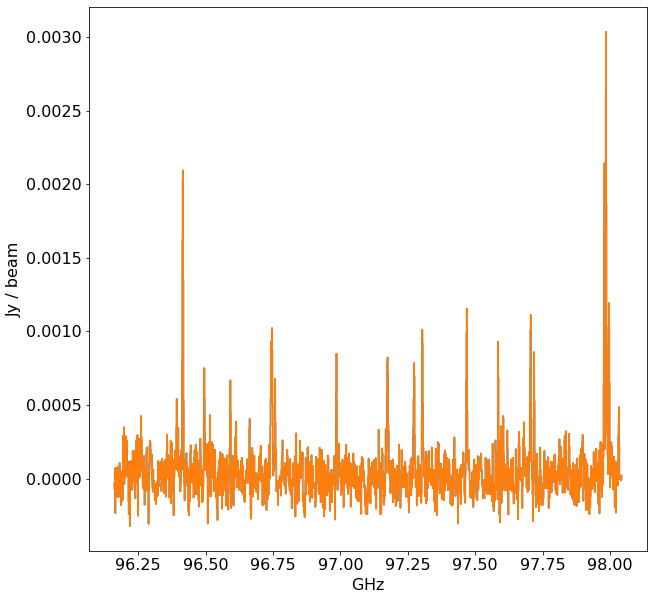

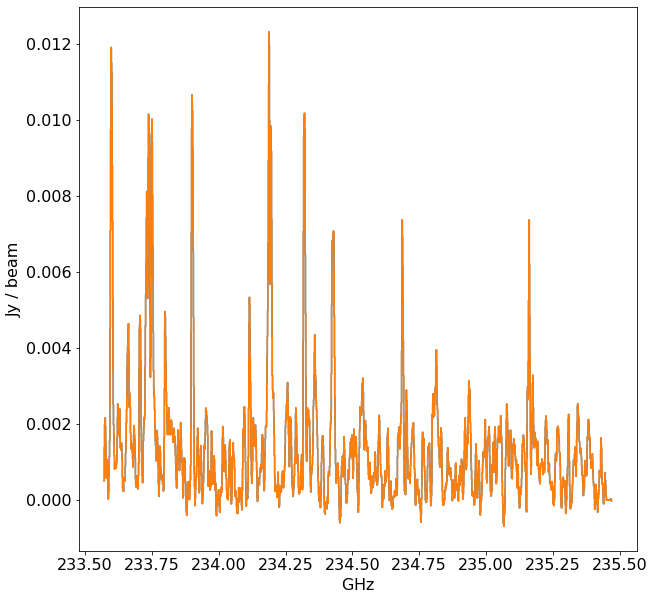

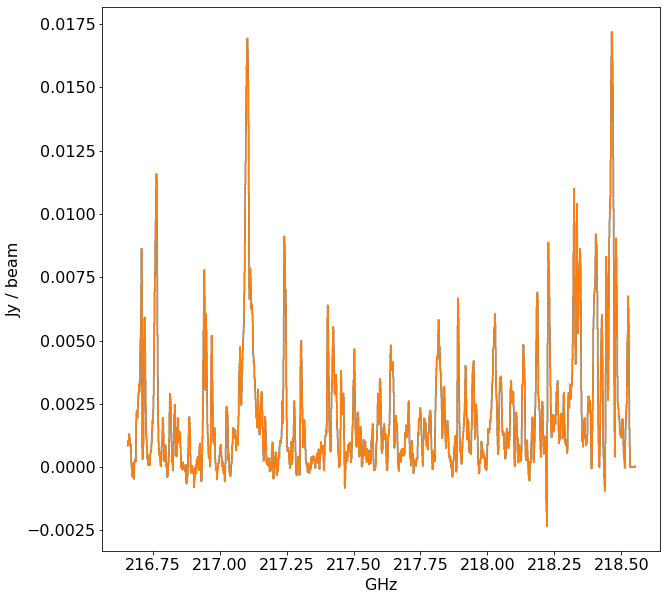

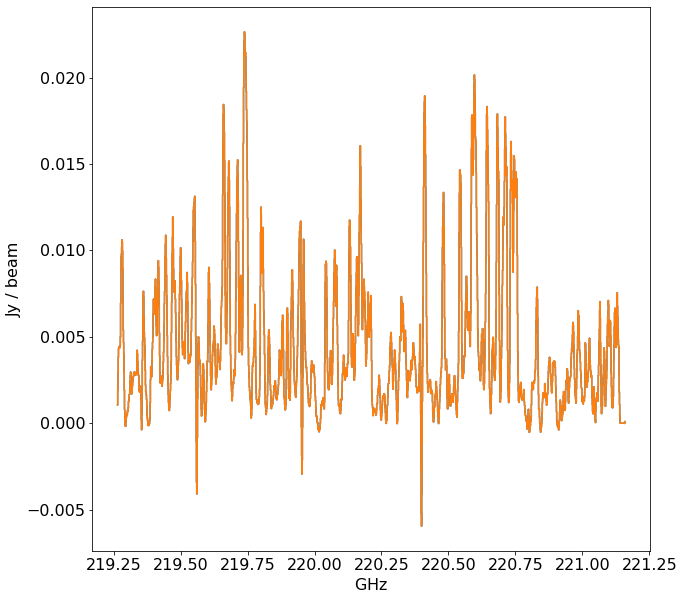

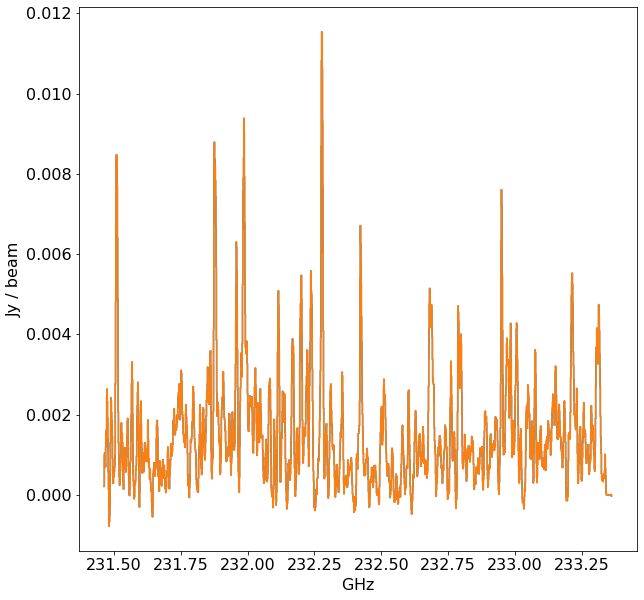

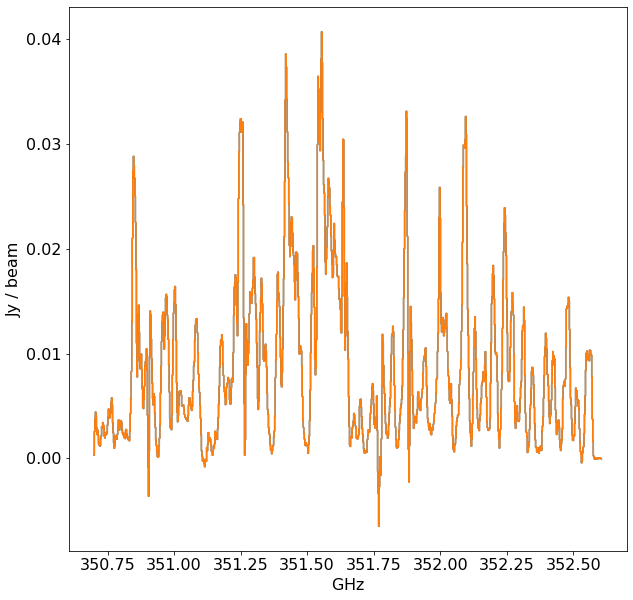

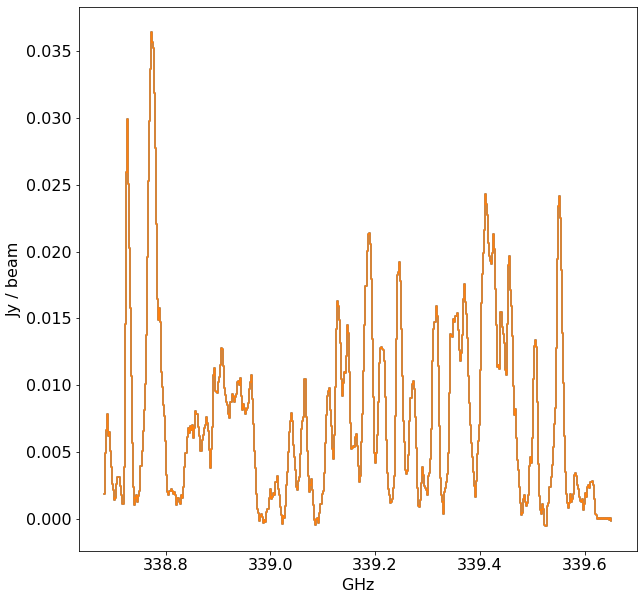

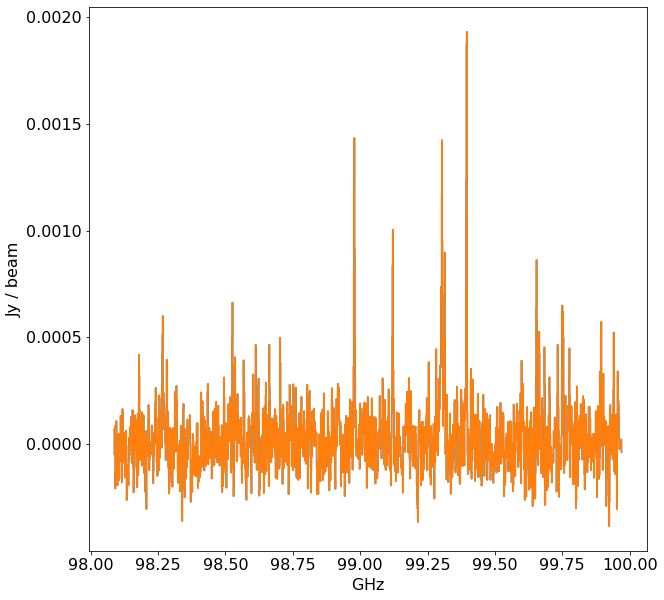

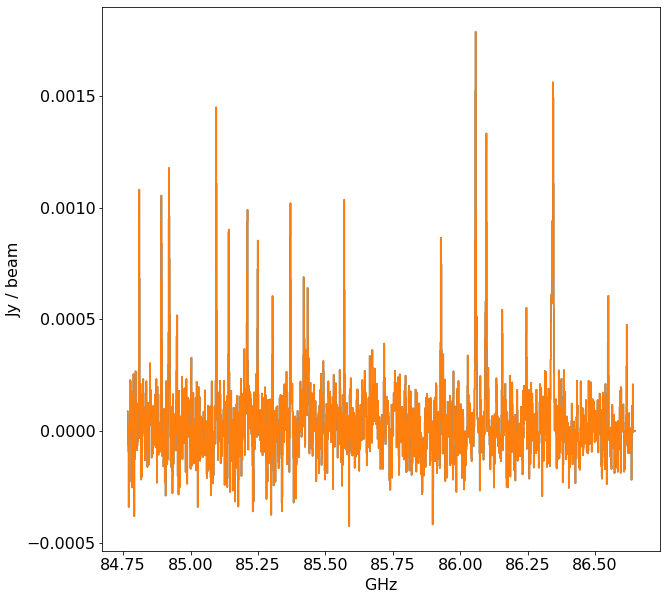

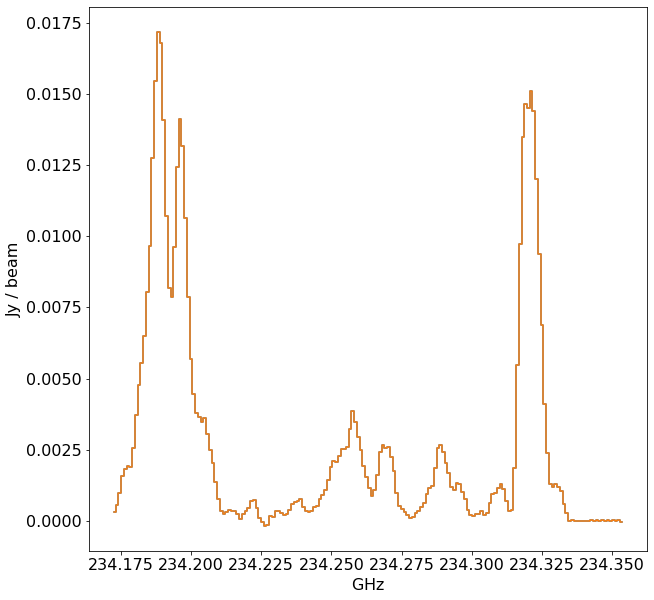

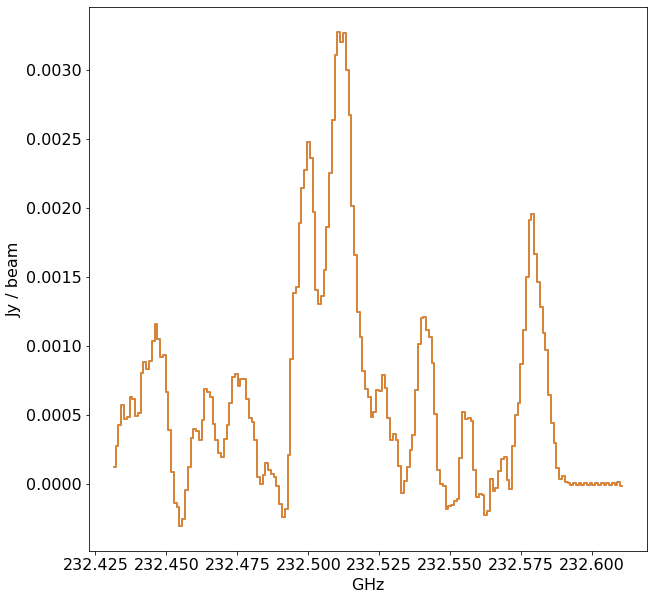

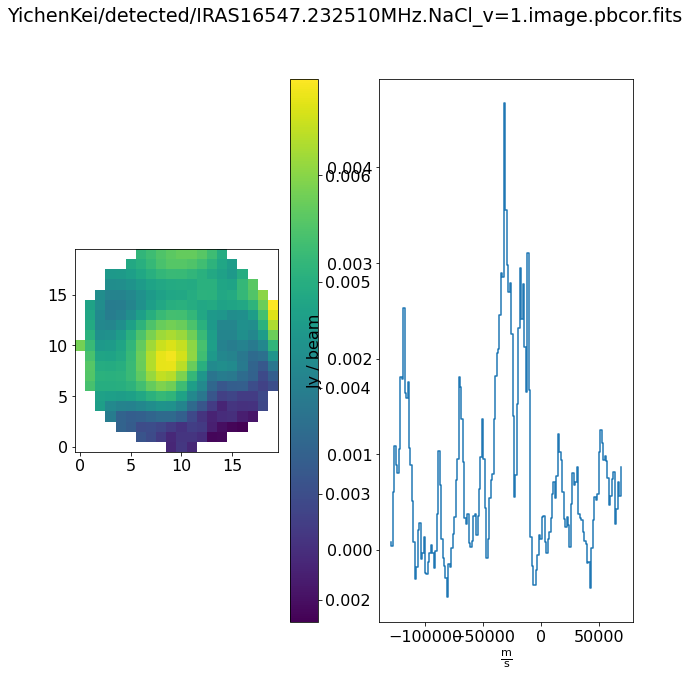

In [36]:
import glob
import spectral_cube.analysis_utilities
import reproject
from astropy.io import fits

flist = [x for x in glob.glob('YichenKei/*/*.fits') if 'spectra' not in x]
for fn in flist:
    basename = os.path.split(fn)[-1].split(".fits")[0]
    try:
        cube = SpectralCube.read(fn, use_dask=True)
    except Exception as ex:
        print(ex)
        continue
    print(cube)

    # convert the cube to velocity units with an arbitrary reference point
    # (this step assumes the cube is in frequency or wavelength; if the
    # cube is not, it should be skipped)
    if not cube.spectral_axis.unit.is_equivalent(u.km/u.s):
        fullcube = cube.with_spectral_unit(u.km/u.s,
                                           velocity_convention='radio',
                                           rest_value=cube.spectral_axis.mean())
    else:
        fullcube = cube

    # mask out super bright SiO masers; they break the FFT shifting tool
    # (this step can be skipped if there's nothing anomalously bright
    # in your spectrum)
    # fullcube = fullcube.with_mask(fullcube < 0.5*u.Jy/u.beam)

    for vmap, objname, reg in zip((vmapA, vmapB), ('A', 'B'), (peakAcirc, peakBcirc)):

        scube = fullcube.subcube_from_regions([reg])
        
        # old version: scube = cube[:,460:570,440:540]
        mx = scube.max(axis=0)
        msk = mx > 0.003*mx.unit
        sp = scube.with_mask(msk).mean(axis=(1,2))
    
        # note that YichenKei/spectra is symlinked to I16547/spectra
        sp.write(f'YichenKei/spectra/{fn.split("/")[-1].replace(".fits","_meanspec.fits")}', overwrite=True)
        sp.write(f'YichenKei/spectra/I16547{basename}_I16547{objname}_meanspec.fits', overwrite=True)

       
        
        # reproject the velocity map into the cube's coordinate system
        vmap_proj,_ = reproject.reproject_interp(vmap.hdu,
                                                 scube.wcs.celestial,
                                                 shape_out=scube.shape[1:])
        vmap_proj = u.Quantity(vmap_proj, u.km/u.s)
        fits.PrimaryHDU(data=vmap_proj.value, header=scube.wcs.celestial.to_header()).writeto('vmap.hdu.fits', overwrite=True)
        
        # perform the stacking!
        stack = spectral_cube.analysis_utilities.stack_spectra(scube, vmap_proj,
                                                               v0=0.0*u.km/u.s)
        fstack = stack.with_spectral_unit(u.GHz)

        pl.suptitle(f"{fn} {objname}")
        fstack.write(f'YichenKei/spectra/IRAS16547{basename}_I16547{objname}_stack.fits', overwrite=True)

        pl.clf()
        fstack.quicklook(filename=f'YichenKei/spectra/figures/{basename}_I16547{objname}_stack.pdf')
        fstack.quicklook(filename=f'YichenKei/spectra/figures/{basename}_I16547{objname}_stack.png')
    
    
    fig = pl.figure()
    mappable = pl.subplot(1,2,1).imshow(mx.value, origin='lower', interpolation='none')
    pl.colorbar(mappable)
    pl.subplot(1,2,2)
    pl.suptitle(fn)
    sp.quicklook()

In [37]:
known_lines = {'13CS': 231.220996*u.GHz,
               'CH3OH1029': 231.28115*u.GHz,
               'CH3CO?': 231.3104984*u.GHz,
               'H213CO': 231.2459639*u.GHz,
               'HNO3b?': 231.2517153*u.GHz,
               '(CH3)2COd?': 231.1999571*u.GHz,
               '34SO2': 219.3550091*u.GHz,
               'SO2v2=1': 219.466*u.GHz,
               'SO2': 219.276*u.GHz,
               'HC3Nv=1': 219.174*u.GHz,
               'HNO3?': 219.3838408*u.GHz,
               'MnO??': 219.3045193*u.GHz,
               '(CH3)2COa?': 219.2421408*u.GHz,
               '(CH3)2COb?': 219.2642749*u.GHz,
               '(CH3)2COc?': 219.219931*u.GHz,
              }
known_lines = {}

In [38]:
import numpy as np
import os
import glob
from astropy import constants, units as u, table, stats, coordinates, wcs, log, coordinates as coord
import radio_beam
import pyspeckit
import pylab as pl
from astroquery.splatalogue import Splatalogue
from astroquery.splatalogue.utils import minimize_table as mt
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
import lines
import paths
from salt_tables import (salt_tables, salt_table_names, SO, SO2, HCl, sis_tables, AlCl, AlF, Al37Cl,
                         NaF, AlO, AlOH, NaCN, CaS, CaO)

In [39]:
from astropy import units as u

mkdir YichenKei/spectra/figures

YichenKei/spectra/IRAS16547IRAS16547.Band6.spw1.selfcal.lowcontsub.rp.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_I16547A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.350969MHz.NaCl.image.pbcor_I16547A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band6.spw2.selfcal.lowcontsub.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band3.spw2.selfcal.rp.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_I16547B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band7.spw0.selfcal.lowcontsub.16chan.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor_B_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band7.spw3.selfcal.lowcontsub.16chan.rp.image.pbcor_A_stack.fits
YichenKei/spectra/IRAS16547IRAS16547.Band3.spw1.selfcal.rp.image.pbcor

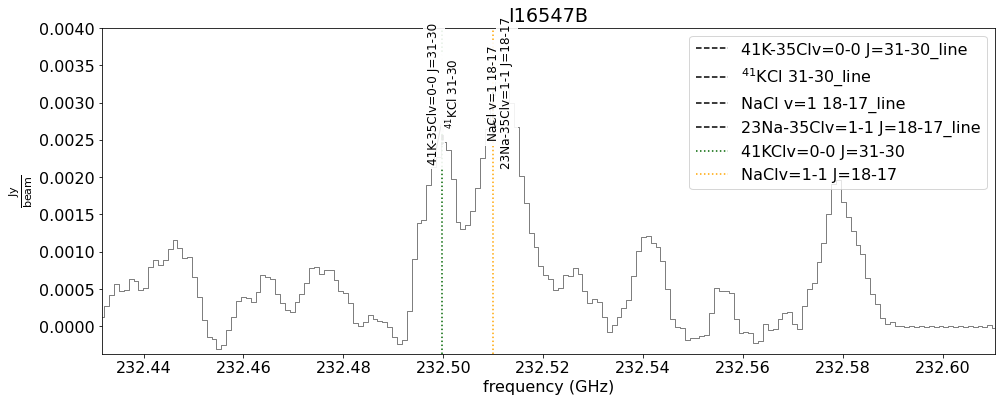

In [40]:

# (vcen in the stacked centroid is defined to be zero)
vcen = 0*u.km/u.s

pl.matplotlib.rcParams['font.size']=16

all_lines = {**lines.disk_lines, **lines.absorbers}

ided_linenames = sorted(all_lines.keys())
ided_linefreqs = u.Quantity([all_lines[x] for x in ided_linenames
                             #if 'U' not in x
                            ])
ided_linetexnames = [lines.texnames[x] if x in lines.texnames else x
                     for x in ided_linenames
                     #if 'U' not in x
                    ]

#salt_tables = [KCl, K37Cl, K41Cl, NaCl, Na37Cl, K41Cl37]
salt_colors = ['b', 'm', 'darkgreen', 'orange', 'c', 'y']

tables = salt_tables

def linename(row):
    return row['Species'] #"{0} {1}".format(row['Species'], row['QNs'])
def freq(row):
    return u.Quantity(row['Freq'], u.GHz)

linenames = [linename(row) for tbl in tables for row in tbl if row['vu'] <=4]
linetexnames = [linename(row) for tbl in tables for row in tbl if row['vu'] <=4] + ided_linetexnames
linetexnames = np.array(linetexnames)
linefreqs = np.hstack([u.Quantity([freq(row) for tbl in tables for row in tbl if row['vu'] <=4], u.GHz).value,
                       ided_linefreqs.value])
linefreqs = u.Quantity(linefreqs, u.GHz)


detection_table = table.Table.read(paths.tpath('salts_in_band.ipac'), format='ascii.ipac')
nondetections = (detection_table['Flag'] == '-n') | (detection_table['Flag'] == 'cn')
detection_table = detection_table[~nondetections]


paths.fpath = lambda x: f"YichenKei/spectra/figures/{x}"

flist = glob.glob('YichenKei/spectra/*stack*.fits')
for fn in flist:
    print(fn)

    sp_st = pyspeckit.Spectrum(fn)
    sp_st.xarr.convert_to_unit(u.GHz)
    
    if 'A_stack' in fn:
        sp_st.specname = 'I16547A'
    if 'B_stack' in fn:
        sp_st.specname = 'I16547B'        
    
    pl.figure(0, figsize=(16,6)).clf()
    sp_st.plotter(figure=pl.figure(0, figsize=(16,6)), clear=True)

    basefn = os.path.split(fn)[-1]

    lines_to_plot = ((linefreqs > sp_st.xarr.as_unit(linefreqs.unit).min()*(1-vcen/constants.c)) &
                     (linefreqs < sp_st.xarr.as_unit(linefreqs.unit).max()*(1+vcen/constants.c)))
    
    sp_st.plotter(ymax=0.02)#ymin=-0.0025, ymax=0.01)
    sp_st.plotter.line_ids(linetexnames[lines_to_plot], linefreqs[lines_to_plot], velocity_offset=vcen,
                           label1_size=16,
                           auto_yloc_fraction=0.75)
    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))


    sp_st.plotter.savefig(paths.fpath('{0}'
                                      .format(basefn.replace("fits","png")))
                          )

    for obj in sp_st.plotter.axis.texts+sp_st.plotter.axis.lines:
        if 'Na' in obj.get_label():
            obj.set_color('r')
            obj.set_zorder(5)
        elif 'K' in obj.get_label():
            obj.set_color('b')
            obj.set_zorder(10)
    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))

    sp_st.plotter.savefig(paths.fpath('color_labels_{0}'
                                      .format(basefn.replace("fits","png")))
                          )


    sp_st.plotter()#ymin=-0.0025, ymax=0.01)

    # uses lines.py
    sp_st.plotter.line_ids(linetexnames[lines_to_plot], linefreqs[lines_to_plot], velocity_offset=vcen,
                           auto_yloc_fraction=0.8)

    for txt in sp_st.plotter.axis.texts:
        txt.set_backgroundcolor((1,1,1,0.9))
    #sp_st.plotter.line_ids(ided_linetexnames, ided_linefreqs, velocity_offset=-vcen,
    #                       plot_kwargs=dict(color='b'))
    sp_st.plotter.savefig(paths.fpath('lines_labeled_{0}'
                                      .format(basefn.replace("fits","png")))
                         )

    #sp_st.plotter(ymin=-0.0025, ymax=0.01)
    # use the salt names directly.  This is for labeling of the colored
    # lines; the publication-ready stuff still uses lines.py
    #sp_st.plotter.line_ids(detection_table['Species'],
    #                       u.Quantity(detection_table['Frequency'], u.GHz),
    #                       velocity_offset=-vcen,
    #                       auto_yloc_fraction=0.8)

    for tbl,color,nm in zip(salt_tables, salt_colors, salt_table_names):
        for row in tbl:
            frq = u.Quantity(row['Freq'], u.GHz)
            if frq > sp_st.xarr.min() and frq < sp_st.xarr.max():
                #print(row)
                sp_st.plotter.axis.axvline((frq*(1-vcen/constants.c)).to(u.GHz).value,
                                          #-0.05, 0.10,
                                          color=color, linestyle=':', label=nm+row['QNs'])

    #for linename, linefreq in known_lines.items():
    #    sp_st.plotter.axis.axvline((linefreq*(1-vcen/constants.c)).to(u.GHz).value,
    #                              #-0.05, 0.10,
    #                              color='g' if '?' in linename else 'r', linestyle='--', label=linename)

    #for row in HCl:
    #    frq = u.Quantity(row['Freq'], u.GHz).value
    #    if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
    #        sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
    #                                  -0.05, 0.10,
    #                                  colors='g', linestyles='--')
    pl.legend(loc='upper right')

    sp_st.plotter.savefig(paths.fpath('diagnostic_lines_labeled_{0}'
                                      .format(basefn.replace("fits","png")))
                         )

#    # Do another one just for SiO
#    sp_st.plotter()#ymin=-0.0025, ymax=0.01)
#
#    # uses lines.py
#    sp_st.plotter.line_ids(linetexnames, linefreqs, velocity_offset=vcen,
#                           auto_yloc_fraction=0.8)
#
#    for txt in sp_st.plotter.axis.texts:
#        txt.set_backgroundcolor((1,1,1,0.9))
#
#
#    for tbl,color in zip(sis_tables, salt_colors):
#        for row in tbl:
#            frq = u.Quantity(row['Freq'], u.GHz).value
#            if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
#                sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
#                                          -0.05, 0.10,
#                                          colors=color, linestyles=':')
#
#    sp_st.plotter.savefig(paths.fpath('sis_diagnostic_lines_labeled_{0}'
#                                      .format(basefn.replace("fits","png")))
#                         )

    # Do another one just for alcl
#    sp_st.plotter(ymin=-0.0025, ymax=0.01)
#
#    # uses lines.py
#    sp_st.plotter.line_ids(linetexnames, linefreqs, velocity_offset=vcen,
#                           auto_yloc_fraction=0.8)
#
#    for txt in sp_st.plotter.axis.texts:
#        txt.set_backgroundcolor((1,1,1,0.9))
#
#    for tbl,color in zip([AlCl, AlF, Al37Cl, NaF, AlOH, AlO], salt_colors):
#        for row in tbl:
#            frq = u.Quantity(row['Freq'], u.GHz).value
#            if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
#                sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
#                                          -0.05, 0.10,
#                                          colors=color, linestyles=':')
#
#
#    sp_st.plotter.savefig(paths.fpath('alcl_diagnostic_lines_labeled_{0}'
#                                      .format(basefn.replace("fits","png")))
#                         )
#
#
#    for (a,b) in zip(linetexnames, linefreqs):
#        if (b>sp_st.xarr.min()) and (b<sp_st.xarr.max()) and a not in ided_linetexnames:
#            print("'{0}': {1}*u.{2},".format(a,b.value,b.unit))

#    for speciesname, species in (('NaCN', NaCN), ('SO2',SO2), ('SO', SO), ('CaS', CaS), ('CaO', CaO)):
#        # Do another one just for nacn
#        sp_st.plotter(ymin=-0.0025, ymax=0.01)
#
#        # uses lines.py
#        sp_st.plotter.line_ids(linetexnames, linefreqs, velocity_offset=vcen,
#                               auto_yloc_fraction=0.8)
#
#        for txt in sp_st.plotter.axis.texts:
#            txt.set_backgroundcolor((1,1,1,0.9))
#
#        for tbl,color in zip([species], ['b']):
#            for row in tbl:
#                frq = u.Quantity(row['Freq'], u.GHz).value
#                if frq > sp_st.xarr.min().value and frq < sp_st.xarr.max().value:
#                    sp_st.plotter.axis.vlines(frq*(1-vcen/constants.c).decompose().value,
#                                              -0.05, 0.10,
#                                              colors=color, linestyles=':')
#
#
#        sp_st.plotter.savefig(paths.fpath('{1}_diagnostic_lines_labeled_{0}'
#                                          .format(basefn.replace("fits","png"),
#                                                  speciesname
#                                                 ))
#                             )

In [41]:
import shutil

In [42]:
os.chdir('/orange/adamginsburg/salt')
for pfx in ('sis_diagnostic_lines', 'diagnostic_lines', 'CaO_diagnostic_lines', 'CaS_diagnostic_lines', 'NaCN_diagnostic_lines', 'SO_diagnostic_lines', 'SO2_diagnostic_lines', 
            'alcl_diagnostic_lines', 'color_labels', 'lines_labeled', 'sis_diagnostic_lines'):
    if not os.path.exists(paths.fpath(pfx)):
        os.mkdir(paths.fpath(pfx))
        print(os.getcwd())
    cwd = os.getcwd()
    print(cwd)
    for fn in glob.glob(paths.fpath(pfx)+"*png"):
        os.chdir(paths.fpath(pfx))
        #print(os.getcwd())
        if not os.path.exists(os.path.basename(fn)):
            os.symlink('../' + os.path.basename(fn), os.path.basename(fn))
        shutil.copy('../style.css', '.')
        shutil.copy('../gallery.html', '.')
        os.chdir(cwd)

/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt
/orange/adamginsburg/salt


In [43]:
os.path.exists(paths.fpath(pfx))

True

In [44]:
os.chdir(cwd)

In [45]:
if not os.path.exists(paths.fpath(pfx)):
    os.mkdir(paths.fpath(pfx))

In [46]:
pwd

'/orange/adamginsburg/salt'

In [47]:
salt_tables[0]

<Table length=1521>
upper_state lower_state    Aij     Frequency_cm        Freq               E_U                E_L                QNs          vu    vl    Ju    Jl    gu    gl           Species         
                          1 / s       1 / cm           GHz                 K                  K                                                                                         
   int64       int64     float64     float64         float64            float64            float64             str17       int64 int64 int64 int64 int64 int64           str25          
----------- ----------- ---------- ------------ ------------------ ------------------ ------------------ ----------------- ----- ----- ----- ----- ----- ----- -------------------------
       5021        5020 1.7566e-07     0.241037  7.207569021336824  3842.980772184159 3842.6339736071254     v=10-10 J=1-0    10    10     1     0    48    16     39K-35Clv=10-10 J=1-0
       4519        4518 1.7693e-07     0.242548 7.2568860302497535 3473.3956580839786 3473.0466855143623       v=9-9 J=1-0     9     9     1     0    48    16       39K-35Clv=9-9 J=1-0
       4017        4016 1.7821e-07     0.244067  7.305966259402613  3100.620860917002  3100.269702844586       v=8-8 J=1-0     8     8     1     0    48    16       39K-35Clv=8-8 J=1-0
       3515        3514 1.7948e-07     0.245592  7.354749750342635  2724.629956098351   2724.27660389047       v=7-7 J=1-0     7     7     1     0    48    16       39K-35Clv=7-7 J=1-0
       3013        3012 1.8077e-07     0.247125  7.403296461566242 2345.3962658183295  2345.040707964765       v=6-6 J=1-0     6     6     1     0    48    16       39K-35Clv=6-6 J=1-0
       2511        2510 1.8206e-07     0.248664  7.451546434547909 1962.8928518485427 1962.5350797166307       v=5-5 J=1-0     5     5     1     0    48    16       39K-35Clv=5-5 J=1-0
       2009        2008 1.8336e-07      0.25021  7.499529648568588 1577.0925198582256 1576.7325233765243       v=4-4 J=1-0     4     4     1     0    48    16       39K-35Clv=4-4 J=1-0
       1507        1506 1.8466e-07     0.251764  7.547276082865576 1187.9678150979123 1187.6055827562031       v=3-3 J=1-0     3     3     1     0    48    16       39K-35Clv=3-3 J=1-0
       1005        1004 1.8596e-07     0.253325 7.5947557581797485  795.4910223994362  795.1265441262777       v=2-2 J=1-0     2     2     1     0    48    16       39K-35Clv=2-2 J=1-0
        503         502 1.8728e-07     0.254891  7.641908716029236 399.63416185959727  399.2674304611027       v=1-1 J=1-0     1     1     1     0    48    16       39K-35Clv=1-1 J=1-0
          2           1  1.886e-07     0.256466  7.688854873394778 0.3689974728267802                0.0       v=0-0 J=1-0     0     0     1     0    48    16       39K-35Clv=0-0 J=1-0
       5022        5021 1.6864e-06     0.482068 14.434273751607845 3843.6743607055646  3842.980772184159     v=10-10 J=2-1    10    10     2     1    80    48     39K-35Clv=10-10 J=2-1
       4520        4519 1.6985e-06     0.485092 14.528919433319988 3474.0935974681015 3473.3956580839786       v=9-9 J=2-1     9     9     2     1    80    48       39K-35Clv=9-9 J=2-1
       4018        4017 1.7108e-06     0.488129 14.623478231545855 3101.3231698679488  3100.620860917002       v=8-8 J=2-1     8     8     2     1    80    48       39K-35Clv=8-8 J=2-1
       3516        3515  1.723e-06      0.49118  14.71798012551547  2725.336654759004  2724.629956098351       v=7-7 J=2-1     7     7     2     1    80    48       39K-35Clv=7-7 J=2-1
       3014        3013 1.7354e-06     0.494245 14.812425115236111 2346.1073743315724 2345.3962658183295       v=6-6 J=2-1     6     6     2     1    80    48       39K-35Clv=6-6 J=2-1
       2512        2511 1.7477e-06     0.497324  14.90681320071505 1963.6083903572583 1962.8928518485427       v=5-5 J=2-1     5     5     2     1    80    48       39K-35Clv=5-5 J=2-1
       2010        2009 1.7602e-06     0.500417 15.001144381915909  1577.812508505296 1577.0925

In [48]:
nacltbl = salt_tables[3]

(233.0, 236.0)

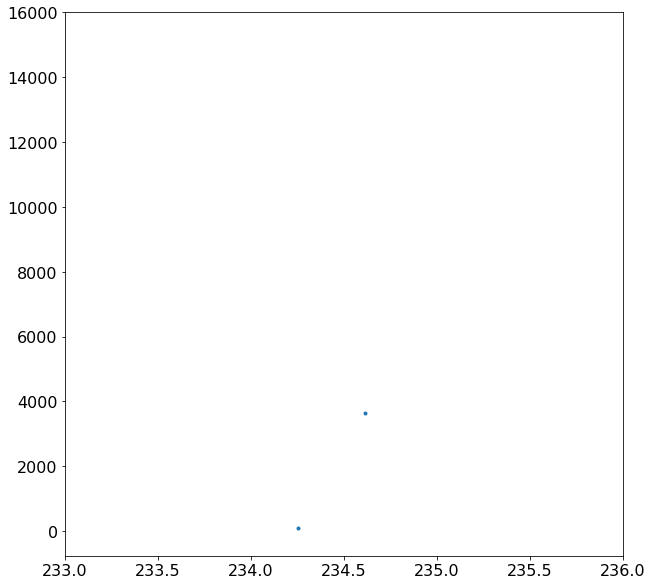

In [49]:
pl.plot(nacltbl['Freq'], nacltbl['E_U'], '.')
pl.xlim(233,236)

(233.0, 236.0)

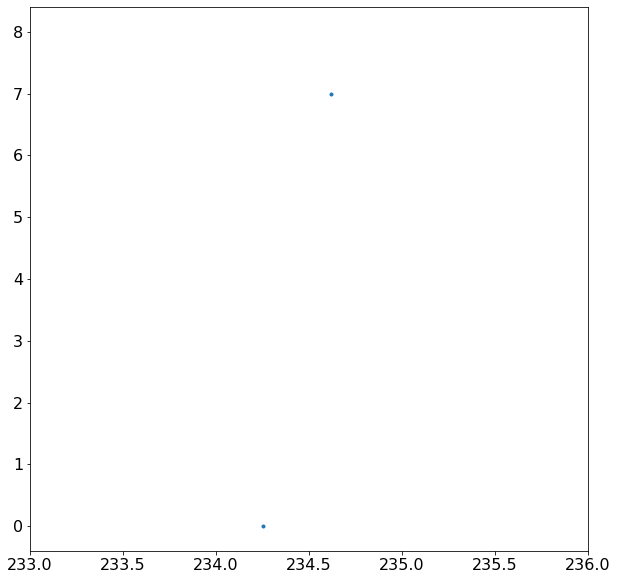

In [50]:
pl.plot(nacltbl['Freq'], nacltbl['vu'], '.')
pl.xlim(233,236)

In [51]:
lines_to_plot

array([False, False, False, ..., False, False, False])

In [52]:
from IPython.display import Image
#Image("YichenKei/spectra/figures/color_labels/color_labels_IRAS1654754

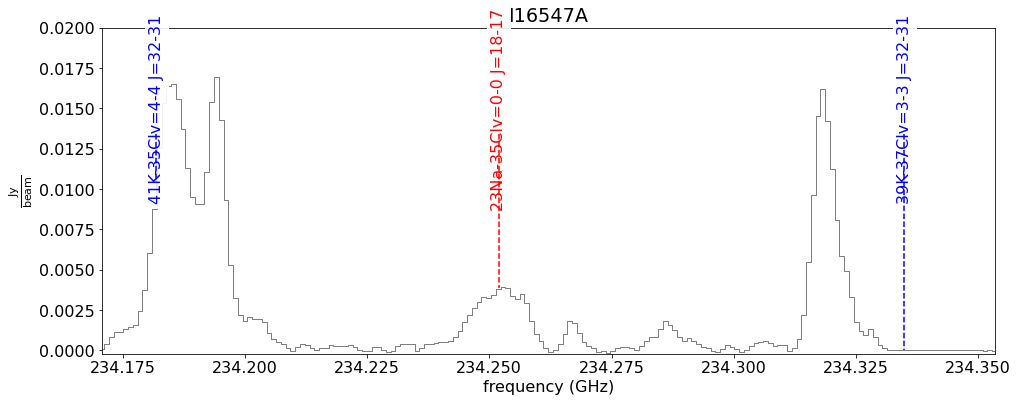

In [53]:
Image("YichenKei/spectra/figures/color_labels/color_labels_IRAS16547IRAS16547.234252MHz.NaCl.image.pbcor_A_stack.png")

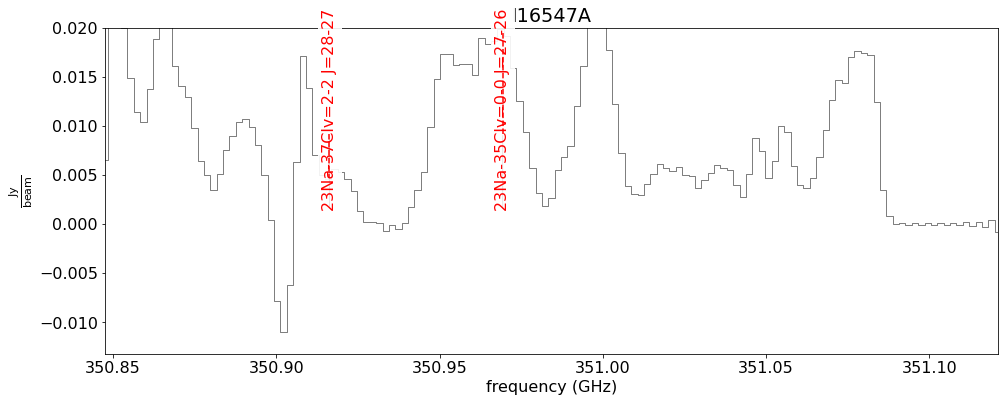

In [54]:
Image("YichenKei/spectra/figures/color_labels/color_labels_IRAS16547IRAS16547.350969MHz.NaCl.image.pbcor_A_stack.png")

In [55]:
ls YichenKei/spectra/figures/color_labels/

color_labels_IRAS16547.217980MHz.NaCl_v=2.image.pbcor_meanspec.png@
color_labels_IRAS16547.219615MHz.NaCl_v=1.image.pbcor_meanspec.png@
color_labels_IRAS16547.232510MHz.NaCl_v=1.image.pbcor_meanspec.png@
color_labels_IRAS16547.234252MHz.NaCl.image.pbcor_meanspec.png@
color_labels_IRAS16547.350969MHz.NaCl.image.pbcor_meanspec.png@
color_labels_IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_meanspec.png@
color_labels_IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor_meanspec.png@
color_labels_IRAS16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_A_stack.png@
color_labels_IRAS16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_B_stack.png@
color_labels_IRAS16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_I16547A_stack.png@
color_labels_IRAS16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_I16547B_stack.png@
color_labels_IRAS16547IRAS16547.219615MHz.NaCl_v=1.image.pbcor_A_stack.png@
color_labels_IRAS16547IRAS16547.219615MHz.NaCl_v=1.image.pbcor_B_stack.png@
color_labels_IRAS16547IRAS16547.219615MHz.NaCl_v=1

In [56]:
import glob
from IPython.display import Image,display

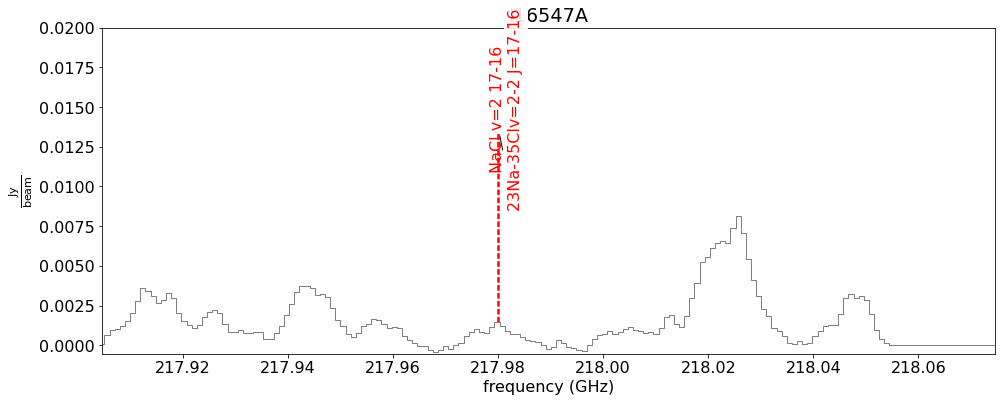

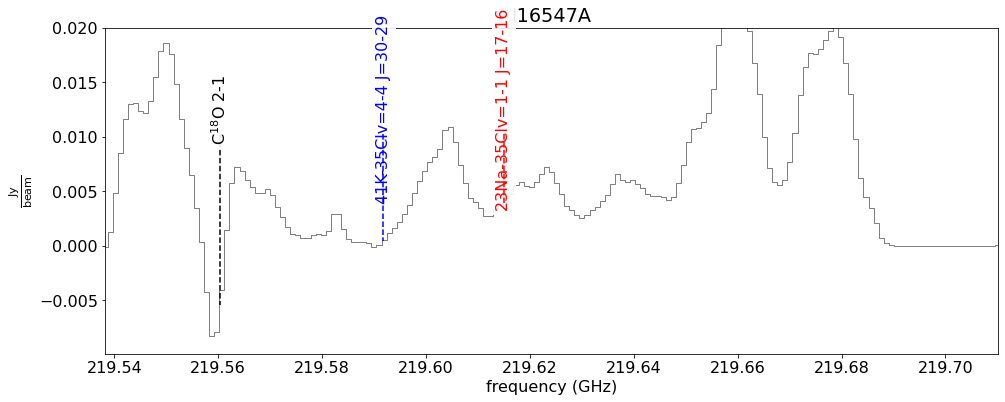

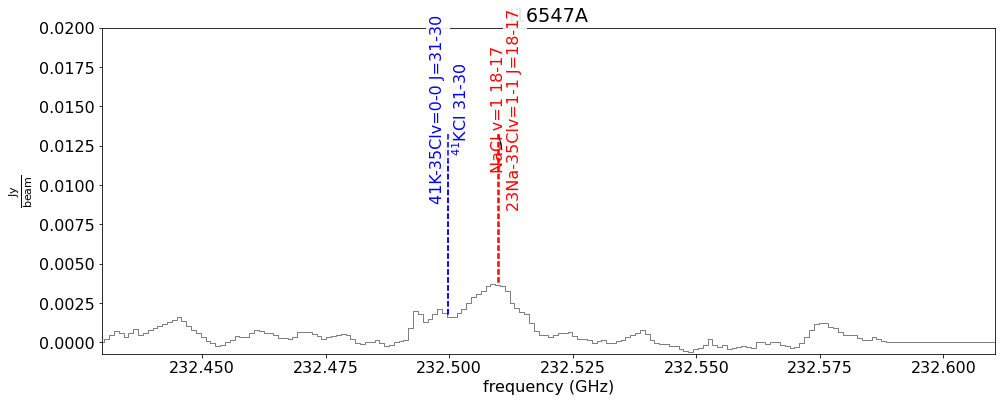

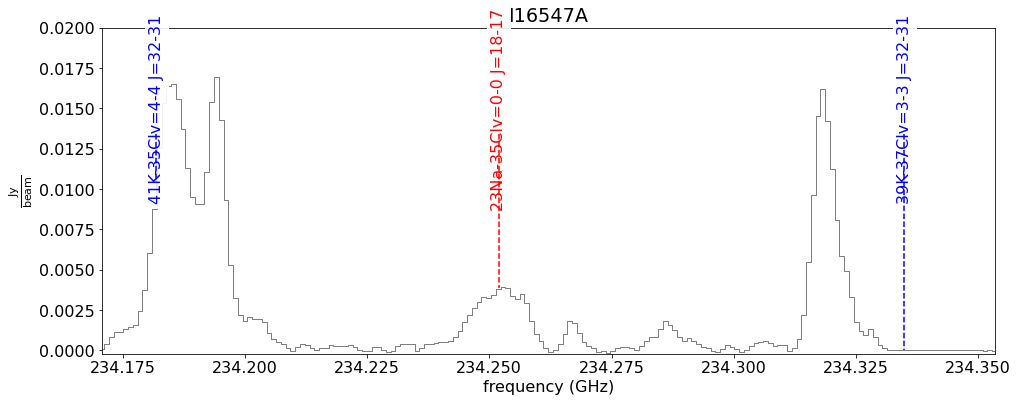

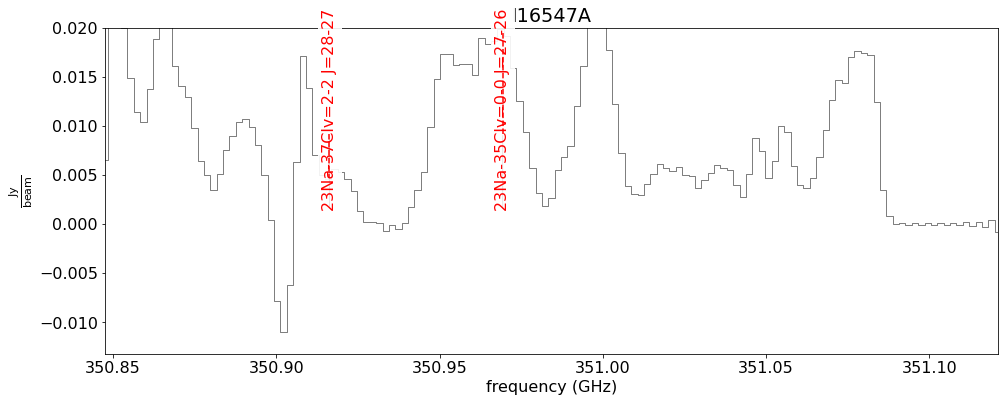

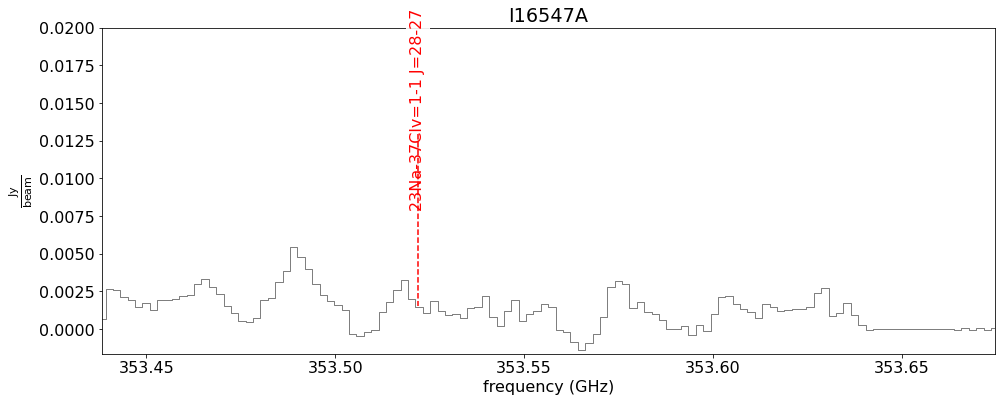

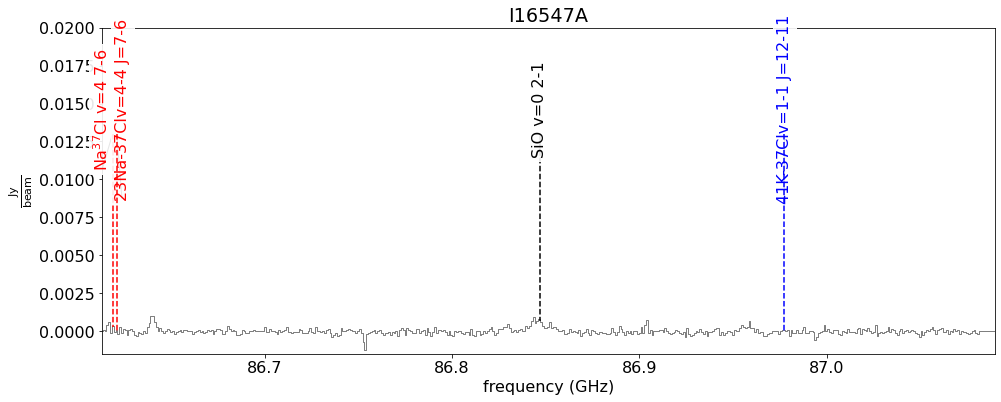

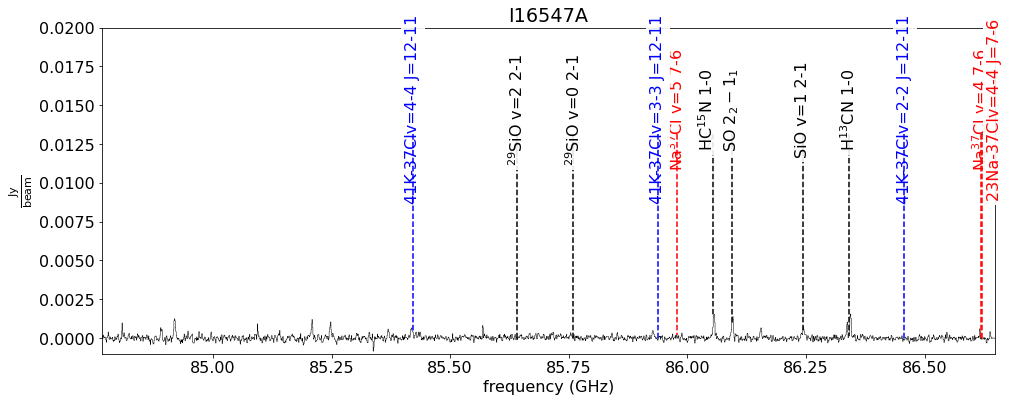

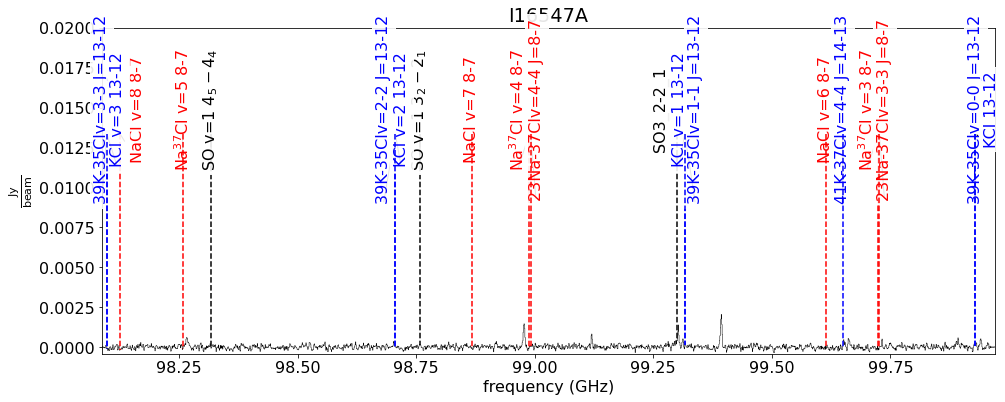

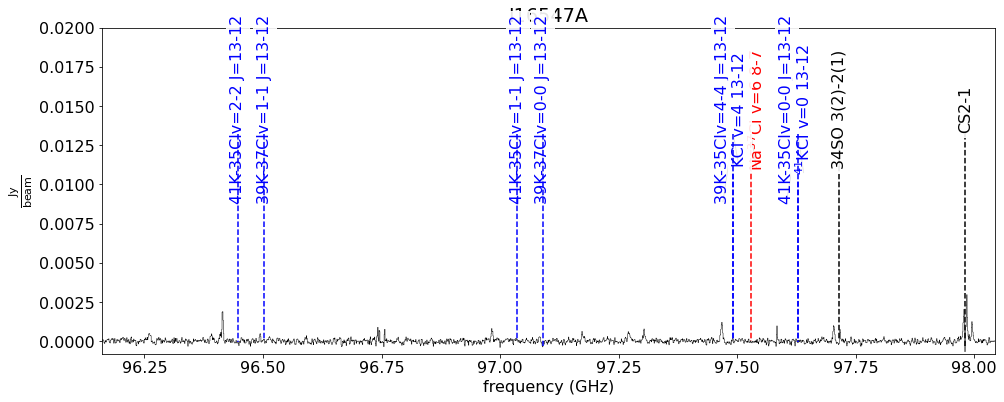

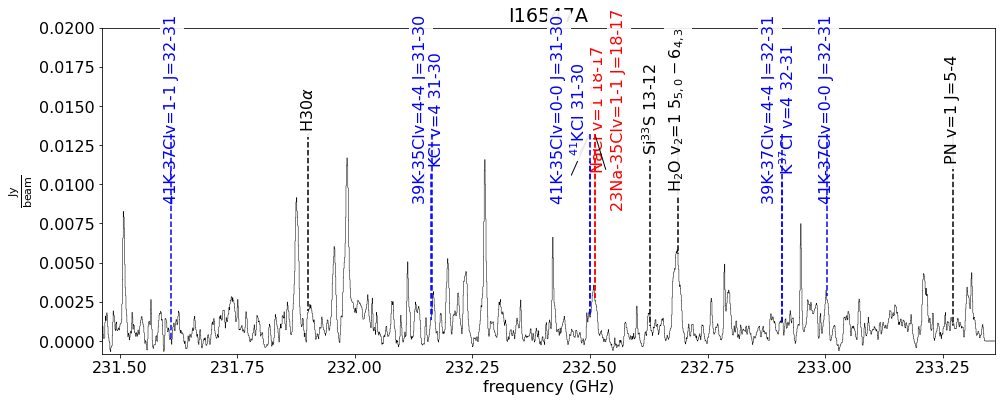

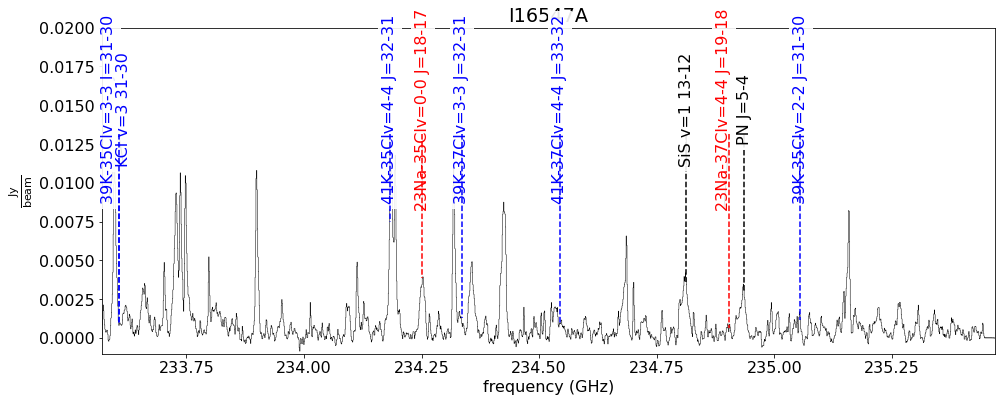

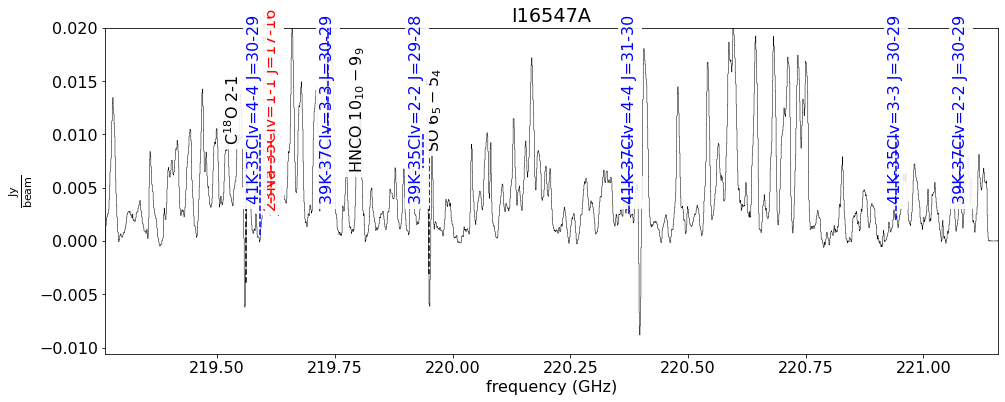

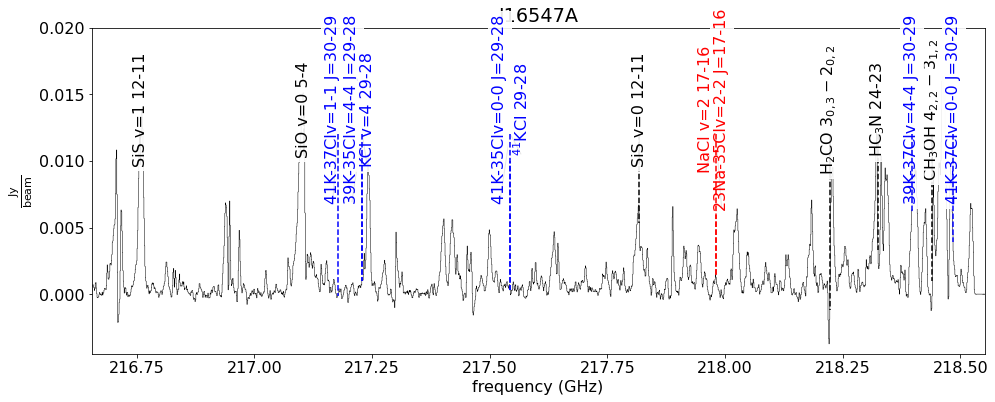

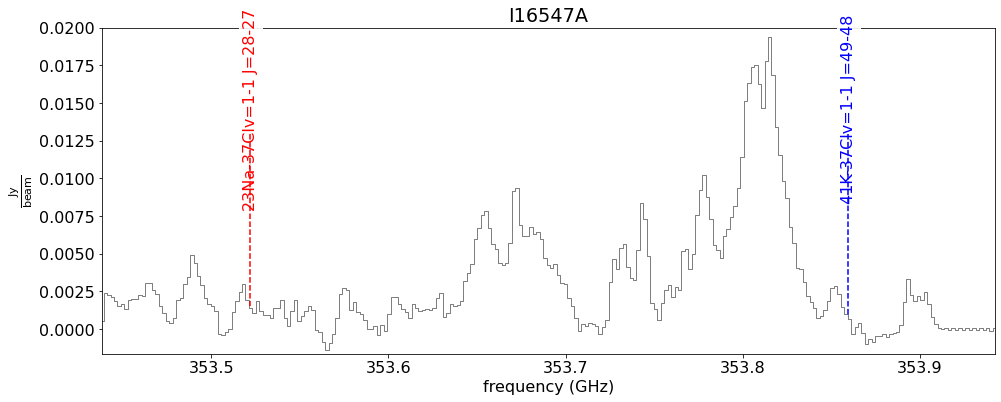

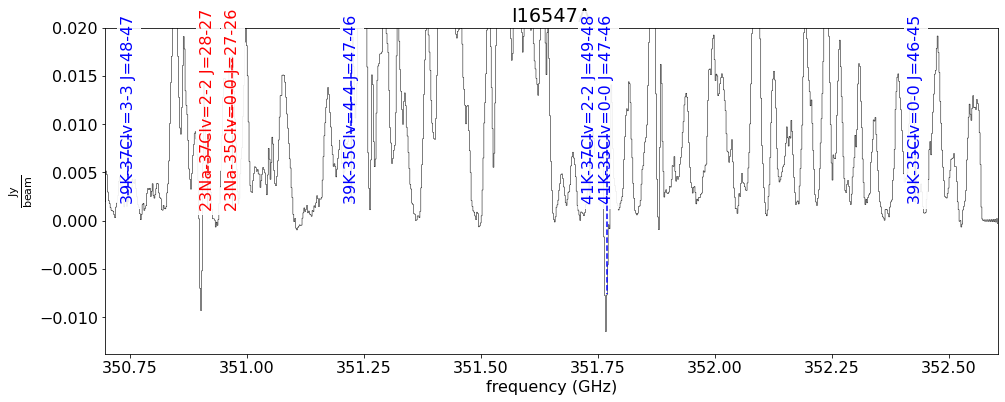

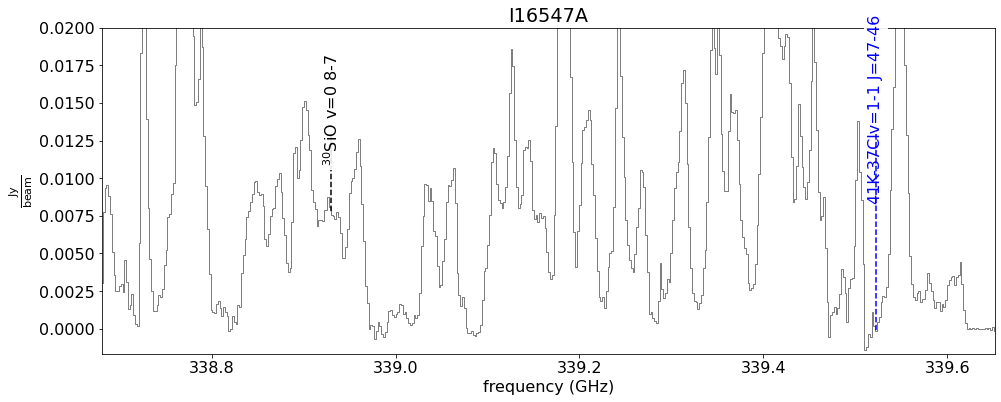

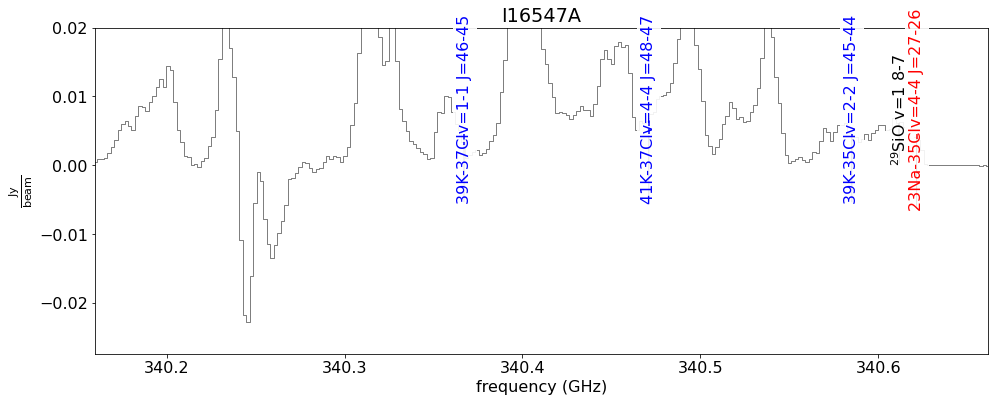

In [57]:
for fn in sorted(glob.glob("YichenKei/spectra/figures/color_labels/color_labels_*_A_stack.png")):
    display(Image(fn))

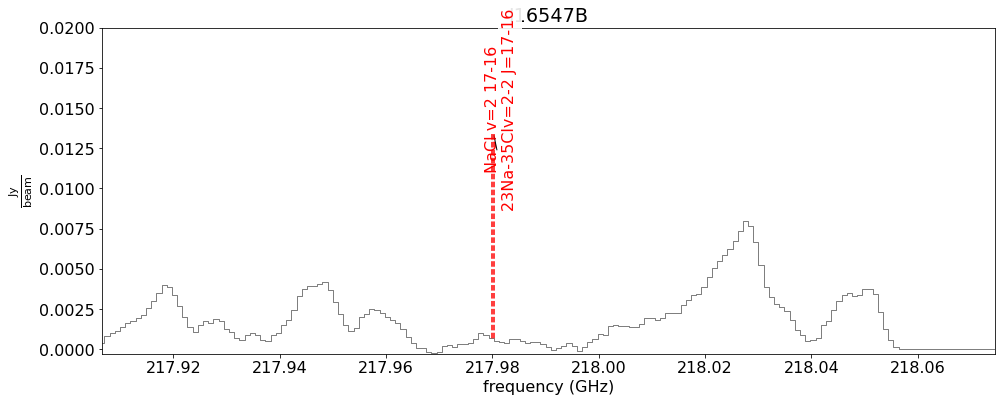

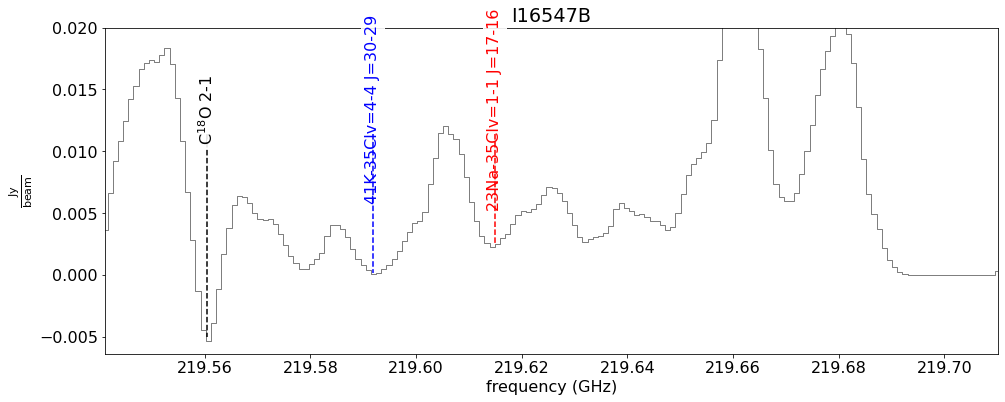

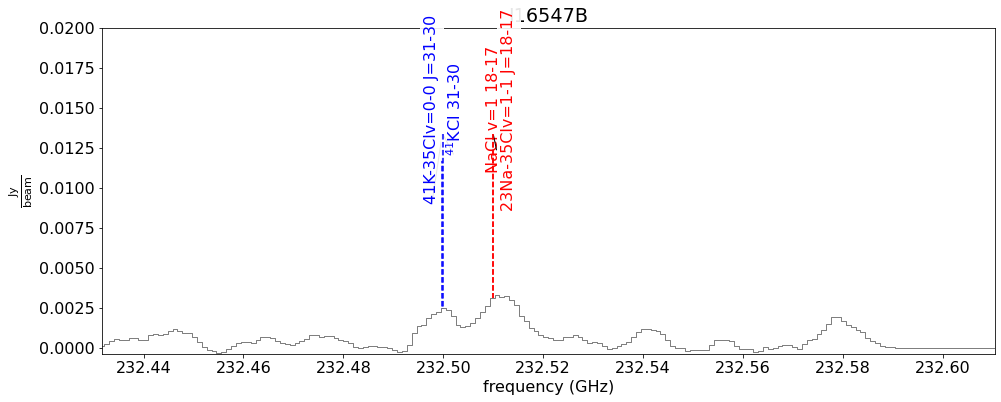

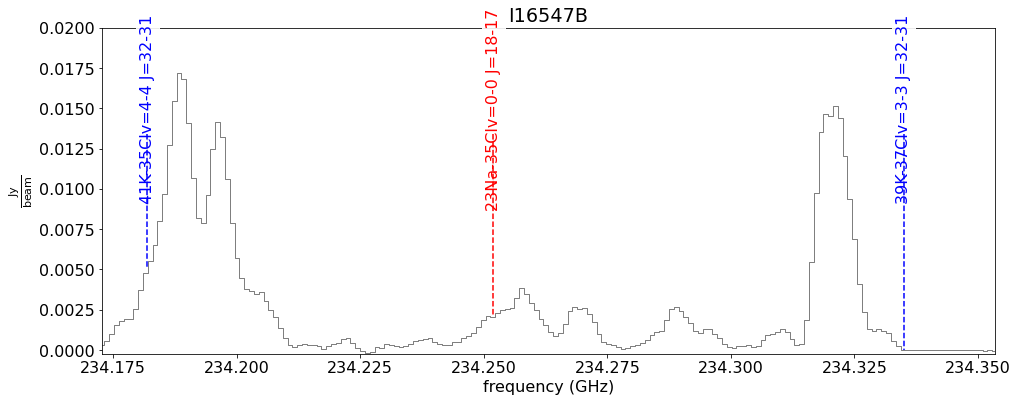

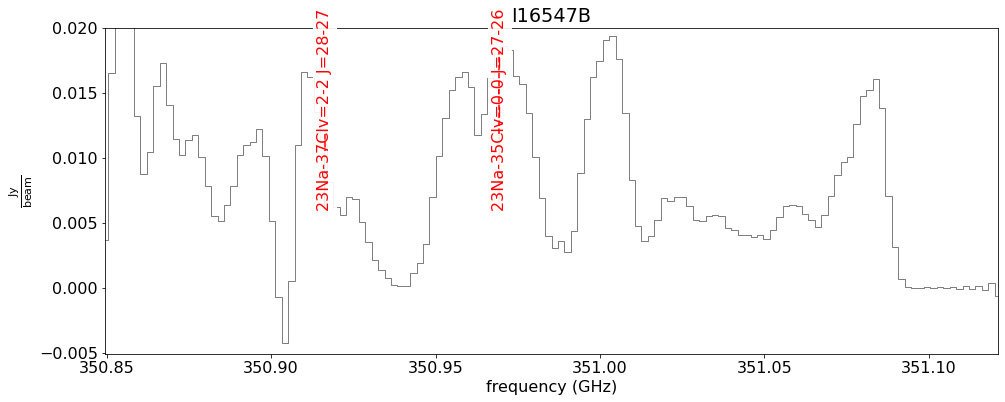

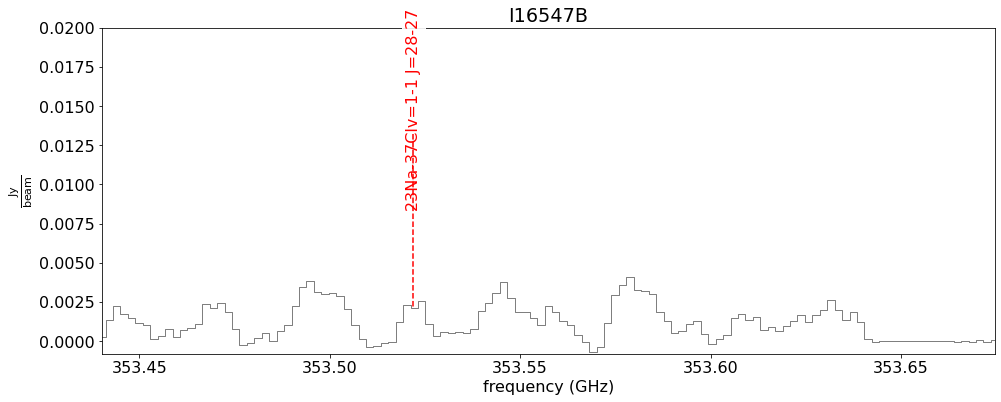

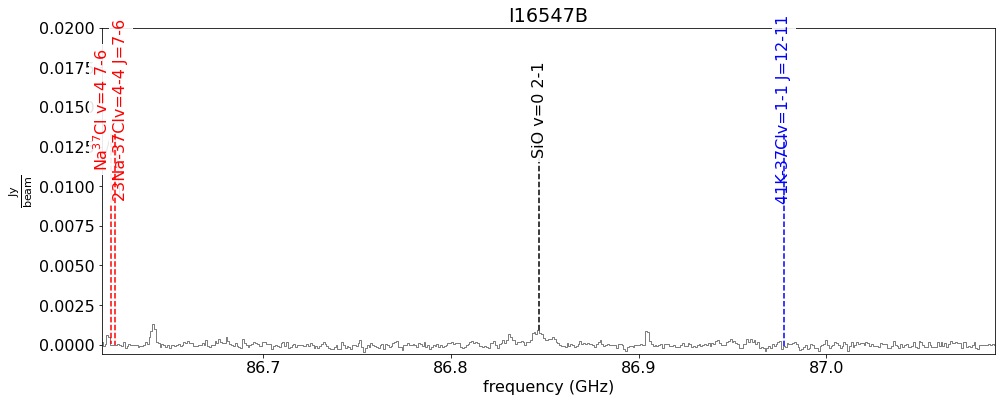

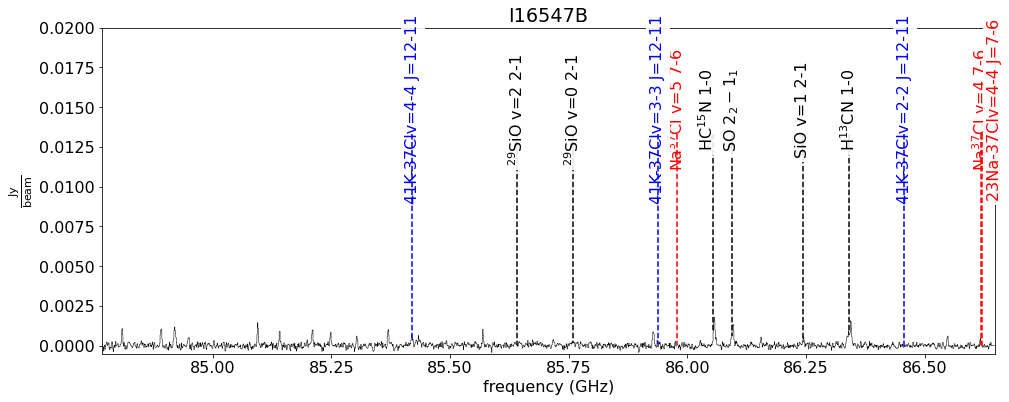

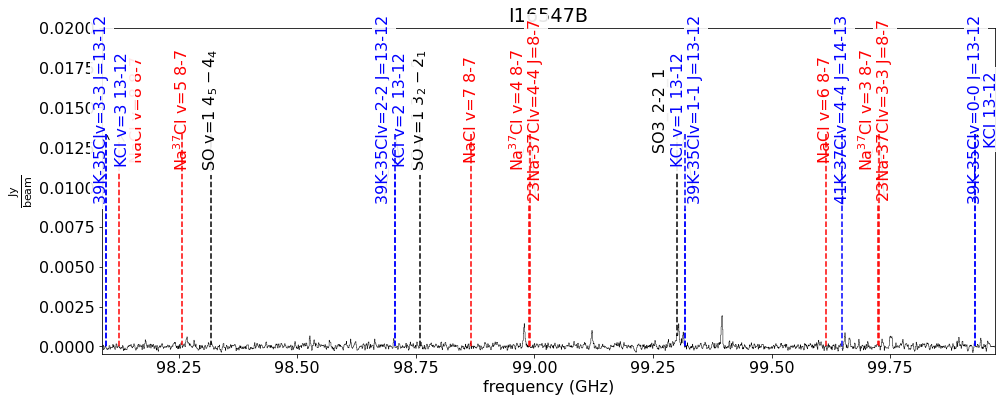

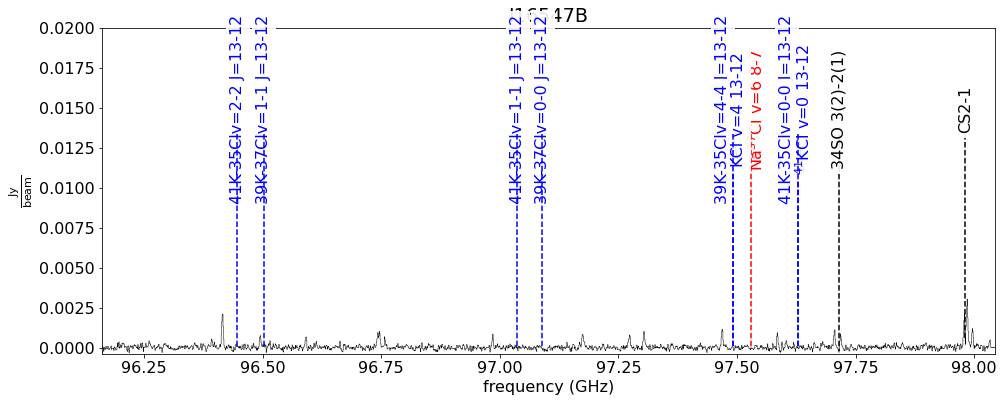

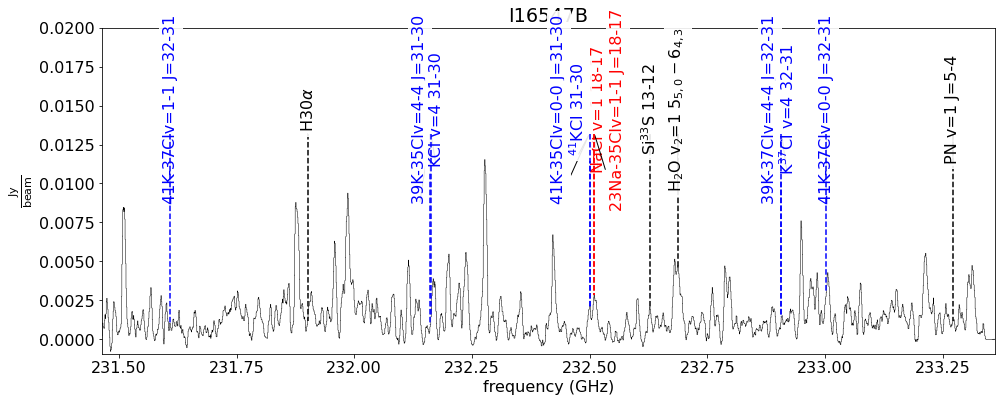

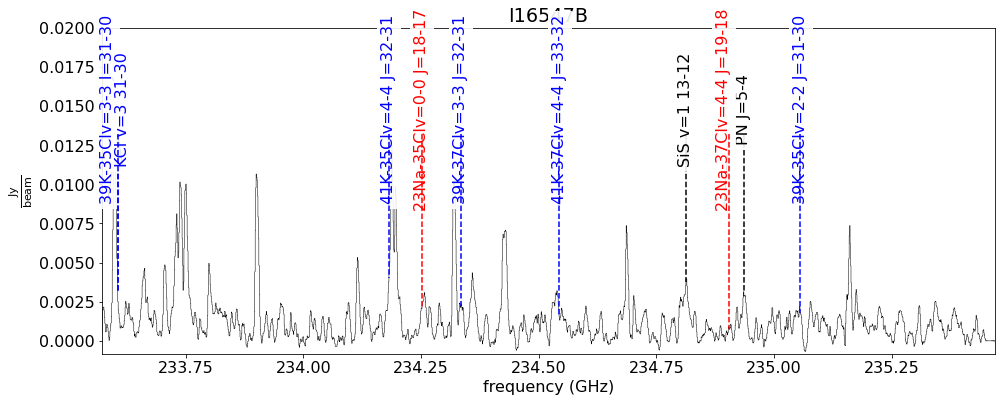

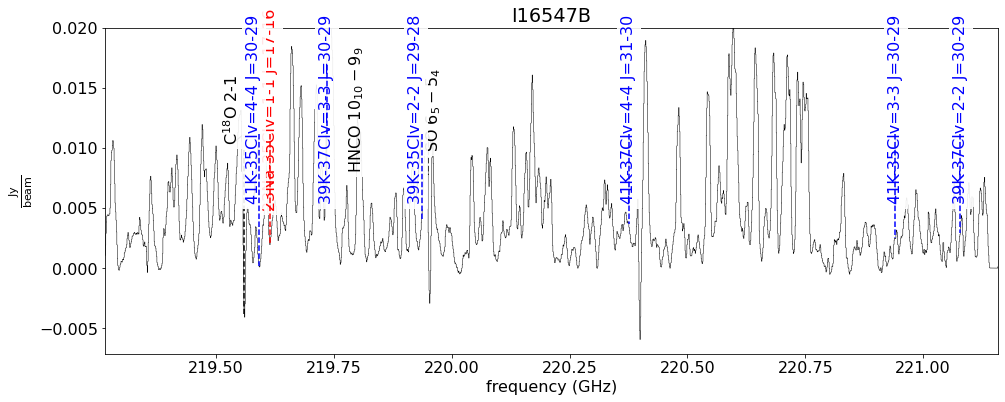

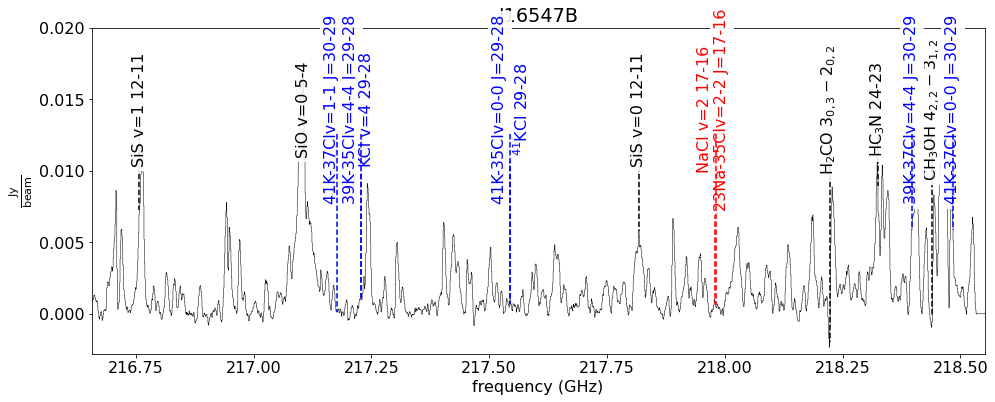

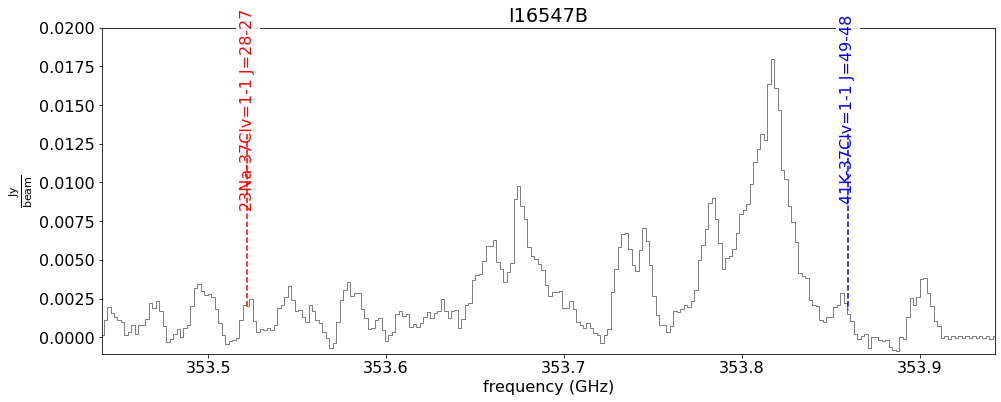

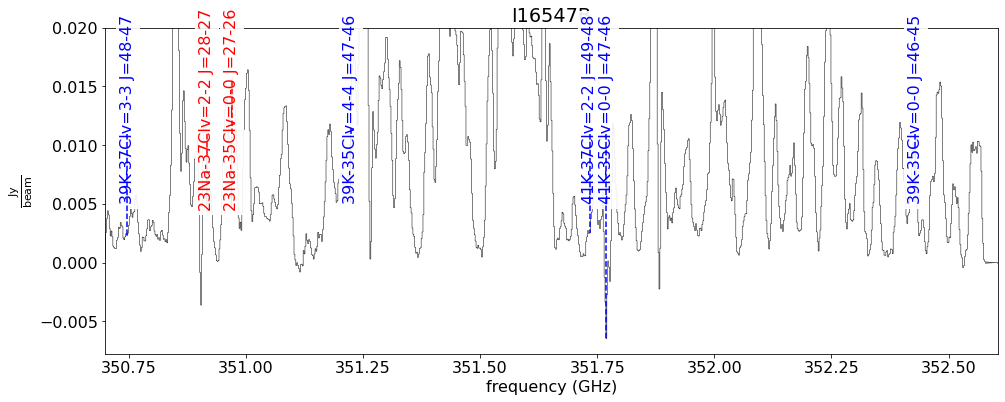

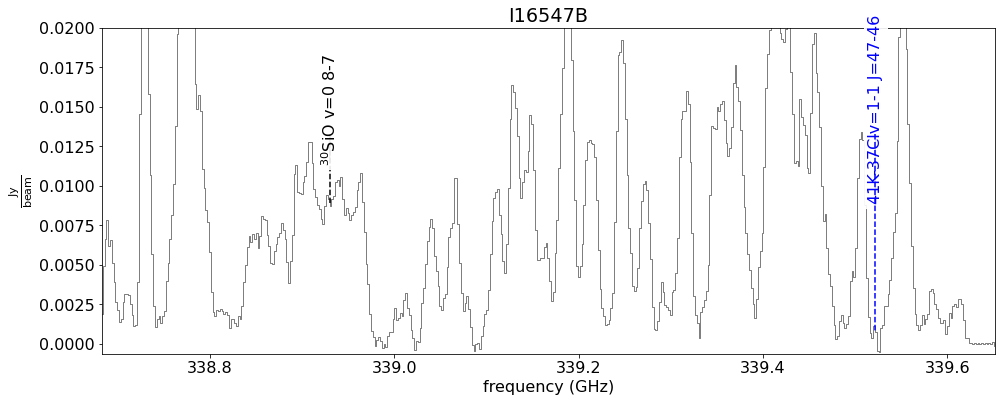

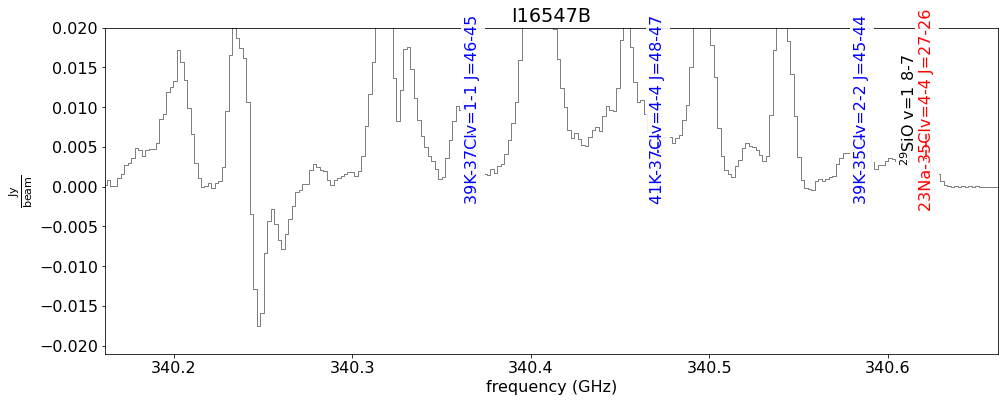

In [58]:
for fn in sorted(glob.glob("YichenKei/spectra/figures/color_labels/color_labels_*_B_stack.png")):
    display(Image(fn))

# NaCl Stackl

In [59]:
from spectral_cube.analysis_utilities import stack_cube

In [60]:
nacltables = salt_tables[3:5]
nacltables[0]

<Table length=16281>
Iso    Ju    Jl    vu    vl      nuCalc      e_nuCalc x_nuCalc   E_U      Aij         Freq       gu    gl           E_L               QNs             Species        
                                                                  K      1 / s        GHz                                                                            
str2 int16 int16 uint8 uint8    float64      float64    str9   float64  float32     float64    int16 int16        float64            str15             str24         
---- ----- ----- ----- ----- -------------- --------- -------- -------- -------- ------------- ----- ----- --------------------- ------------- ----------------------
  35     1     0     8     8    12268.92600  0.002000      MHz  4019.50    7e-07      12.26893    48    16    4018.9111844187687   v=8-8 J=1-0   23Na-35Clv=8-8 J=1-0
  35     1     0     7     7    12361.41100  0.001000      MHz  3534.10    7e-07      12.36141    48    16     3533.506745838812   v=7-7 J=1-0   23Na-35Clv=7-7 J=1-0
  35     1     0     6     6    12454.51100  0.001000      MHz  3043.90    7e-07      12.45451    48    16     3043.302277743511   v=6-6 J=1-0   23Na-35Clv=6-6 J=1-0
  35     1     0     5     5    12548.22800  0.000000      MHz  2548.90    7e-07      12.54823    48    16      2548.29778003688   v=5-5 J=1-0   23Na-35Clv=5-5 J=1-0
  35     1     0     4     4    12642.56100  0.000000      MHz  2049.20    7e-07      12.64256    48    16     2048.593252766911   v=4-4 J=1-0   23Na-35Clv=4-4 J=1-0
  35     1     0     3     3    12737.51100  0.000000      MHz  1544.50    7e-07      12.73751    48    16    1543.8886958856133   v=3-3 J=1-0   23Na-35Clv=3-3 J=1-0
  35     1     0     2     2    12833.07700  0.000000      MHz  1034.90    7e-07      12.83308    48    16    1034.2841094409778   v=2-2 J=1-0   23Na-35Clv=2-2 J=1-0
  35     1     0     1     1    12929.26100  0.000000      MHz   520.30    7e-07      12.92926    48    16     519.6794933370201   v=1-1 J=1-0   23Na-35Clv=1-1 J=1-0
  35     1     0     0     0    13026.06200  0.000000      MHz     0.60    7e-07      13.02606    48    16 -0.025152378267389364   v=0-0 J=1-0   23Na-35Clv=0-0 J=1-0
  35     2     1     8     8    24537.63300  0.004000      MHz  4020.70    6e-06      24.53763    80    48    4019.5223793478795   v=8-8 J=2-1   23Na-35Clv=8-8 J=2-1
  35     2     1     7     7    24722.60100  0.003000      MHz  3535.30    6e-06      24.72260    80    48    3534.1135022839517   v=7-7 J=2-1   23Na-35Clv=7-7 J=2-1
  35     2     1     6     6    24908.80100  0.002000      MHz  3045.10    6e-06      24.90880    80    48     3043.904566093349   v=6-6 J=2-1   23Na-35Clv=6-6 J=2-1
  35     2     1     5     5    25096.23400  0.001000      MHz  2550.20    6e-06      25.09623    80    48     2548.995570728079   v=5-5 J=2-1   23Na-35Clv=5-5 J=2-1
  35     2     1     4     4    25284.90000  0.001000      MHz  2050.40    6e-06      25.28490    80    48    2049.1865161881424   v=4-4 J=2-1   23Na-35Clv=4-4 J=2-1
  35     2     1     3     3    25474.79900  0.001000      MHz  1545.70    6e-06      25.47480    80    48    1544.4774024735386   v=3-3 J=2-1   23Na-35Clv=3-3 J=2-1
  35     2     1     2     2    25665.93100  0.000000      MHz  1036.10    6e-06      25.66593    80    48    1034.8682295842675   v=2-2 J=2-1   23Na-35Clv=2-2 J=2-1
  35     2     1     1     1    25858.29800  0.001000      MHz   521.50    7e-06      25.85830    80    48     520.2589974243446   v=1-1 J=2-1   23Na-35Clv=1-1 J=2-1
  35     2     1     0     0    26051.90000  0.001000      MHz     1.90    7e-06      26.05190    80    48    0.6497059937697054   v=0-0 J=2-1   23Na-35Clv=0-0 J=2-1
  35     3     2     8     8    36805.90000  0.007000      MHz  4022.50    2e-05      36.80590   112    80      4020.73359539366   v=8-8 J=3-2   23Na-35Clv=8-8 J=3-2
  35     3     2     7     7    37083.35100  0.004000      MHz  3537.00    2e-05      37.08335   112    80    3535.2202798457606   v=7-7 J=3-2   23Na-35Clv=7-7 J

In [61]:
import spectral_cube.analysis_utilities
import imp
imp.reload(spectral_cube.analysis_utilities)
from spectral_cube.analysis_utilities import stack_cube

In [62]:
ls YichenKei/spw

I16547A.reg@
I16547B.reg@
IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor.fits*
IRAS16547.Band3.spw1.selfcal.rp.image.pbcor.fits*
IRAS16547.Band3.spw2.selfcal.rp.image.pbcor.fits*
IRAS16547.Band3.spw3.selfcal.rp.image.pbcor.fits*
IRAS16547.Band6.spw0.selfcal.lowcontsub.rp.image.pbcor.fits*
IRAS16547.Band6.spw1.selfcal.lowcontsub.rp.image.pbcor.fits*
IRAS16547.Band6.spw2.selfcal.lowcontsub.rp.image.pbcor.fits*
IRAS16547.Band6.spw3.selfcal.lowcontsub.rp.image.pbcor.fits*
IRAS16547.Band7.spw0.selfcal.lowcontsub.16chan.rp.image.pbcor.fits*
IRAS16547.Band7.spw1.selfcal.lowcontsub.rp.image.pbcor.fits*
IRAS16547.Band7.spw2.selfcal.lowcontsub.8chan.rp.image.pbcor.fits*
IRAS16547.Band7.spw3.selfcal.lowcontsub.16chan.rp.image.pbcor.fits*


In [63]:
flist = sorted(glob.glob('YichenKei/spw/*Band6*'))

In [64]:
cubesA = [SpectralCube.read(fn).subcube_from_regions([peakAcirc_big]).to(u.K) for fn in flist]
cubesB = [SpectralCube.read(fn).subcube_from_regions([peakBcirc_big]).to(u.K) for fn in flist]

In [65]:
# only needed for VRSCs
if hasattr(cubesA[0], 'beams'):
    beams = radio_beam.Beams(beams=[cube.beams.common_beam(max_iter=20, max_epsilon=0.01) for cube in cubesA])
    cb=beams.common_beam()
else:
    cb = cubesA[0].beam

In [66]:
linelist = np.concatenate([data['Freq'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubesA],
                                                 axis=0)].quantity
                             for data in nacltables])
linenames = np.concatenate( [data['Species'][(data['vu'] <= 3) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubesA],
                                                 axis=0)]
                             for data in nacltables] )
(linelist, linenames)

(<Quantity [217.980231, 219.614936, 232.509977, 234.251912] GHz>,
 array(['23Na-35Clv=2-2 J=17-16', '23Na-35Clv=1-1 J=17-16',
        '23Na-35Clv=1-1 J=18-17', '23Na-35Clv=0-0 J=18-17'], dtype='<U24'))

In [67]:
from astropy import log
log.setLevel('INFO')

In [68]:
#log.setLevel('DEBUG')
vcenA = vcen = -28.5*u.km/u.s
stackA, cutoutsA = stack_cube(cubesA,
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
stackA.to(u.K).write('YichenKei/NaCl_v_le_3_stackcubeA.fits', overwrite=True)

In [69]:
#log.setLevel('DEBUG')
vcenB = vcen = -27*u.km/u.s
stackB, cutoutsB = stack_cube(cubesB,
                   linelist=linelist,
                   vmin=vcen-30*u.km/u.s,
                   vmax=vcen+30*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
#log.setLevel('INFO')
stackB.to(u.K).write('YichenKei/NaCl_v_le_3_stackcubeB.fits', overwrite=True)

INFO: Auto-setting vmin to -1.823e+02 [aplpy.core]
INFO: Auto-setting vmax to  1.295e+03 [aplpy.core]


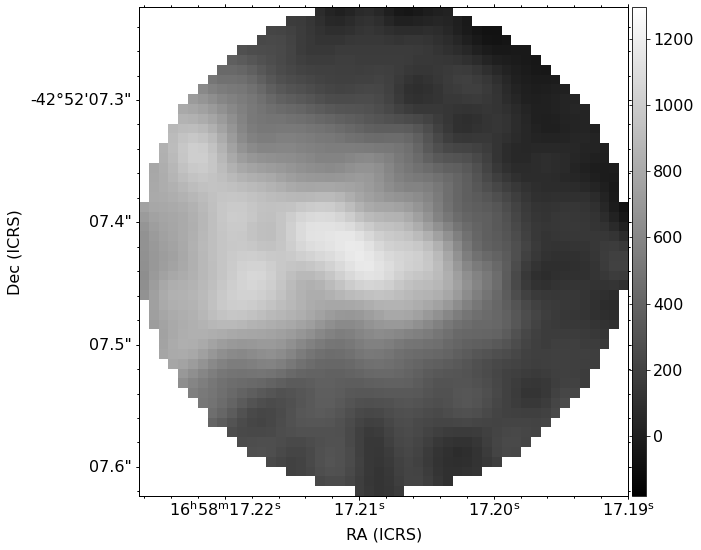

In [70]:
stackAcube = SpectralCube.read('YichenKei/NaCl_v_le_3_stackcubeA.fits')
stackAcube.moment0().quicklook()

INFO: Auto-setting vmin to -9.959e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.277e+03 [aplpy.core]


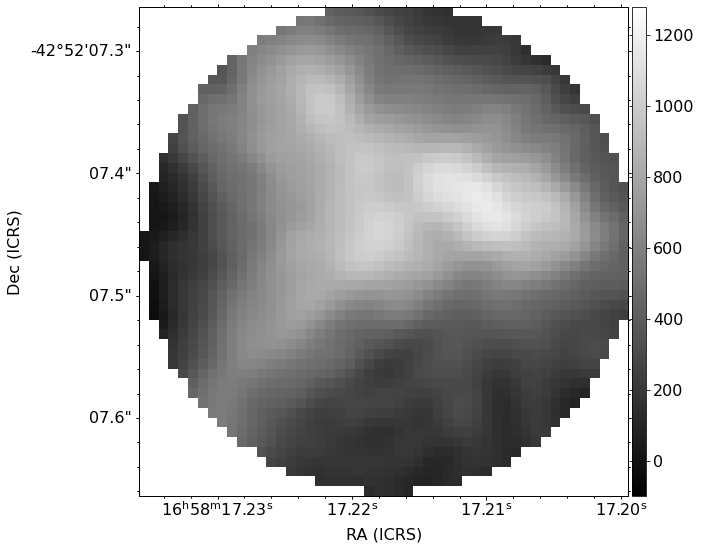

In [71]:
stackBcube = SpectralCube.read('YichenKei/NaCl_v_le_3_stackcubeB.fits')
stackBcube.moment0().quicklook()

# Build masks for A and B

B goes from -55 to -22 in water; at >=-22 km/s there is a contaminant line.

A goes safely from -55 to -10, the contaminant doesn't hit it.

In [75]:
water_cube

SpectralCube with shape=(89, 125, 125) and unit=K:
 n_x:    125  type_x: RA---SIN  unit_x: deg    range:   254.571551 deg:  254.571927 deg
 n_y:    125  type_y: DEC--SIN  unit_y: deg    range:   -42.868877 deg:  -42.868601 deg
 n_s:     89  type_s: VRAD      unit_s: km / s  range:      -90.383 km / s:      20.343 km / s

In [86]:
stackAcube

SpectralCube with shape=(46, 50, 50) and unit=K:
 n_x:     50  type_x: RA---SIN  unit_x: deg    range:   254.571626 deg:  254.571775 deg
 n_y:     50  type_y: DEC--SIN  unit_y: deg    range:   -42.868783 deg:  -42.868674 deg
 n_s:     46  type_s: VRAD      unit_s: km / s  range:      -58.470 km / s:       1.970 km / s

In [89]:
water_cube.spectral_interpolate(stackAcube.spectral_axis)

SpectralCube with shape=(46, 125, 125) and unit=K:
 n_x:    125  type_x: RA---SIN  unit_x: deg    range:   254.571551 deg:  254.571927 deg
 n_y:    125  type_y: DEC--SIN  unit_y: deg    range:   -42.868877 deg:  -42.868601 deg
 n_s:     46  type_s: VRAD      unit_s: km / s  range:      -58.470 km / s:       1.970 km / s

In [80]:
stackAcube.wcs.wcs.ctype[2]

'VRAD'

In [81]:
water_cube.wcs.wcs.ctype[2]

'VRAD'

In [91]:
water_cube_regridA = water_cube # just... give up

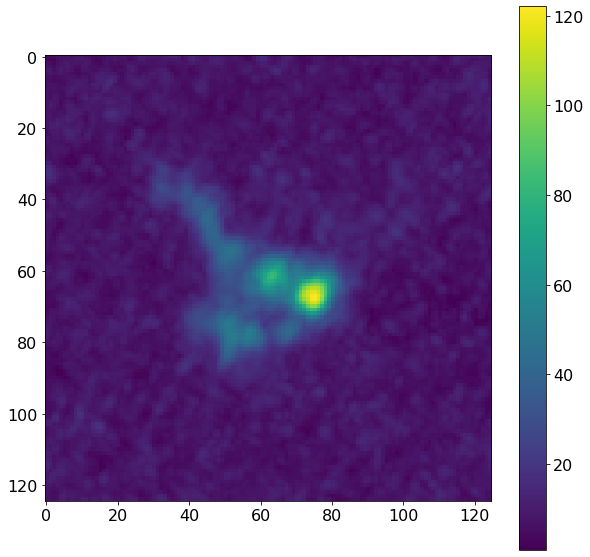

In [92]:
water_cube_regridA.spectral_slab(-55*u.km/u.s, -22*u.km/u.s).max(axis=0).quicklook(use_aplpy=False)
pl.colorbar()

In [93]:
i16547areg = regions.Regions.read('YichenKei/I16547A.reg')
i16547breg = regions.Regions.read('YichenKei/I16547B.reg')

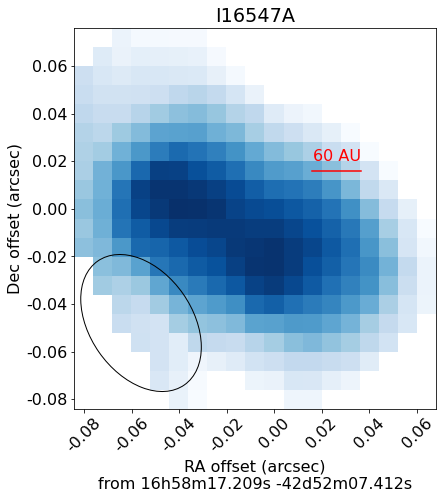

In [104]:
from dask_image.ndmorph import binary_dilation, binary_erosion
from scipy.ndimage import binary_dilation, binary_erosion

m3d = (water_cube_regridA > 40*u.K).include()
m3d = binary_erosion(m3d, iterations=1)
m3d = binary_dilation(m3d, iterations=2)
#m3d = m3d.compute()


m3db = (stackAcube > 20*u.K).include()
m3db = binary_erosion(m3db, iterations=1)
m3db = binary_dilation(m3db, iterations=2)
m0 = stackAcube.with_mask(m3db).subcube_from_regions(i16547areg).moment0()

pixscale_au = (np.abs((wcs.utils.proj_plane_pixel_area(m0.wcs)**0.5*u.deg).to(u.arcsec)) * distance).to(u.au, u.dimensionless_angles())

pl.figure(figsize=(7,7,))
pl.imshow(m0.value, cmap='Blues', origin='lower',)# vmax=m0.value.max()*2,)
          #norm=simple_norm(m0.value, stretch='log', max_cut=m0.value.max()*10))
ax = pl.gca()

dp_60 = (60*u.au / pixscale_au).decompose()

pl.title("I16547A")
pl.plot([12, 12+dp_60], [12,12], color='r')
pl.text(12 + dp_60/2, 12.5, f'60 AU', horizontalalignment='center', color='r')
pixscale = np.abs((wcs.utils.proj_plane_pixel_area(m0.wcs)**0.5*u.deg).to(u.arcsec))
axlims = ax.axis()

xtlocs = ax.get_xticks()
xticklabels = map(lambda x: f"{x:0.2f}", (xtlocs-10)*pixscale.value)
pl.xticks(xtlocs, xticklabels, rotation=45)

ytlocs = ax.get_yticks()
yticklabels = map(lambda x: f"{x:0.2f}", (ytlocs-10)*pixscale.value)
pl.yticks(ytlocs, yticklabels, rotation=0)

ax.axis(axlims)

bm = stackAcube.beam
bmell = bm.ellipse_to_plot(3, 4, pixscale)
bmell.set_facecolor((0.8,0.85,1,))
bmell.set_facecolor('none')
bmell.set_edgecolor('k')
pl.gca().add_artist(bmell)



offset_loc = m0.wcs.celestial.pixel_to_world(10,10)

ax.set_xlabel(f"RA offset (arcsec)\nfrom {offset_loc.to_string('hmsdms', precision=3)}")
ax.set_ylabel("Dec offset (arcsec)")
pl.savefig("YichenKei/I16547A_NaCl_mom0_ticks.png", bbox_inches='tight', dpi=300)

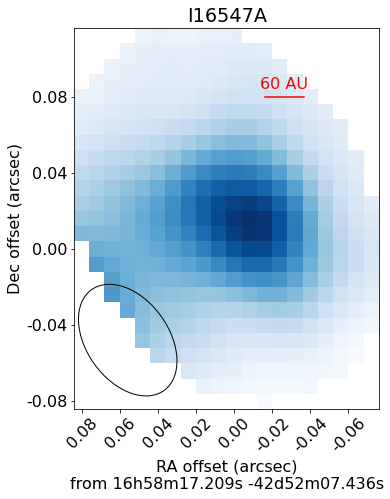

In [105]:
m0 = water_cube.subcube_from_regions(i16547areg).spectral_slab(-55*u.km/u.s, -10*u.km/u.s).moment0()

pixscale_au = (np.abs((wcs.utils.proj_plane_pixel_area(m0.wcs)**0.5*u.deg).to(u.arcsec)) * distance).to(u.au, u.dimensionless_angles())

pl.figure(figsize=(7,7,))

pl.imshow(m0.value, cmap='Blues', origin='lower',)# vmax=m0.value.max()*2,)
          #norm=simple_norm(m0.value, stretch='log', max_cut=m0.value.max()*10))
ax = pl.gca()

dp_60 = (60*u.au / pixscale_au).decompose()

pl.title("I16547A")
pl.plot([12, 12+dp_60], [20,20], color='r')
pl.text(12 + dp_60/2, 20.5, f'60 AU', horizontalalignment='center', color='r')
pixscale = np.abs((wcs.utils.proj_plane_pixel_area(m0.wcs)**0.5*u.deg).to(u.arcsec))
axlims = ax.axis()

xtlocs = ax.get_xticks()
xticklabels = map(lambda x: f"{x:0.2f}", (10-xtlocs)*pixscale.value)
pl.xticks(xtlocs, xticklabels, rotation=45)

ytlocs = ax.get_yticks()
yticklabels = map(lambda x: f"{x:0.2f}", (ytlocs-10)*pixscale.value)
pl.yticks(ytlocs, yticklabels, rotation=0)

ax.axis(axlims)

bm = water_cube.beam
bmell = bm.ellipse_to_plot(3, 4, pixscale)
bmell.set_facecolor((0.8,0.85,1,))
bmell.set_facecolor('none')
bmell.set_edgecolor('k')
pl.gca().add_artist(bmell)


offset_loc = m0.wcs.celestial.pixel_to_world(10,10)

ax.set_xlabel(f"RA offset (arcsec)\nfrom {offset_loc.to_string('hmsdms', precision=3)}")
ax.set_ylabel("Dec offset (arcsec)")
pl.savefig("YichenKei/I16547A_water_mom0_ticks.png", bbox_inches='tight', dpi=300)

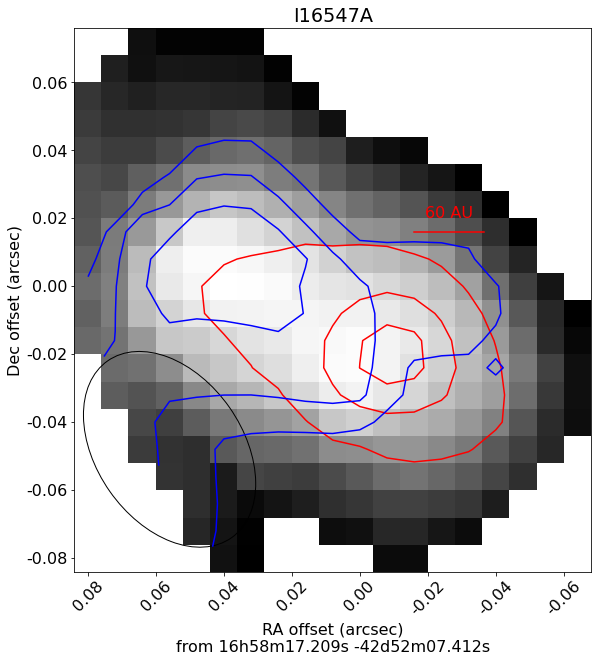

In [106]:
from dask_image.ndmorph import binary_dilation, binary_erosion
from scipy.ndimage import binary_dilation, binary_erosion

m3d = (water_cube_regridA > 40*u.K).include()
m3d = binary_erosion(m3d, iterations=1)
m3d = binary_dilation(m3d, iterations=2)
#m3d = m3d.compute()


m3db = (stackAcube > 20*u.K).include()
m3db = binary_erosion(m3db, iterations=1)
m3db = binary_dilation(m3db, iterations=2)
m0 = stackAcube.with_mask(m3db).subcube_from_regions(i16547areg).moment0()
m0r = stackAcube.with_mask(m3db).subcube_from_regions(i16547areg).spectral_slab(-30*u.km/u.s, -20*u.km/u.s).moment0()
m0b = stackAcube.with_mask(m3db).subcube_from_regions(i16547areg).spectral_slab(-55*u.km/u.s, -35*u.km/u.s).moment0()


pixscale_au = (np.abs((wcs.utils.proj_plane_pixel_area(stackAcube.wcs.celestial)**0.5*u.deg).to(u.arcsec)) * distance).to(u.au, u.dimensionless_angles())

pl.imshow(m0.value, cmap='gray', origin='lower',)# vmax=m0.value.max()*2,)
          #norm=simple_norm(m0.value, stretch='log', max_cut=m0.value.max()*10))
ax = pl.gca()
ax.contour(m0r.value, colors=['r']*5, levels=[300, 400, 450])
ax.contour(m0b.value, colors=['b']*5, levels=[100, 150, 200])

dp_60 = (60*u.au / pixscale_au).decompose()

pl.title("I16547A")
pl.plot([12, 12+dp_60], [12,12], color='r')
pl.text(12 + dp_60/2, 12.5, f'60 AU', horizontalalignment='center', color='r')
pixscale = np.abs((wcs.utils.proj_plane_pixel_area(stackAcube.wcs.celestial)**0.5*u.deg).to(u.arcsec))
axlims = ax.axis()

xtlocs = ax.get_xticks()
xticklabels = map(lambda x: f"{x:0.2f}", (10-xtlocs)*pixscale.value)
pl.xticks(xtlocs, xticklabels, rotation=45)

ytlocs = ax.get_yticks()
yticklabels = map(lambda x: f"{x:0.2f}", (ytlocs-10)*pixscale.value)
pl.yticks(ytlocs, yticklabels, rotation=0)

ax.axis(axlims)

bm = stackAcube.beam
bmell = bm.ellipse_to_plot(3, 4, pixscale)
bmell.set_facecolor('none')
bmell.set_edgecolor('k')
pl.gca().add_artist(bmell)


offset_loc = m0.wcs.celestial.pixel_to_world(10,10)

ax.set_xlabel(f"RA offset (arcsec)\nfrom {offset_loc.to_string('hmsdms', precision=3)}")
ax.set_ylabel("Dec offset (arcsec)")
pl.savefig("YichenKei/I16547A_NaCl_mom0_ticks_redbluecontours.png", bbox_inches='tight', dpi=300)

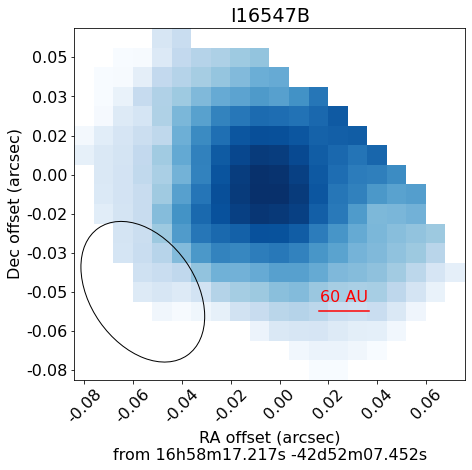

In [219]:
from dask_image.ndmorph import binary_dilation, binary_erosion
from scipy.ndimage import binary_dilation, binary_erosion

m3d = (water_cube_regridA > 40*u.K).include()
m3d = binary_erosion(m3d, iterations=1)
m3d = binary_dilation(m3d, iterations=2)
#m3d = m3d.compute()


m3db = (stackAcube > 15*u.K).include()
m3db = binary_erosion(m3db, iterations=1)
m3db = binary_dilation(m3db, iterations=2)
m0 = stackAcube.with_mask(m3db).subcube_from_regions(i16547breg).spectral_slab(-55*u.km/u.s, -22*u.km/u.s).moment0()

pixscale_au = (np.abs((wcs.utils.proj_plane_pixel_area(stackAcube.wcs.celestial)**0.5*u.deg).to(u.arcsec)) * distance).to(u.au, u.dimensionless_angles())
pl.figure(figsize=(7,7,))

pl.imshow(m0.value, cmap='Blues', origin='lower',)# vmax=m0.value.max()*2,)
          #norm=simple_norm(m0.value, stretch='log', max_cut=m0.value.max()*10))
ax = pl.gca()

dp_60 = (60*u.au / pixscale_au).decompose()

pl.title("I16547B")
pl.plot([12, 12+dp_60], [3,3], color='r')
pl.text(12 + dp_60/2, 3.5, f'60 AU', horizontalalignment='center', color='r')
pixscale = np.abs((wcs.utils.proj_plane_pixel_area(stackAcube.wcs.celestial)**0.5*u.deg).to(u.arcsec))
axlims = ax.axis()

xtlocs = ax.get_xticks()
xticklabels = map(lambda x: f"{x:0.2f}", (xtlocs-10)*pixscale.value)
pl.xticks(xtlocs, xticklabels, rotation=45)

ytlocs = ax.get_yticks()
yticklabels = map(lambda x: f"{x:0.2f}", (ytlocs-10)*pixscale.value)
pl.yticks(ytlocs, yticklabels, rotation=0)

ax.axis(axlims)

bm = stackAcube.beam
bmell = bm.ellipse_to_plot(3, 4, pixscale)
bmell.set_facecolor((0.8,0.85,1,))
bmell.set_facecolor('none')
bmell.set_edgecolor('k')
pl.gca().add_artist(bmell)


offset_loc = m0.wcs.celestial.pixel_to_world(10,10)

ax.set_xlabel(f"RA offset (arcsec)\nfrom {offset_loc.to_string('hmsdms', precision=3)}")
ax.set_ylabel("Dec offset (arcsec)")
pl.savefig("YichenKei/I16547B_NaCl_mom0_ticks.png", bbox_inches='tight', dpi=300)

INFO: Auto-setting vmin to -6.290e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.305e+01 [aplpy.core]
INFO: Auto-setting vmin to  2.786e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.008e+01 [aplpy.core]


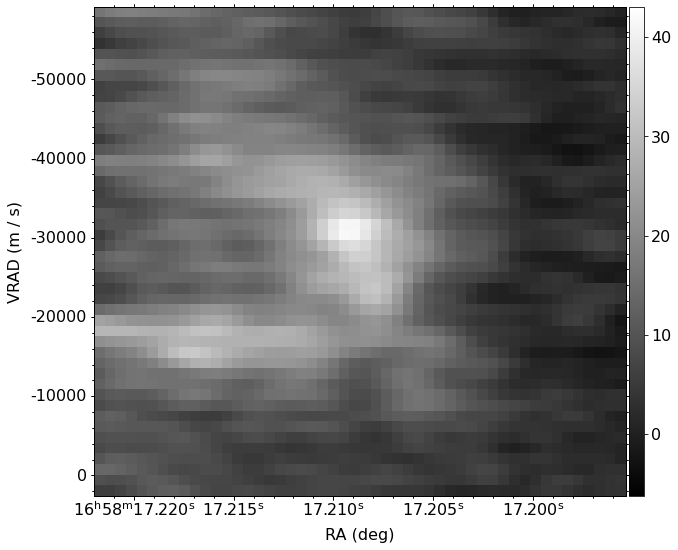

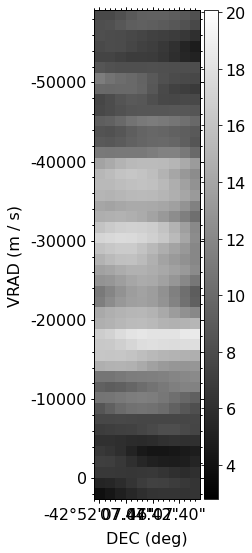

In [108]:
stackAcube[:,20:30,:].mean(axis=1).quicklook()
stackAcube[:,20:30,:].mean(axis=2).quicklook()

INFO: Auto-setting vmin to -6.166e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.614e+01 [aplpy.core]
INFO: Auto-setting vmin to -2.335e+00 [aplpy.core]
INFO: Auto-setting vmax to  2.620e+01 [aplpy.core]


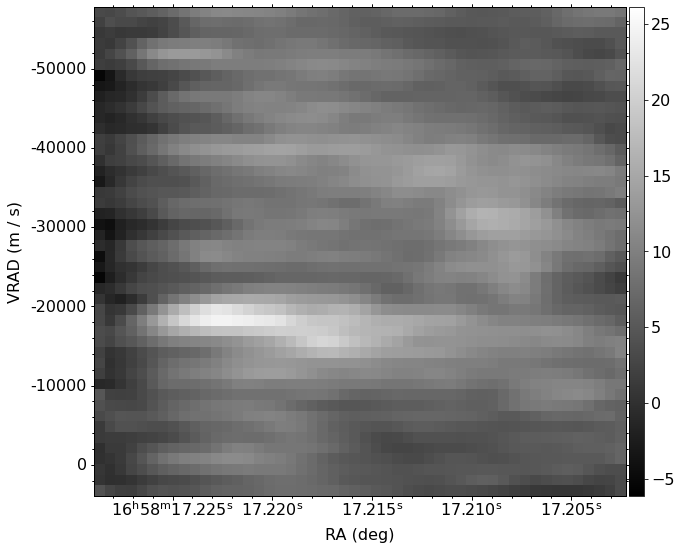

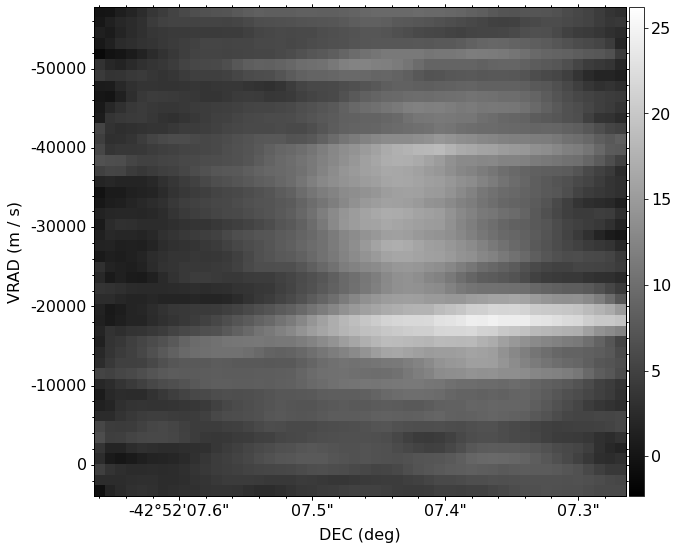

In [109]:
stackBcube.mean(axis=1).quicklook()
stackBcube.mean(axis=2).quicklook()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


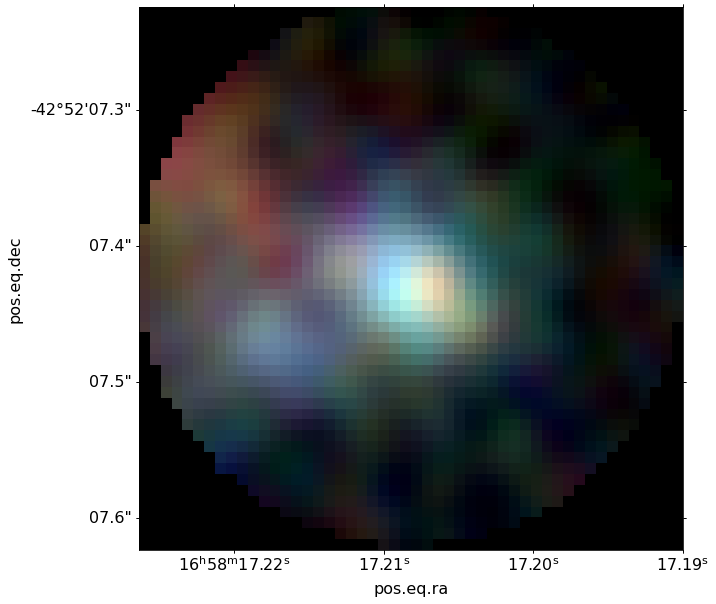

In [110]:
m0b = stackAcube.spectral_slab(-35*u.km/u.s, -30*u.km/u.s).moment0()
m0g = stackAcube.spectral_slab(-30*u.km/u.s, -25*u.km/u.s).moment0()
m0r = stackAcube.spectral_slab(-25*u.km/u.s, -20*u.km/u.s).moment0()
ax = pl.subplot(projection=m0b.wcs.celestial)
rgb = np.array([m0r.value, m0g.value, m0b.value]).swapaxes(0,2).swapaxes(0,1)
rgb /= np.nanmax(rgb)
ax.imshow(rgb, origin='lower')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


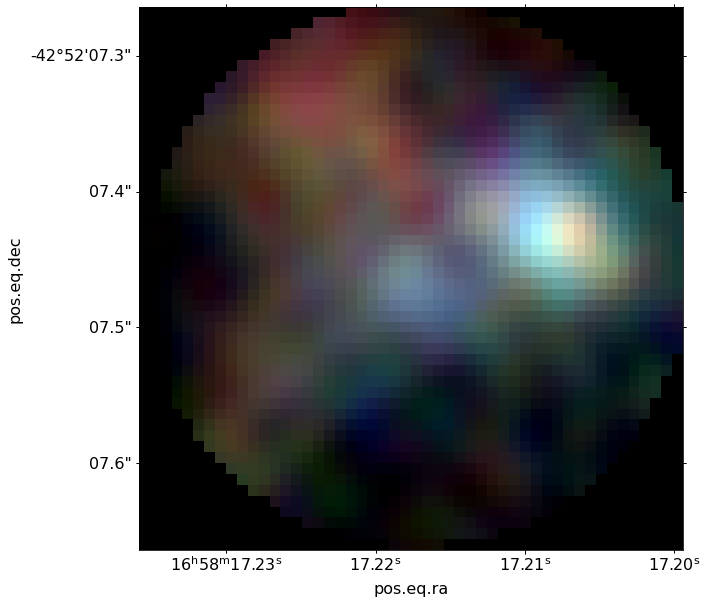

In [111]:
m0bB = stackBcube.spectral_slab(-35*u.km/u.s, -30*u.km/u.s).moment0()
m0gB = stackBcube.spectral_slab(-30*u.km/u.s, -25*u.km/u.s).moment0()
m0rB = stackBcube.spectral_slab(-25*u.km/u.s, -20*u.km/u.s).moment0()
ax = pl.subplot(projection=m0bB.wcs.celestial)
rgbB = np.array([m0rB.value, m0gB.value, m0bB.value]).swapaxes(0,2).swapaxes(0,1)
rgbB /= np.nanmax(rgbB)
ax.imshow(rgbB, origin='lower')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


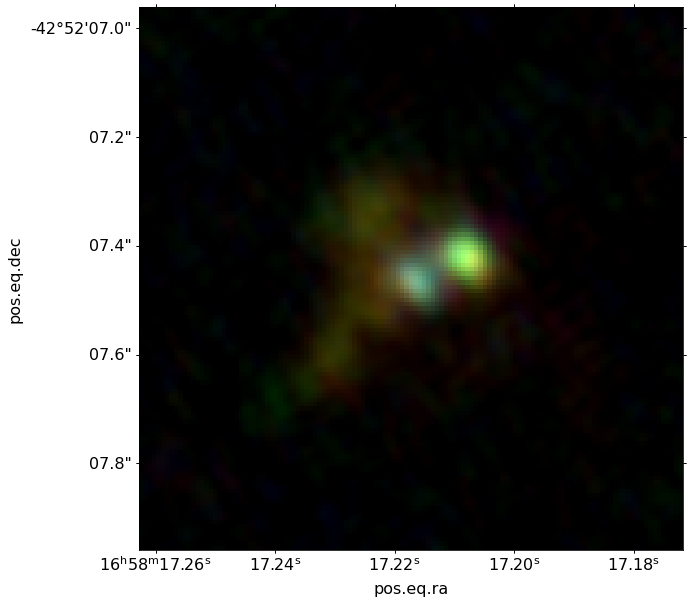

In [112]:
m0bw = water_cube.spectral_slab(-45*u.km/u.s, -35*u.km/u.s).moment0()
m0gw = water_cube.spectral_slab(-35*u.km/u.s, -25*u.km/u.s).moment0()
m0rw = water_cube.spectral_slab(-25*u.km/u.s, -15*u.km/u.s).moment0()
ax = pl.subplot(projection=m0bw.wcs.celestial)
rgbw = np.array([m0rw.value, m0gw.value, m0bw.value]).swapaxes(0,2).swapaxes(0,1)
rgbw /= np.nanmax(rgbw)
ax.imshow(rgbw, origin='lower')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


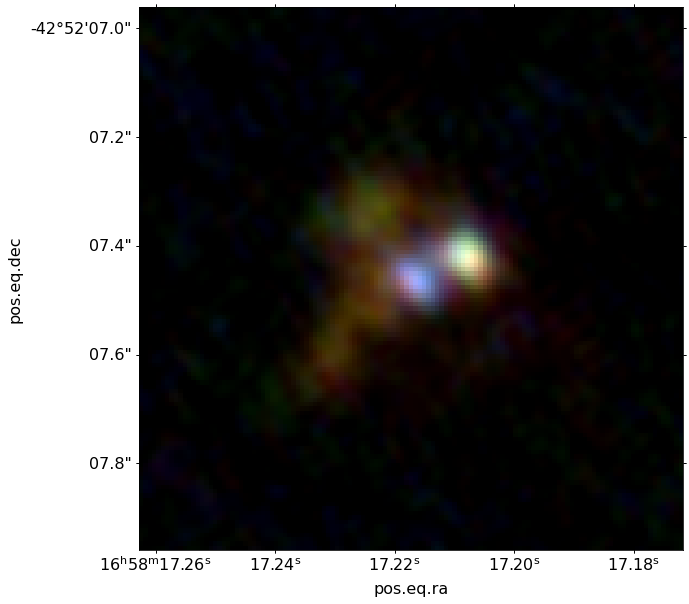

In [113]:
m0bw = water_cube.spectral_slab(-55*u.km/u.s, -32*u.km/u.s).moment0()
m0gw = water_cube.spectral_slab(-32*u.km/u.s, -28*u.km/u.s).moment0()
m0rw = water_cube.spectral_slab(-28*u.km/u.s, -15*u.km/u.s).moment0()
ax = pl.subplot(projection=m0bw.wcs.celestial)
rgbw = np.array([m0rw.value/np.nanmax(m0rw.value),
                 m0gw.value/np.nanmax(m0gw.value),
                 m0bw.value/np.nanmax(m0bw.value)]).swapaxes(0,2).swapaxes(0,1)
rgbw /= np.nanmax(rgbw)
ax.imshow(rgbw, origin='lower')

cont = SpectralCube.read('YichenKei/spw/IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor.fits', use_dask=True).median(axis=0)
print(cont.shape)

In [114]:
cont = SpectralCube.read('/orange/adamginsburg/salt/sanhueza/IRAS16547/IRAS165474247_G343.12-0.06.config8.cont_avg.selfcal_0.5_hogbom.image.fits')

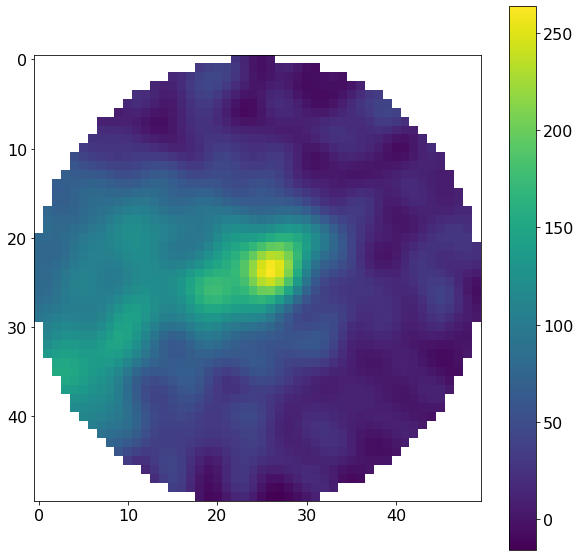

In [115]:
m0r.quicklook(use_aplpy=False)
pl.colorbar()

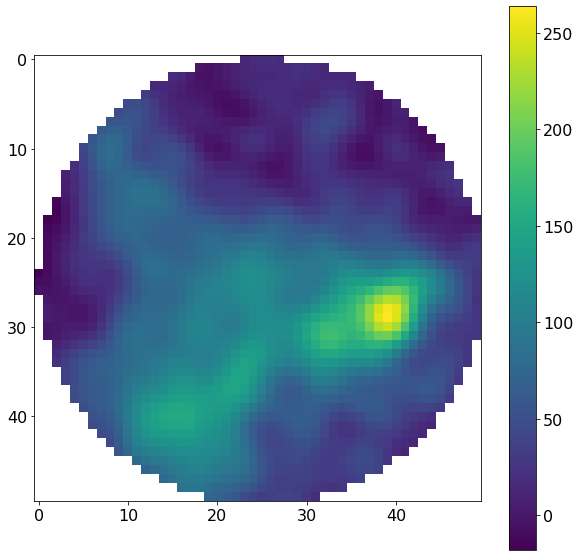

In [116]:
m0rB.quicklook(use_aplpy=False)
pl.colorbar()

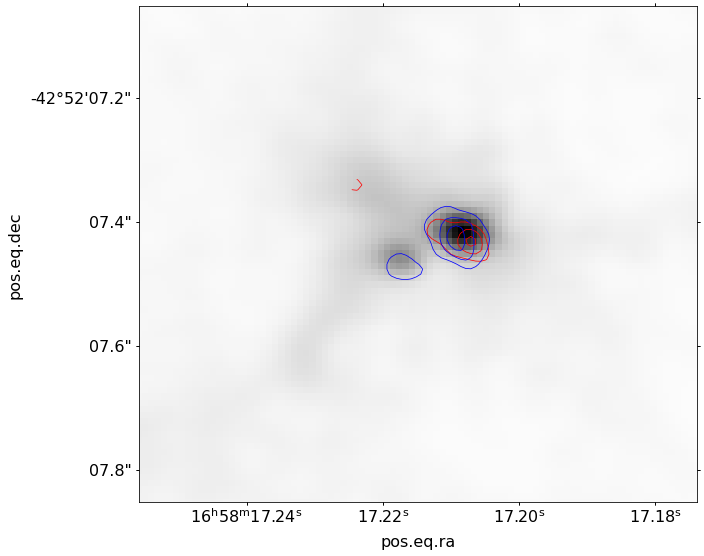

In [117]:
fig = pl.figure()
fig.add_subplot(projection=cont.wcs.celestial)
ax = fig.gca()
ax.imshow(cont[0].value, cmap='gray_r')
ax.axis((2460,2550,2530,2610))
ax.contour(m0r, colors=['r']*5, levels=[150,200,250], linewidths=[0.75]*5, transform=ax.get_transform(m0r.wcs.celestial))
ax.contour(m0b, colors=['b']*5, levels=[150,200,250], linewidths=[0.75]*5, transform=ax.get_transform(m0b.wcs.celestial))
#ax.contour(m0rB, colors=['r']*5, levels=[100, 125, 150], linewidths=[0.75]*5, transform=ax.get_transform(m0rB.wcs.celestial))
#ax.contour(m0bB, colors=['b']*5, levels=[100, 125, 150], linewidths=[0.75]*5, transform=ax.get_transform(m0bB.wcs.celestial))

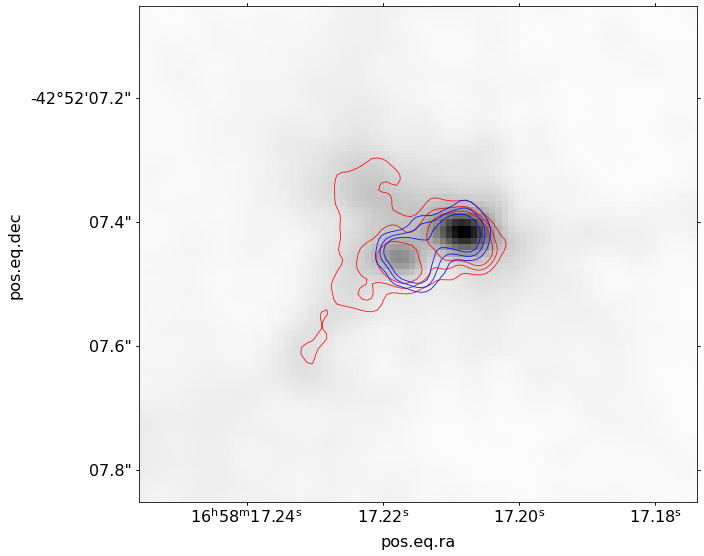

In [118]:
fig = pl.figure()
fig.add_subplot(projection=cont.wcs.celestial)
ax = fig.gca()
ax.imshow(cont[0].value, cmap='gray_r')
ax.axis((2460,2550,2530,2610))
ax.contour(m0rw, colors=['r']*5, levels=[300,400,500], linewidths=[0.75]*5, transform=ax.get_transform(m0rw.wcs.celestial))
ax.contour(m0bw, colors=['b']*5, levels=[300,400,500], linewidths=[0.75]*5, transform=ax.get_transform(m0bw.wcs.celestial))
#ax.contour(m0rB, colors=['r']*5, levels=[100, 125, 150], linewidths=[0.75]*5, transform=ax.get_transform(m0rB.wcs.celestial))
#ax.contour(m0bB, colors=['b']*5, levels=[100, 125, 150], linewidths=[0.75]*5, transform=ax.get_transform(m0bB.wcs.celestial))

This next figure should match the bottom-right panel of:

<img src="https://s3.amazonaws.com/aasie/images/2041-8205/900/1/L2/apjlabadfcf4_hr.jpg">

# Compare Tanaka/Zhang to Sanhueza

In [119]:
sanhueza = SpectralCube.read('/orange/adamginsburg/salt/sanhueza/IRAS16547/NaCl_v_le_3_stackcube.fits', use_dask=True)

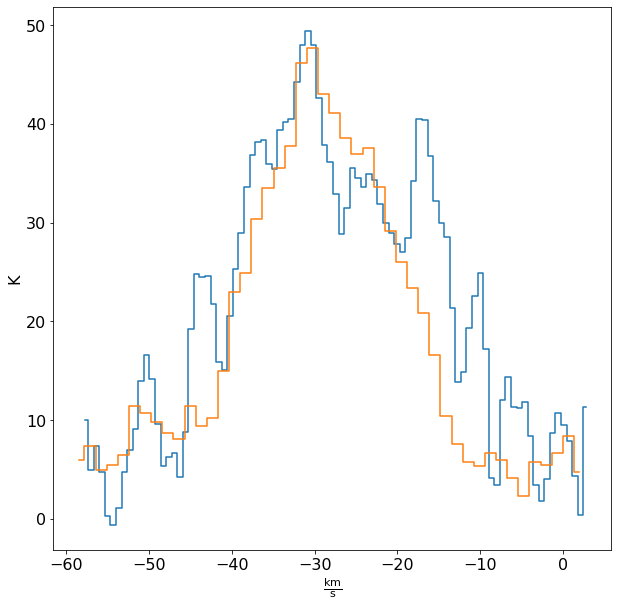

In [120]:
xA,yA = sanhueza.wcs.celestial.world_to_pixel(peakA)
sanhueza[:,int(yA),int(xA)].quicklook()
xA,yA = stackAcube.wcs.celestial.world_to_pixel(peakA)
stackAcube[:,int(yA),int(xA)].quicklook()

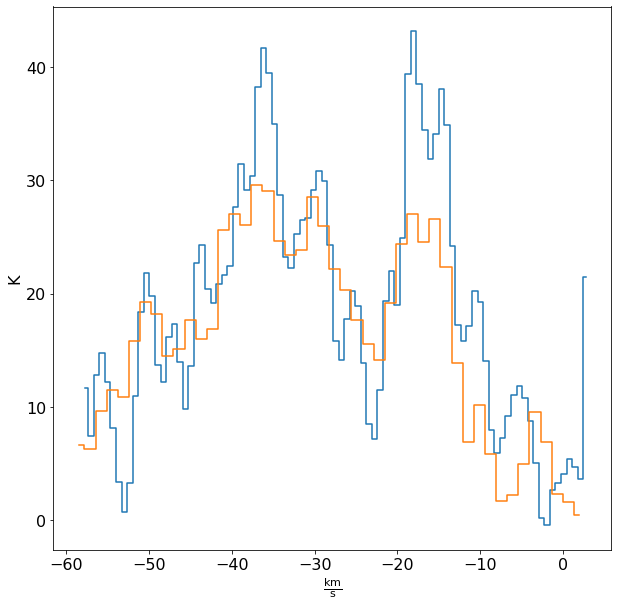

In [121]:
xB,yB = sanhueza.wcs.celestial.world_to_pixel(peakB)
sanhueza[:,int(yB),int(xB)].quicklook()
xB,yB = stackAcube.wcs.celestial.world_to_pixel(peakB)
stackAcube[:,int(yB),int(xB)].quicklook()

In [122]:
sanhuezawater = SpectralCube.read('/orange/adamginsburg/salt/sanhueza/IRAS16547/h2ocube.fits', use_dask=True)

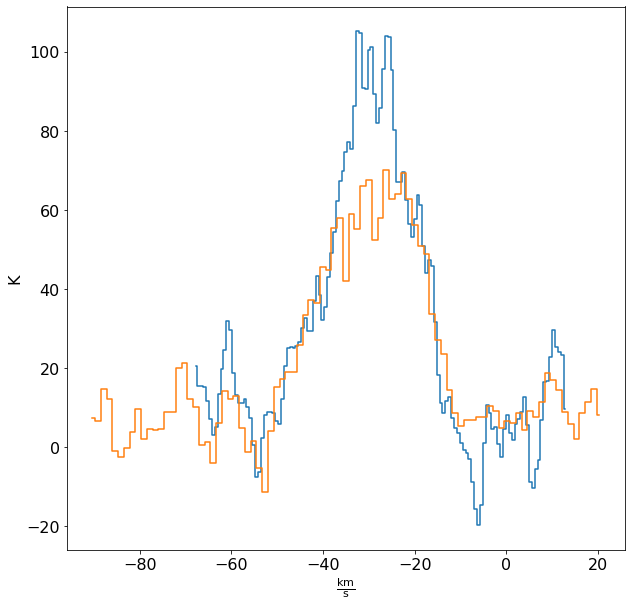

In [123]:
xB,yB = sanhuezawater.wcs.celestial.world_to_pixel(peakB)
sanhuezawater[:,int(yB),int(xB)].quicklook()
xB,yB = water_cube.wcs.celestial.world_to_pixel(peakB)
water_cube[:,int(yB),int(xB)].quicklook()

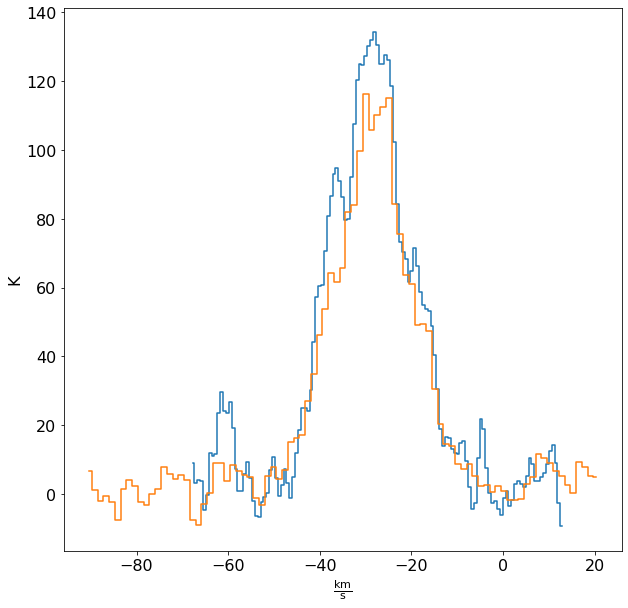

In [124]:
xA,yA = sanhuezawater.wcs.celestial.world_to_pixel(peakA)
sanhuezawater[:,int(yA),int(xA)].quicklook()
xA,yA = water_cube.wcs.celestial.world_to_pixel(peakA)
water_cube[:,int(yA),int(xA)].quicklook()

<img src="https://s3.amazonaws.com/aasie/images/2041-8205/900/1/L2/apjlabadfcf4_hr.jpg">

In [125]:
import pvextractor

In [126]:
peakA

<SkyCoord (ICRS): (ra, dec) in deg
    (254.57170083, -42.86872806)>

In [127]:
pathAangle = 55*u.deg
pathAcoords = coordinates.SkyCoord([peakA.directional_offset_by(pathAangle,0.15*u.arcsec, ), peakA.directional_offset_by(pathAangle-180*u.deg,0.15*u.arcsec, )])
pathA = pvextractor.Path(pathAcoords)

In [128]:
pathBangle = -125*u.deg
pathBcoords = coordinates.SkyCoord([peakB.directional_offset_by(pathBangle,0.15*u.arcsec, ), peakB.directional_offset_by(pathBangle-180*u.deg,0.15*u.arcsec, )])
pathB = pvextractor.Path(pathBcoords)

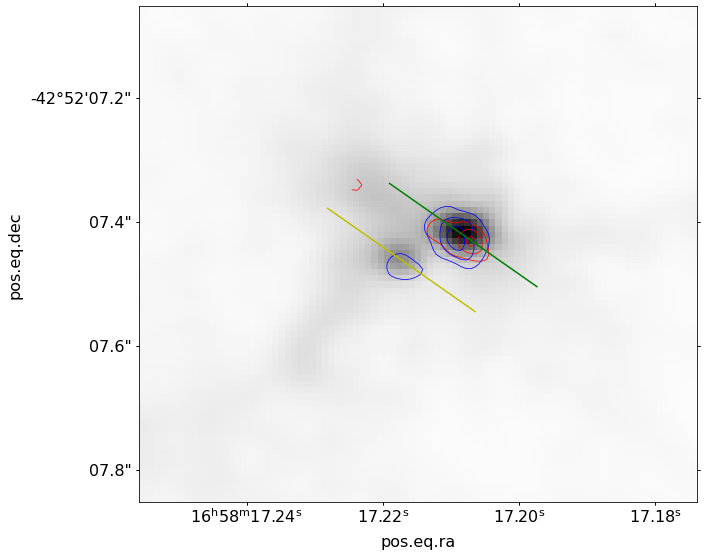

In [129]:
fig = pl.figure()
fig.add_subplot(projection=cont.wcs.celestial)
ax = fig.gca()
ax.imshow(cont[0].value, cmap='gray_r')
ax.axis((2460,2550,2530,2610))
ax.contour(m0r, colors=['r']*5, levels=[150,200,250], linewidths=[0.75]*5, transform=ax.get_transform(m0r.wcs.celestial))
ax.contour(m0b, colors=['b']*5, levels=[150,200,250], linewidths=[0.75]*5, transform=ax.get_transform(m0b.wcs.celestial))
pathA.show_on_axis(ax, spacing=1, color='g')
pathB.show_on_axis(ax, spacing=1, color='y')

In [130]:
pvA = pvextractor.extract_pv_slice(stackAcube, pathA)

In [131]:
pvB = pvextractor.extract_pv_slice(stackBcube, pathB)

In [132]:
from astropy import wcs

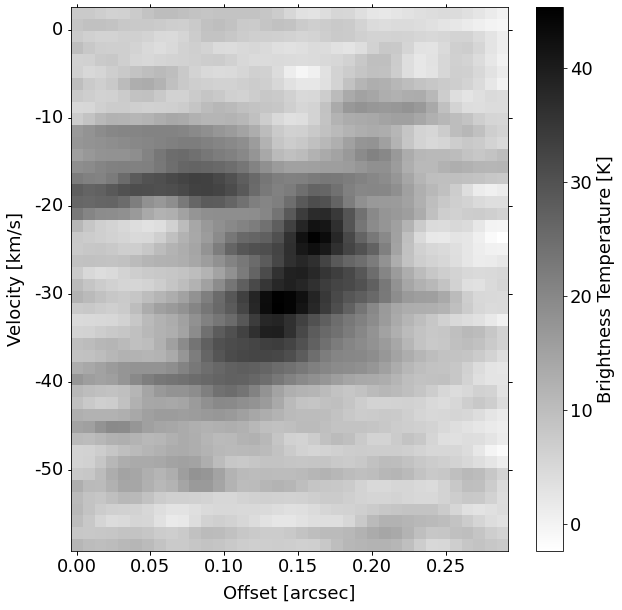

In [133]:
pl.rcParams['font.size'] = 18
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs.WCS(pvA.header))
im = ax.imshow(pvA.data, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcsec)
ax0.set_major_formatter('x.xx')
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcsec]")
ax.invert_yaxis()


pl.savefig('YichenKei/I16547_PeakA_NaCl_pvdiagram.png', bbox_inches='tight')

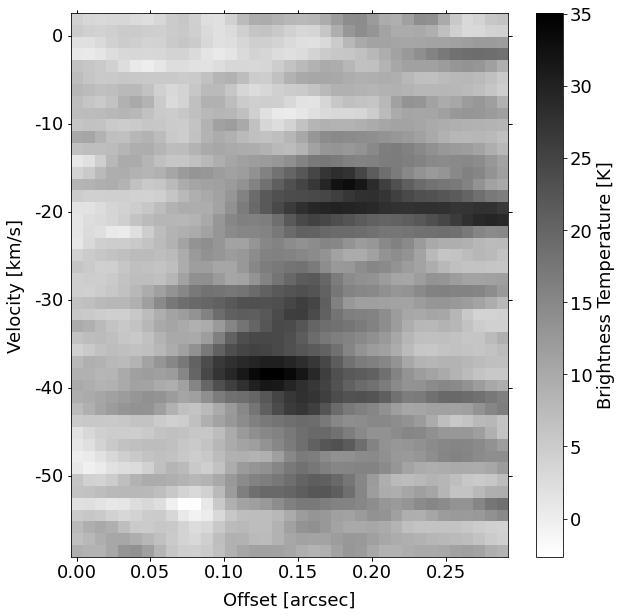

In [134]:
pl.rcParams['font.size'] = 18
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs.WCS(pvA.header))
im = ax.imshow(pvB.data, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcsec)
ax0.set_major_formatter('x.xx')
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcsec]")
ax.invert_yaxis()


pl.savefig('YichenKei/I16547_PeakB_NaCl_pvdiagram.png', bbox_inches='tight')

In [135]:
water_cube

SpectralCube with shape=(89, 125, 125) and unit=K:
 n_x:    125  type_x: RA---SIN  unit_x: deg    range:   254.571551 deg:  254.571927 deg
 n_y:    125  type_y: DEC--SIN  unit_y: deg    range:   -42.868877 deg:  -42.868601 deg
 n_s:     89  type_s: VRAD      unit_s: km / s  range:      -90.383 km / s:      20.343 km / s

In [136]:
pvAw = pvextractor.extract_pv_slice(water_cube.spectral_slab(-70*u.km/u.s, 20*u.km/u.s), pathA)

In [137]:
pvBw = pvextractor.extract_pv_slice(water_cube.spectral_slab(-75*u.km/u.s, 10*u.km/u.s), pathB)

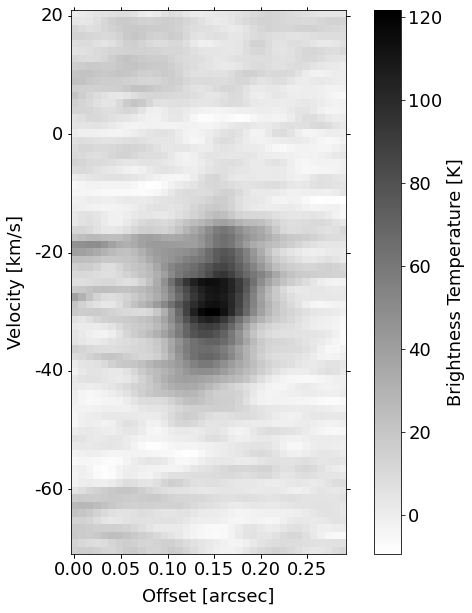

In [138]:
pl.rcParams['font.size'] = 18
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs.WCS(pvAw.header))
im = ax.imshow(pvAw.data, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcsec)
ax0.set_major_formatter('x.xx')
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcsec]")
ax.invert_yaxis()

pl.savefig('YichenKei/I16547_PeakA_H2O_pvdiagram.png', bbox_inches='tight')

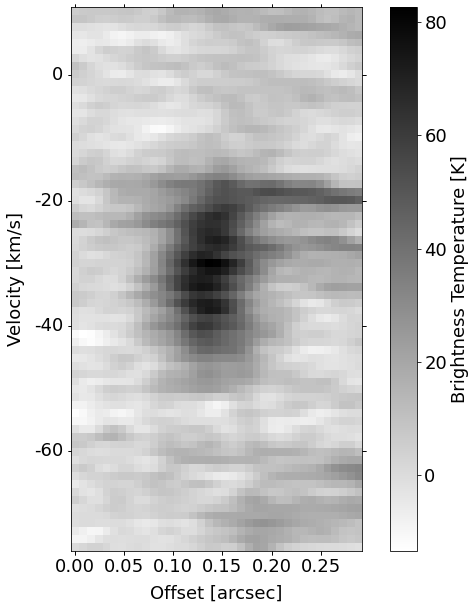

In [139]:
pl.rcParams['font.size'] = 18
fig = pl.figure(figsize=(10,10))
ax = fig.add_subplot(projection=wcs.WCS(pvBw.header))
im = ax.imshow(pvBw.data, cmap='gray_r')
cb = pl.colorbar(mappable=im)
cb.set_label("Brightness Temperature [K]")

ax0 = ax.coords[0]
ax0.set_format_unit(u.arcsec)
ax0.set_major_formatter('x.xx')
ax1 = ax.coords[1]
ax1.set_format_unit(u.km/u.s)

ax.set_ylabel("Velocity [km/s]")
ax.set_xlabel("Offset [arcsec]")
ax.invert_yaxis()


pl.savefig('YichenKei/I16547_PeakB_H2O_pvdiagram.png', bbox_inches='tight')

In [140]:
import sys
sys.path.append('/orange/adamginsburg/salt/Orion_ALMA_2016.1.00165.S/analysis')
from show_pv import show_pv
import imp
import show_pv
imp.reload(show_pv)
from show_pv import show_keplercurves, show_pv

leftmost: 0.0 arcsec
rightmost: 7.999999999999201e-05 arcsec
endpoints_x = [0.205      0.22224138] arcsec


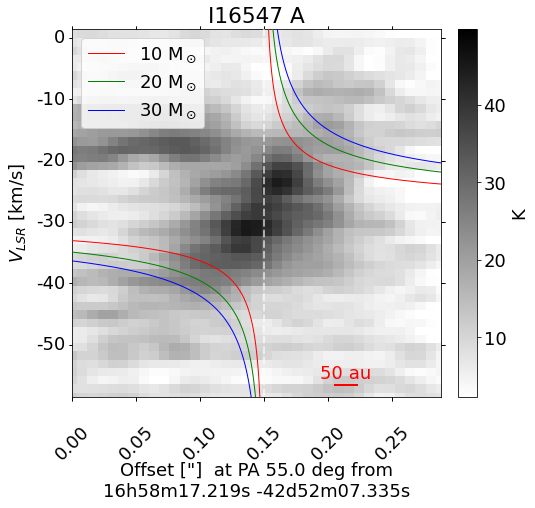

In [141]:
fig,ax,cb,con = show_pv(pvA.data, wcs.WCS(pvA.header), origin=0.15*u.arcsec, #coordinates.SkyCoord('18:22:26.3857', '-13:30:11.979', unit=(u.hour, u.deg), frame='icrs'),
                vrange=np.array([vcenA.value-30, vcenA.value+30]), vcen=vcenA, imvmin=np.nanpercentile(pvA.data, 3), imvmax=np.nanmax(pvA.data),
                        distance=2.9*u.kpc,
                        xoffset_label=0.205*u.arcsec
                    )
cb.set_label("K")
kc = show_keplercurves(ax, 0.15*u.arcsec, 500*u.au, 
                       vcen=vcenA,
                               masses=[10,20,30,],
                               linestyles=['-']*4,
                               colors=['r','g','b','c'],
                       radii={},
                       distance=2.9*u.kpc,
                              )
pl.legend(loc='upper left')
pl.xlabel(f"Offset [\"]  at PA {pathAangle} from\n{pathAcoords[0].to_string('hmsdms', precision=3)}")

pl.title("I16547 A")
pl.savefig("YichenKei/I16547A_naclPV_withcolorcurves.png")
#pl.legend(loc='best')

In [142]:
vcenB=-27*u.km/u.s

In [143]:
pathB._coords

<SkyCoord (ICRS): (ra, dec) in deg
    [(254.57169218, -42.86876307), (254.57178532, -42.86871527)]>

leftmost: 0.0 arcsec
rightmost: 7.999999999999201e-05 arcsec
endpoints_x = [0.205      0.22224138] arcsec


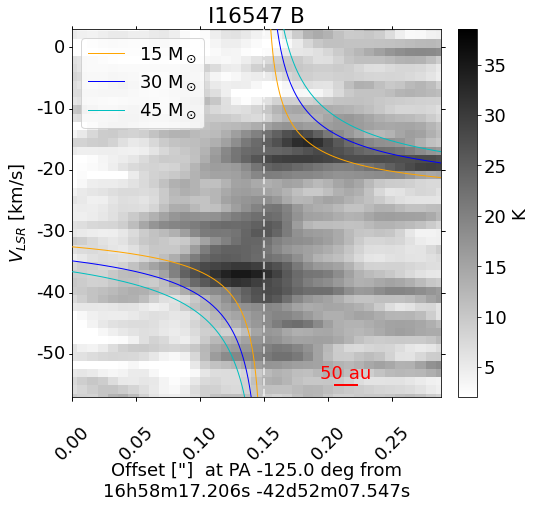

In [144]:
fig,ax,cb,con = show_pv(pvB.data, wcs.WCS(pvB.header), origin=0.15*u.arcsec, #coordinates.SkyCoord('18:22:26.3857', '-13:30:11.979', unit=(u.hour, u.deg), frame='icrs'),
                vrange=np.array([vcenB.value-30,vcenB.value+30]), vcen=vcenB, imvmin=np.nanpercentile(pvB.data, 3), imvmax=np.nanmax(pvB.data),
                        distance=2.9*u.kpc,
                        xoffset_label=0.205*u.arcsec
                    )
cb.set_label("K")
kc = show_keplercurves(ax, 0.15*u.arcsec, 500*u.au, 
                       vcen=vcenB,
                               masses=[15,30,45],
                               linestyles=['-']*4,
                               colors=['orange','b','c'],
                       radii={},
                       distance=2.9*u.kpc,
                              )
#pl.gca().xaxis.set_label("Offset [\"] from {pvBw.coords[0].to_string('hmsdms')} at PA {pathBangle}")
pl.xlabel(f"Offset [\"]  at PA {pathBangle} from\n{pathBcoords[0].to_string('hmsdms', precision=3)}")
pl.legend(loc='upper left')
pl.title("I16547 B")
pl.savefig("YichenKei/I16547B_naclPV_withcolorcurves.png")
#pl.legend(loc='best')

In [145]:
import pprint

# KCl stackl

In [146]:
# table 5 is double-rare, not detected

kcltables = salt_tables[:3]#  + salt_tables[5:]

# cubes are already loaded
# cubes = [SpectralCube.read(fn).subcube_from_regions([reg]) for fn in (glob.glob('G17_SPW[0-3]_2017.image.fits'))]
# beams = radio_beam.Beams(beams=[cube.beams.common_beam() for cube in cubes])
# cb=beams.common_beam()
linelistK = np.concatenate([data['Freq'][(data['vu'] <= 4) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubesA],
                                                 axis=0)].quantity
                             for data in kcltables])
linenamesK = np.concatenate( [data['Species'][(data['vu'] <= 4) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubesA],
                                                 axis=0)]
                             for data in kcltables] )
print(linelistK, linenamesK)
rows = [data[(data['vu'] <= 4) &
             np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                      (data['Freq'].quantity < cube.spectral_extrema[1]))
                     for cube in cubesA],
                    axis=0)]
        for data in kcltables]
KCl_inband = table.vstack(rows)
print(KCl_inband)

# exclude lines with contaminants
# 41KCl v=4 J=30-20 is the worst, apparently, b/c of NaCl v=1 17-16
# 41KCl v=0 J=31-30 is on top of NaCl v=1 18-17
# KCl v=2 29-28 is double-peaked; not clear what's up there
# 41KCl v=0 J=29-28 just looks like a nondetection?
# 39K-37Cl v=4 J=30-29 nondetection
# 39K-37Cl v=3 J=32-31 nondetection
# 41K-35Cl v=1 J=31-30 nondetection
exclude = ('41K-35Clv=0-0 J=31-30',
           '41K-35Clv=4-4 J=30-29',
           '39K-35Clv=2-2 J=29-28',
           '41K-35Clv=0-0 J=29-28',
           '39K-37Clv=4-4 J=30-29',
           '39K-37Clv=3-3 J=32-31',
           '41K-35Clv=1-1 J=31-30',           
          )
incl = np.all([linenamesK != ex for ex in exclude], axis=0)
linelistK = linelistK[incl]
linenamesK = linenamesK[incl]
linelistK, linenamesK
pprint.pprint(dict(zip(linelistK, linenamesK)))

[217.22891176 219.93611261 232.16184646 233.60569798 235.05557839
 218.39656825 219.73475809 221.07854315 232.90755269 234.33493148
 217.54316883 219.59177028 220.941078   232.49980161 234.18192351] GHz ['39K-35Clv=4-4 J=29-28' '39K-35Clv=2-2 J=29-28' '39K-35Clv=4-4 J=31-30'
 '39K-35Clv=3-3 J=31-30' '39K-35Clv=2-2 J=31-30' '39K-37Clv=4-4 J=30-29'
 '39K-37Clv=3-3 J=30-29' '39K-37Clv=2-2 J=30-29' '39K-37Clv=4-4 J=32-31'
 '39K-37Clv=3-3 J=32-31' '41K-35Clv=0-0 J=29-28' '41K-35Clv=4-4 J=30-29'
 '41K-35Clv=3-3 J=30-29' '41K-35Clv=0-0 J=31-30' '41K-35Clv=4-4 J=32-31']
upper_state lower_state    Aij    Frequency_cm        Freq               E_U                E_L              QNs       vu  vl  Ju  Jl  gu   gl         Species       
                          1 / s      1 / cm           GHz                 K                  K                                                                       
----------- ----------- --------- ------------ ------------------ ------------------ --------------

In [147]:
stackK, cutoutsK = stack_cube(cubesA,
                   linelist=linelistK,
                   vmin=-60*u.km/u.s,
                   vmax=-5*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
stackK.to(u.K).write('YichenKei/KCl_v_le_4_stackcube.fits', overwrite=True)

In [148]:
stackKc = SpectralCube.read('YichenKei/KCl_v_le_4_stackcube.fits', use_dask=True)
stackKc

DaskSpectralCube with shape=(42, 50, 50) and unit=K and chunk size (42, 50, 50):
 n_x:     50  type_x: RA---SIN  unit_x: deg    range:   254.571626 deg:  254.571775 deg
 n_y:     50  type_y: DEC--SIN  unit_y: deg    range:   -42.868783 deg:  -42.868674 deg
 n_s:     42  type_s: VRAD      unit_s: km / s  range:      -60.459 km / s:      -5.200 km / s

In [149]:
# table 5 is double-rare, not detected

kcltables = salt_tables[:3]#  + salt_tables[5:]

# cubes are already loaded
# cubes = [SpectralCube.read(fn).subcube_from_regions([reg]) for fn in (glob.glob('G17_SPW[0-3]_2017.image.fits'))]
# beams = radio_beam.Beams(beams=[cube.beams.common_beam() for cube in cubes])
# cb=beams.common_beam()
linelistK = np.concatenate([data['Freq'][(data['vu'] <= 4) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubesB],
                                                 axis=0)].quantity
                             for data in kcltables])
linenamesK = np.concatenate( [data['Species'][(data['vu'] <= 4) &
                                          np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                                                   (data['Freq'].quantity < cube.spectral_extrema[1]))
                                                 for cube in cubesB],
                                                 axis=0)]
                             for data in kcltables] )
print(linelistK, linenamesK)
rows = [data[(data['vu'] <= 4) &
             np.any([((data['Freq'].quantity > cube.spectral_extrema[0]) &
                      (data['Freq'].quantity < cube.spectral_extrema[1]))
                     for cube in cubesB],
                    axis=0)]
        for data in kcltables]
KCl_inband = table.vstack(rows)
print(KCl_inband)

# exclude lines with contaminants
# 41KCl v=4 J=30-20 is the worst, apparently, b/c of NaCl v=1 17-16
# 41KCl v=0 J=31-30 is on top of NaCl v=1 18-17
# KCl v=2 29-28 is double-peaked; not clear what's up there
# 41KCl v=0 J=29-28 just looks like a nondetection?
# 39K-37Cl v=4 J=30-29 nondetection
# 39K-37Cl v=3 J=32-31 nondetection
# 41K-35Cl v=1 J=31-30 nondetection
exclude = ('41K-35Clv=0-0 J=31-30',
           '41K-35Clv=4-4 J=30-29',
           '39K-35Clv=2-2 J=29-28',
           '41K-35Clv=0-0 J=29-28',
           '39K-37Clv=4-4 J=30-29',
           '39K-37Clv=3-3 J=32-31',
           '41K-35Clv=1-1 J=31-30',           
          )
incl = np.all([linenamesK != ex for ex in exclude], axis=0)
linelistK = linelistK[incl]
linenamesK = linenamesK[incl]
linelistK, linenamesK
pprint.pprint(dict(zip(linelistK, linenamesK)))


stackK, cutoutsK = stack_cube(cubesB,
                   linelist=linelistK,
                   vmin=-60*u.km/u.s,
                   vmax=-5*u.km/u.s,
                   average=np.nanmean,
                   convolve_beam=cb,
                   return_cutouts=True)
stackK.to(u.K).write('YichenKei/KCl_v_le_4_stackcubeB.fits', overwrite=True)

[217.22891176 219.93611261 232.16184646 233.60569798 235.05557839
 218.39656825 219.73475809 221.07854315 232.90755269 234.33493148
 217.54316883 219.59177028 220.941078   232.49980161 234.18192351] GHz ['39K-35Clv=4-4 J=29-28' '39K-35Clv=2-2 J=29-28' '39K-35Clv=4-4 J=31-30'
 '39K-35Clv=3-3 J=31-30' '39K-35Clv=2-2 J=31-30' '39K-37Clv=4-4 J=30-29'
 '39K-37Clv=3-3 J=30-29' '39K-37Clv=2-2 J=30-29' '39K-37Clv=4-4 J=32-31'
 '39K-37Clv=3-3 J=32-31' '41K-35Clv=0-0 J=29-28' '41K-35Clv=4-4 J=30-29'
 '41K-35Clv=3-3 J=30-29' '41K-35Clv=0-0 J=31-30' '41K-35Clv=4-4 J=32-31']
upper_state lower_state    Aij    Frequency_cm        Freq               E_U                E_L              QNs       vu  vl  Ju  Jl  gu   gl         Species       
                          1 / s      1 / cm           GHz                 K                  K                                                                       
----------- ----------- --------- ------------ ------------------ ------------------ --------------

In [150]:
import sys
sys.path.append('/orange/adamginsburg/salt/code/')
import imp, overplot_saltlines; imp.reload(overplot_saltlines)
from overplot_saltlines import overplot_saltlines

In [151]:
import imp
import overplot_saltlines
imp.reload(overplot_saltlines)
import lines
imp.reload(lines)
from overplot_saltlines import overplot_saltlines, all_lines, linetexnames, linefreqs
'SO65-54' in all_lines, 'H30a' in all_lines, 'H30$\\alpha$' in linetexnames, 'PN v=1 J=5-4' in linetexnames, 'PN5-4v=1' in lines.texnames

(True, True, True, True, True)

In [152]:
cubes = [SpectralCube.read(fn).subcube_from_regions([reg]) for fn in (glob.glob('G17_SPW[0-3]_2017.image.fits'))]
spectra = []
for ii,cube in enumerate(cubes):
    cube.allow_huge_operations=True
    sp = cube.subcube_from_regions(disk1).with_spectral_unit(u.GHz).mean(axis=(1,2))
    pysp = pyspeckit.Spectrum(data=sp, xarr=sp.spectral_axis, header=sp.header)
    spectra.append(pysp)
    pysp.specname = f'I16547A spw{ii+1} meanspec'

In [153]:
spectra2 = []
for ii,cube in enumerate(cubes):
    cube.allow_huge_operations=True
    sp = cube.subcube_from_regions(disk2).with_spectral_unit(u.GHz).mean(axis=(1,2))
    pysp = pyspeckit.Spectrum(data=sp, xarr=sp.spectral_axis, header=sp.header)
    spectra2.append(pysp)
    pysp.specname = f'I16547B spw{ii+1} meanspec'

In [154]:
mkdir -p spectra/figures/disk1

In [155]:
mkdir -p spectra/figures/disk2

In [156]:
overplot_saltlines(spectra, vcen=vcen, savepath='/orange/adamginsburg/salt/YichenKei/spectra/figures/disk1', ymax=180, ymin=-25, yfrac=0.6)

In [157]:
overplot_saltlines(spectra2, vcen=vcen, savepath='/orange/adamginsburg/salt/YichenKei/spectra/figures/disk2', ymax=180, ymin=-25, yfrac=0.55)

In [158]:
mkdir -p /orange/adamginsburg/salt/YichenKei/spectra/figures/disk1/

In [159]:
mkdir -p /orange/adamginsburg/salt/YichenKei/spectra/figures/disk2/

In [160]:
ls /orange/adamginsburg/salt/YichenKei/spectra/*I16547A_stack.fits

/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.217980MHz.NaCl_v=2.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.219615MHz.NaCl_v=1.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.232510MHz.NaCl_v=1.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.234252MHz.NaCl.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.350969MHz.NaCl.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.353522MHz.Na37Cl.16chan.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.Band3.spw0.selfcal.4chan.rp.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.Band3.spw1.selfcal.rp.image.pbcor_I16547A_stack.fits
/orange/adamginsburg/salt/YichenKei/spectra/IRAS16547IRAS16547.Band3.spw2.selfcal.rp.im

In [161]:
stackspectraA = []
for ii,fn in enumerate(glob.glob('/orange/adamginsburg/salt/YichenKei/spectra/*I16547A_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    basename = os.path.basename(fn)
    spl = basename.split(".")
    if not pysp.unit.is_equivalent(u.K):
        jytok = radio_beam.Beam.from_fits_header(pysp.header).jtok_equiv(pysp.xarr.to(u.GHz).mean())
        pysp.data = pysp.data_quantity.to(u.K, jytok).value
        pysp.unit = u.K
    spwname = spl[2] if 'spw' in spl[2] else spl[1] if 'MHz' in spl[1] else 'ERROR'
    band = spl[1]+" " if 'Band' in spl[1] else ''
    if spwname == 'ERROR':
        raise ValueError()
    pysp.specname = f'I16547A {band}{spwname} stack'
    stackspectraA.append(pysp)

I16547A_Band6_spw0_stack
I16547A_350969MHz_stack
I16547A_353522MHz_stack
I16547A_Band6_spw3_stack
I16547A_Band7_spw1_stack
I16547A_Band7_spw2_stack
I16547A_Band3_spw1_stack
I16547A_Band3_spw0_stack
I16547A_Band3_spw3_stack
I16547A_234252MHz_stack
I16547A_217980MHz_stack
I16547A_219615MHz_stack
I16547A_Band6_spw2_stack
I16547A_Band7_spw3_stack
I16547A_Band7_spw0_stack
I16547A_Band3_spw2_stack
I16547A_232510MHz_stack
I16547A_Band6_spw1_stack


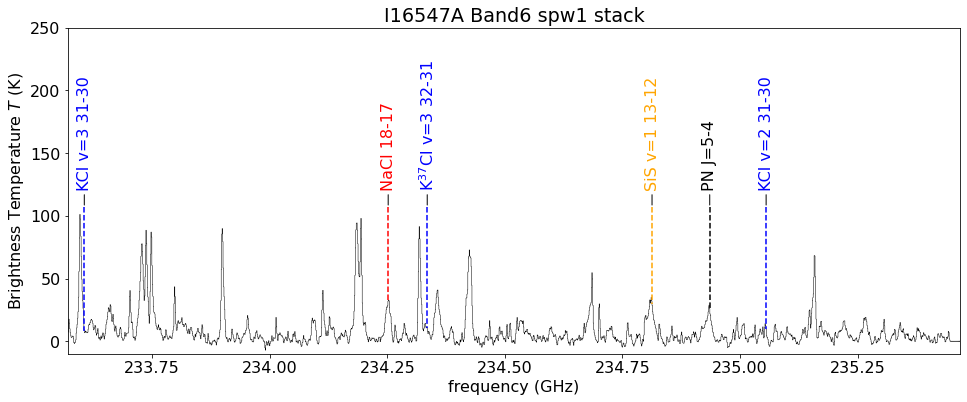

In [162]:
overplot_saltlines(stackspectraA, vcen=0*u.km/u.s, savepath='/orange/adamginsburg/salt/YichenKei/spectra/figures/disk1/', ymax=250, ymin=-10, yfrac=0.50)

In [163]:
stackspectraB = []
for ii,fn in enumerate(glob.glob('/orange/adamginsburg/salt/YichenKei/spectra/*I16547B_stack.fits')):
    pysp = pyspeckit.Spectrum(fn)
    if not pysp.unit.is_equivalent(u.K):
        jytok = radio_beam.Beam.from_fits_header(pysp.header).jtok_equiv(pysp.xarr.to(u.GHz).mean())
        pysp.data = pysp.data_quantity.to(u.K, jytok).value
        pysp.unit = u.K    
    basename = os.path.basename(fn)
    spl = basename.split(".")
    spwname = spl[2] if 'spw' in spl[2] else spl[1] if 'MHz' in spl[1] else 'ERROR'
    band = spl[1]+" " if 'Band' in spl[1] else ''
    if spwname == 'ERROR':
        raise ValueError()
    pysp.specname = f'I16547B {band}{spwname} stack'
    stackspectraB.append(pysp)

I16547B_217980MHz_stack
I16547B_Band7_spw0_stack
I16547B_232510MHz_stack
I16547B_234252MHz_stack
I16547B_Band6_spw3_stack
I16547B_Band6_spw2_stack
I16547B_Band3_spw0_stack
I16547B_Band3_spw3_stack
I16547B_Band6_spw0_stack
I16547B_Band6_spw1_stack
I16547B_Band7_spw3_stack
I16547B_Band3_spw2_stack
I16547B_350969MHz_stack
I16547B_Band7_spw2_stack
I16547B_219615MHz_stack
I16547B_Band3_spw1_stack
I16547B_Band7_spw1_stack
I16547B_353522MHz_stack


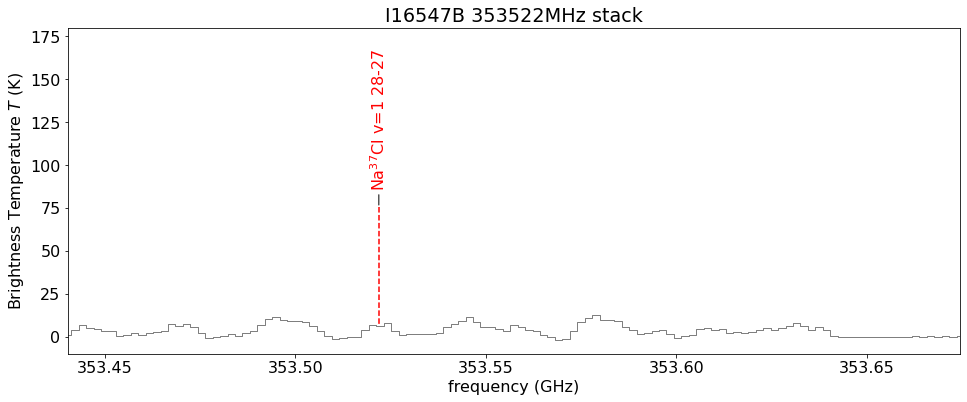

In [164]:
overplot_saltlines(stackspectraB, vcen=0*u.km/u.s, savepath='/orange/adamginsburg/salt/YichenKei/spectra/figures/disk2/',  ymax=180, ymin=-10,  yfrac=0.50)

In [165]:
from IPython.display import Image, display

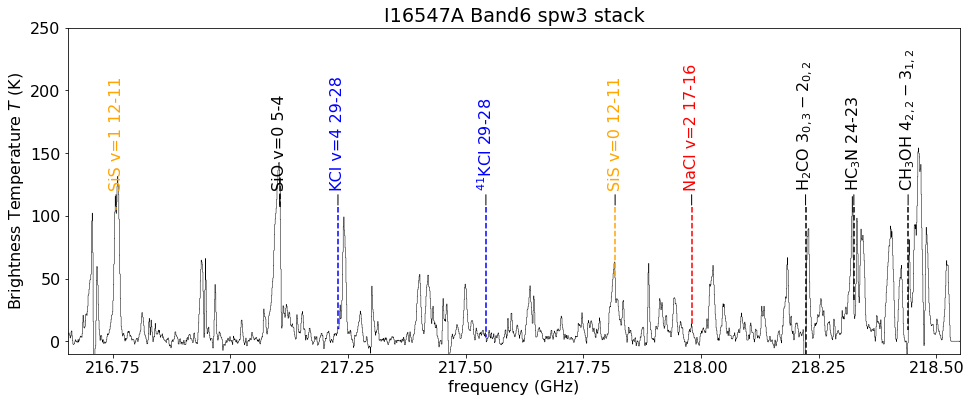

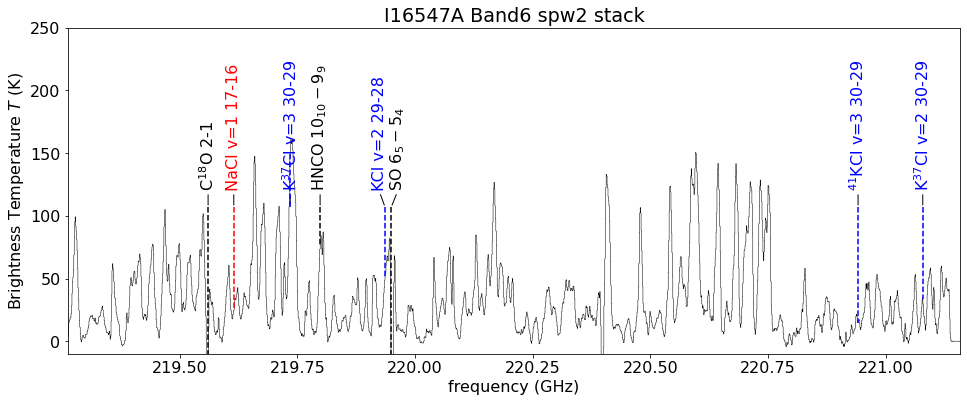

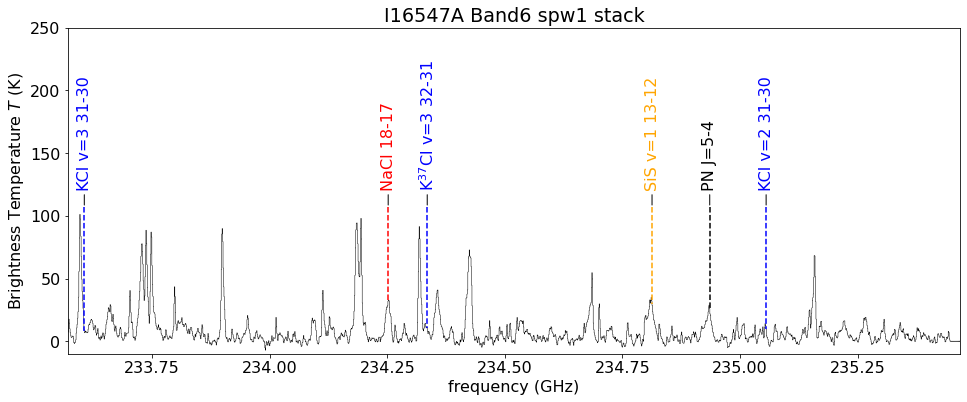

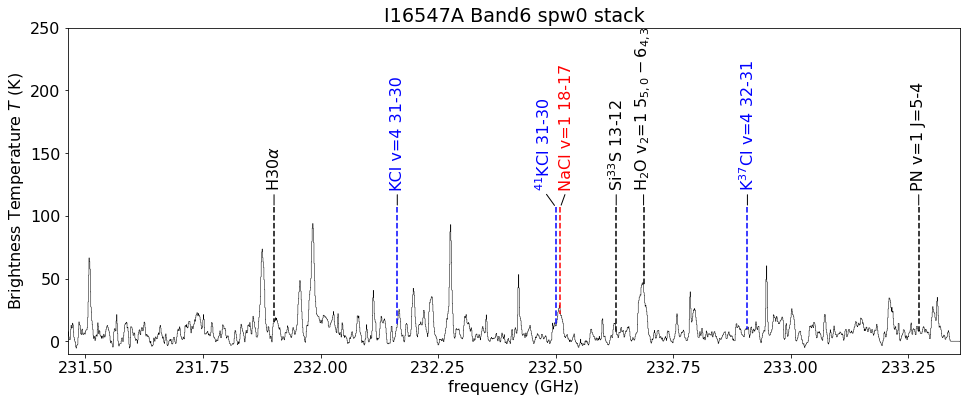

In [166]:
for fn in glob.glob('/orange/adamginsburg/salt/YichenKei/spectra/figures/disk1/color*Band6*stack.png'):
    display(Image(fn))

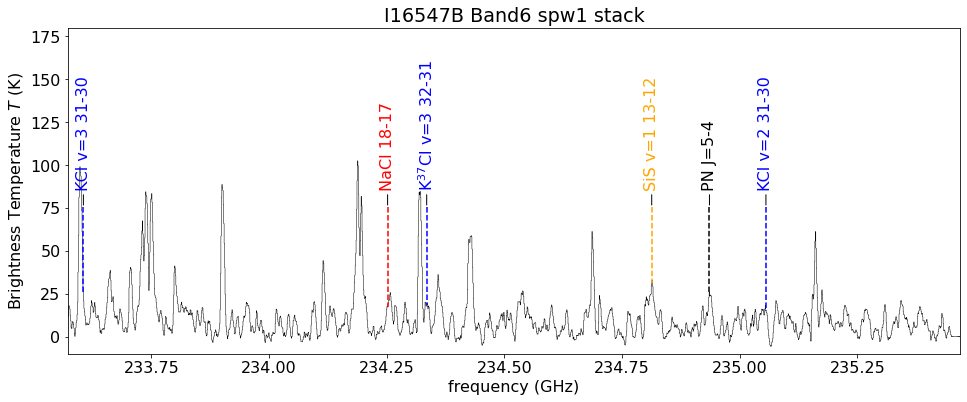

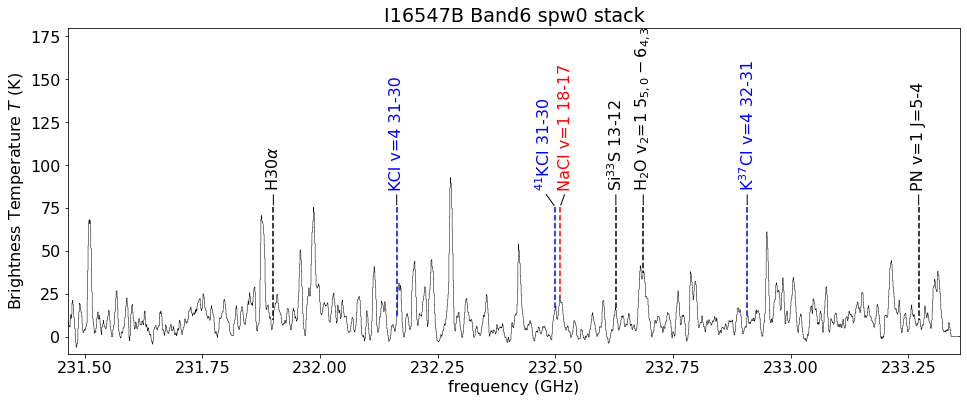

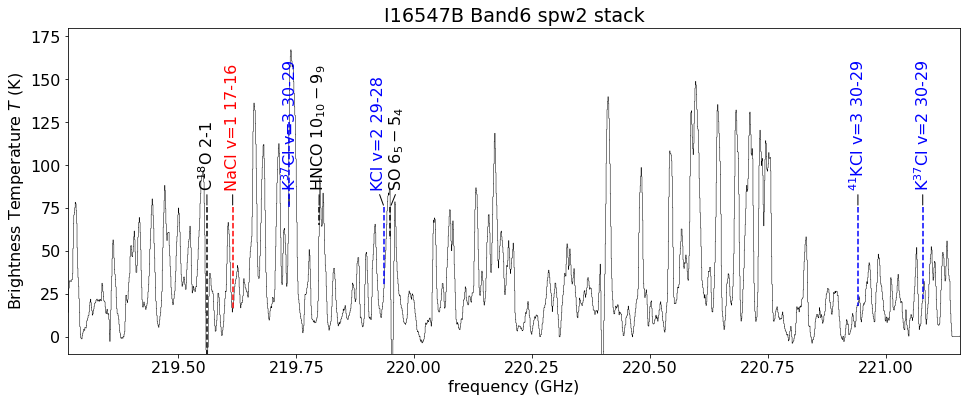

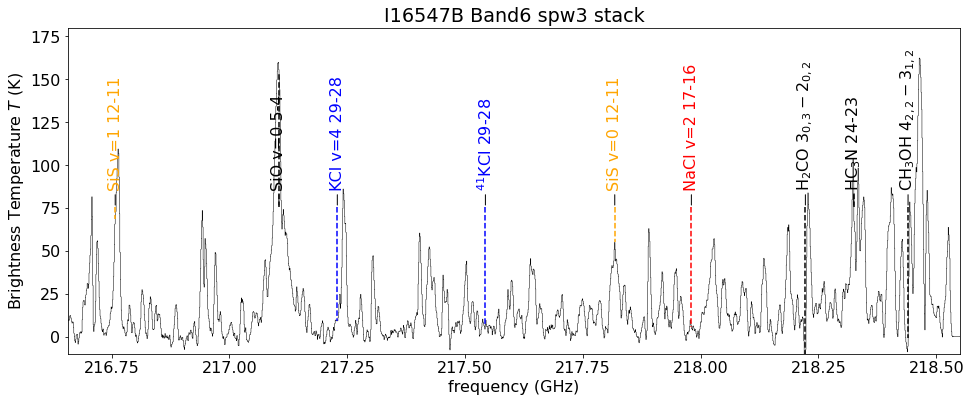

In [167]:
for fn in glob.glob('/orange/adamginsburg/salt/YichenKei/spectra/figures/disk2/color*Band6*stack.png'):
    display(Image(fn))

In [168]:
from astroquery.splatalogue import Splatalogue
Splatalogue.query_lines(200*u.GHz, 240*u.GHz, chemical_name='PN', line_lists=['SLAIM'])

<Table length=4>
Species    Chemical Name    Freq-GHz(rest frame,redshifted) Freq Err(rest frame,redshifted) Meas Freq-GHz(rest frame,redshifted) Meas Freq Err(rest frame,redshifted) ...  E_L (K)   E_U (cm^-1)  E_U (K)   Upper State Degeneracy Linelist
  str5         str19                    float64                         float64                           float64                              float64                ...  float64     float64    float64          float64           str5  
------- ------------------- ------------------------------- ------------------------------- ------------------------------------ ------------------------------------ ... ---------- ----------- ---------- ---------------------- --------
  PNv=3 Phosphorous nitride                      229.930135                        0.000166                            229.93013                                5e-05 ... 5673.34683  3950.86564 5684.38167                   11.0    SLAIM
  PNv=2 Phosphorous nitride                      231.603462                        0.000116                            231.60354                                5e-05 ... 3809.71554  2655.62546 3820.83069                   11.0    SLAIM
  PNv=1 Phosphorous nitride                        233.2718                         6.6e-05                            233.27182                                3e-05 ... 1926.10406  1346.49811 1937.29928                   11.0    SLAIM
  PNv=0 Phosphorous nitride                      234.935663                         6.9e-05                            234.93569                                3e-05 ...   22.55126    23.51061   33.82633                   11.0    SLAIM

In [169]:
Splatalogue.query_lines(84*u.GHz, 101*u.GHz, chemical_name='PN', line_lists=['SLAIM'])

<Table length=4>
Species    Chemical Name    Freq-GHz(rest frame,redshifted) Freq Err(rest frame,redshifted) Meas Freq-GHz(rest frame,redshifted) Meas Freq Err(rest frame,redshifted) ...  E_L (K)   E_U (cm^-1)  E_U (K)   Upper State Degeneracy Linelist
  str5         str19                    float64                         float64                           float64                              float64                ...  float64     float64    float64          float64           str5  
------- ------------------- ------------------------------- ------------------------------- ------------------------------------ ------------------------------------ ... ---------- ----------- ---------- ---------------------- --------
  PNv=3 Phosphorous nitride                       91.977583                         6.9e-05                                   --                                   -- ... 5653.48319  3932.45804 5657.89739                    5.0    SLAIM
  PNv=2 Phosphorous nitride                        92.64689                         5.1e-05                                   --                                   -- ... 3789.70658  2637.08337  3794.1529                    5.0    SLAIM
  PNv=1 Phosphorous nitride                       93.314209                         3.7e-05                             93.31423                                3e-05 ... 1905.95123  1327.82263 1910.42958                    5.0    SLAIM
  PNv=0 Phosphorous nitride                       93.979745                         4.2e-05                             93.97978                                3e-05 ...    2.25455     4.70183    6.76484                    5.0    SLAIM

In [170]:
Splatalogue.query_lines(338*u.GHz, 355*u.GHz, chemical_name='PN', line_lists=['SLAIM'])

<Table length=0>
Species Chemical Name Freq-GHz(rest frame,redshifted) Freq Err(rest frame,redshifted) Meas Freq-GHz(rest frame,redshifted) Meas Freq Err(rest frame,redshifted) ... E_L (cm^-1) E_L (K) E_U (cm^-1) E_U (K) Upper State Degeneracy Linelist
 int64      int64                  int64                           int64                             int64                                int64                 ...    int64     int64     int64     int64          int64           int64  
------- ------------- ------------------------------- ------------------------------- ------------------------------------ ------------------------------------ ... ----------- ------- ----------- ------- ---------------------- --------

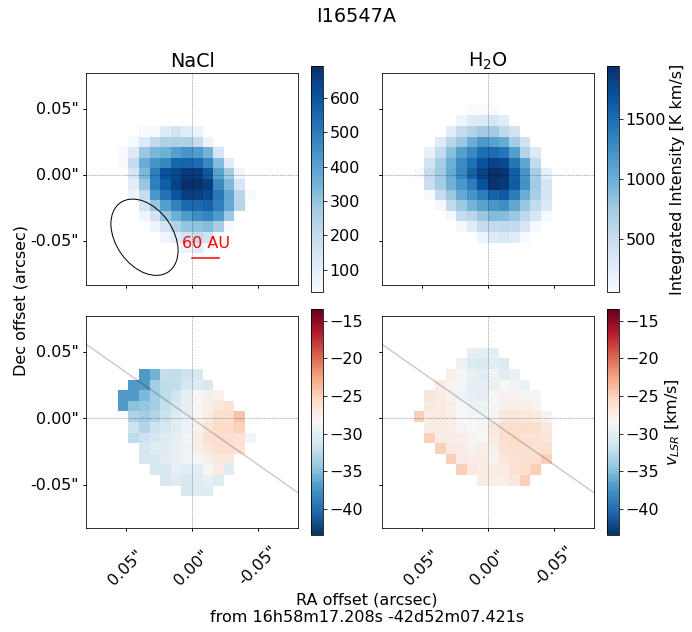

In [206]:
from dask_image.ndmorph import binary_dilation, binary_erosion
from scipy.ndimage import binary_dilation, binary_erosion

vcen = vcenA

slcs = slice(None), slice(None), slice(None) #slice(4,-1), slice(6,-6)
m3d = (stackAcube.subcube_from_regions([peakAcirc]) > 30*u.K).include()
m3d = scipy.ndimage.binary_erosion(m3d, iterations=1)
m3d = scipy.ndimage.binary_dilation(m3d, iterations=2)
#m3d = m3d.compute()

m0 = stackAcube.subcube_from_regions([peakAcirc]).with_mask(m3d)[slcs].moment0()
m1 = stackAcube.subcube_from_regions([peakAcirc]).with_mask(m3d)[slcs].moment1()

pixscale_au = (stackAcube.wcs.proj_plane_pixel_area()**0.5 * distance).to(u.au, u.dimensionless_angles())

restval = 232.6867*u.GHz # 'H2Ov2=1_5(5,0)-6(4,3)': 
h2ocube = watercube = scube = (water_cube.subcube_from_regions([peakAcirc])
         .with_spectral_unit(u.GHz)
         .with_spectral_unit(u.km/u.s,
                             velocity_convention='radio',
                             rest_value=restval)
         .spectral_slab(-20*u.km/u.s+vcen, 20*u.km/u.s+vcen))

m3dw = (h2ocube > 60*u.K).include()
m3dw = binary_erosion(m3dw, iterations=1)
m3dw = binary_dilation(m3dw, iterations=2)
#m3dw = m3dw.compute()

m1h2o = scube.with_mask(m3dw)[slcs].moment1()
m0h2o = scube.with_mask(m3dw)[slcs].moment0()

fig = pl.figure(figsize=(10,9))
ax1 = pl.subplot(2,2,1, projection=m0.wcs)
im1 = ax1.imshow(m0.value, cmap='Blues', origin='lower')
ax1.set_title("NaCl")
pl.colorbar(mappable=im1)


ax2 = pl.subplot(2,2,2, projection=m0h2o.wcs)
im2 = ax2.imshow(m0h2o.value, cmap='Blues', origin='lower',)
ax2.set_title("H$_2$O")
cb2 = pl.colorbar(mappable=im2)
cb2.set_label("Integrated Intensity [K km/s]")

ax3 = pl.subplot(2,2,3, projection=m1.wcs)
im3 = ax3.imshow(m1.value, cmap='RdBu_r', origin='lower',  vmin=vcen.value-15, vmax=vcen.value+15)
pl.colorbar(mappable=im3)


ax4 = pl.subplot(2,2,4, projection=m1h2o.wcs)
im4 = ax4.imshow(m1h2o.value, cmap='RdBu_r', origin='lower', vmin=vcen.value-15, vmax=vcen.value+15)
cb4 = pl.colorbar(mappable=im4)
cb4.set_label("$v_{LSR}$ [km/s]")

dp_60 = (60*u.au / pixscale_au).decompose()
pixscale = np.abs((wcs.utils.proj_plane_pixel_area(m0.wcs)**0.5*u.deg).to(u.arcsec))

axlims = ax1.axis()

#xc,yc = 10,12
#offset_loc = m0.wcs.celestial.pixel_to_world(xc,yc)
offset_loc = [peakAcirc][0].center
#offset_loc = coordinates.SkyCoord("17:26:42.344 -36:09:16.14", unit=(u.h, u.deg), frame='icrs')
xc,yc = m0.wcs.celestial.world_to_pixel(offset_loc)

for ax_ in (ax1,ax2,ax3,ax4):

    xtlocs = ax_.get_xticks()
    xticklabels = map(lambda x: f"{x:0.3f}", (xc-xtlocs)*pixscale.value)
    ax_.set_xticks(xtlocs, xticklabels, rotation=45)
    ax_.axhline(yc, color='k', linestyle='--', linewidth=0.5, alpha=0.5)
    ax_.axvline(xc, color='k', linestyle='--', linewidth=0.5, alpha=0.5)

    ytlocs = ax1.get_yticks()
    yticklabels = map(lambda x: f"{x:0.3f}", (ytlocs-yc)*pixscale.value)
    ax_.set_yticks(ytlocs, yticklabels, rotation=0)

    ax_.axis(axlims)
    
    ra = ax_.coords['ra']
    ra.set_auto_axislabel(False)
    dec = ax_.coords['dec']
    ra.set_coord_type('longitude', 180)
    overlay = ax_.get_coords_overlay(offset_loc.skyoffset_frame())
    ra.set_ticklabel_visible(False)
    dec.set_ticklabel_visible(False)
    ra.set_ticks_visible(False)
    dec.set_ticks_visible(False)

    lon = overlay['lon']
    lon.set_coord_type('longitude', 180)
    lon.set_format_unit(u.arcsec)
    lon.set_ticklabel(rotation=45, pad=40)
    lon.set_ticks_position('b')
    lon.set_ticklabel_position('b')
    lon.set_axislabel_position('b')
    lon.set_axislabel(" ")
    lon.set_ticks(spacing=0.05*u.arcsec)
    lat = overlay['lat']
    lat.set_format_unit(u.arcsec)
    lat.set_ticklabel()
    lat.set_ticks_position('l')
    lat.set_ticklabel_position('l')
    lat.set_axislabel_position('l')
    lat.set_axislabel(" ")    

ax1.overlay_coords['lon'].set_ticklabel_visible(False)
ax2.overlay_coords['lon'].set_ticklabel_visible(False)
ax2.overlay_coords['lat'].set_ticklabel_visible(False)
ax4.overlay_coords['lat'].set_ticklabel_visible(False)


pl.suptitle("I16547A")
blx = xc
bly = 2
ax1.plot([blx, blx+dp_60], [bly,bly], color='r')
ax1.text(blx + dp_60/2, bly+1, f'60 AU', horizontalalignment='center', color='r')

bm = stackAcube.beam
bmell = bm.ellipse_to_plot(5, 4, pixscale)
bmell.set_facecolor('none')
bmell.set_edgecolor('k')
ax1.add_artist(bmell)

pathA.show_on_axis(ax3, spacing=1, color='k', alpha=0.2)
pathA.show_on_axis(ax4, spacing=1, color='k', alpha=0.2)

ax = fig.add_subplot(111,frameon=False)
pl.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.set_xlabel(f"RA offset (arcsec)\nfrom {offset_loc.to_string('hmsdms', precision=3)}", labelpad=35)
ax.set_ylabel("Dec offset (arcsec)", labelpad=25)


pl.tight_layout()
pl.savefig("YichenKei/I16547A_m0m1_grid_ticks.png", bbox_inches='tight', dpi=300)

#contrep,_ = reproject.reproject_interp(cont[0].hdu, m0.header)
#for ax_ in (ax1,ax2,ax3,ax4):
#    ax_.contour(contrep,
#                levels=[0.01, 0.02, 0.03, 0.04], colors=['k']*5, linewidths=[0.5]*5)
#pl.savefig("I16547A_m0m1_grid_ticks_withcont.png", bbox_inches='tight', dpi=300)

In [193]:
stackBcube

SpectralCube with shape=(46, 50, 50) and unit=K:
 n_x:     50  type_x: RA---SIN  unit_x: deg    range:   254.571666 deg:  254.571814 deg
 n_y:     50  type_y: DEC--SIN  unit_y: deg    range:   -42.868794 deg:  -42.868686 deg
 n_s:     46  type_s: VRAD      unit_s: km / s  range:      -57.127 km / s:       3.313 km / s

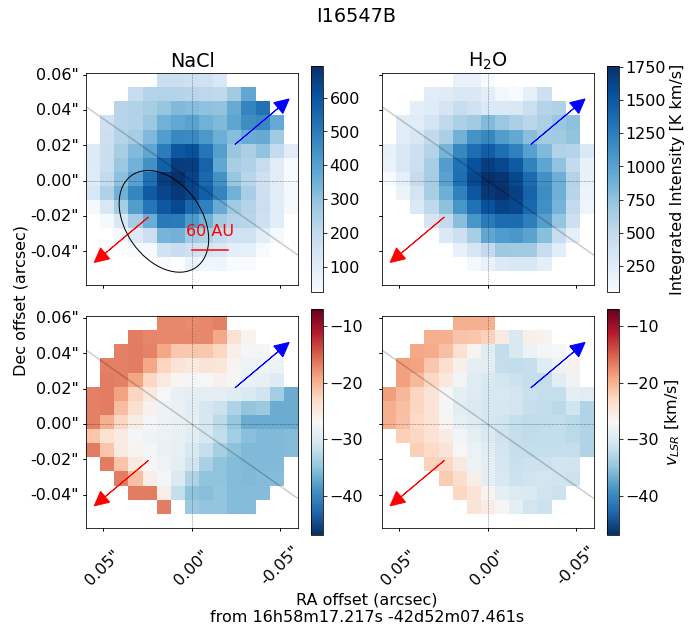

In [217]:
from dask_image.ndmorph import binary_dilation, binary_erosion
from scipy.ndimage import binary_dilation, binary_erosion


vcen = vcenB

slcs = slice(None), slice(None), slice(None) #slice(4,-1), slice(6,-6)

vmin, vmax = -25*u.km/u.s+vcen, 25*u.km/u.s+vcen
m3d = (stackBcube.spectral_slab(vmin, vmax)
       .subcube_from_regions([peakBcirc]) > 20*u.K).include()
m3d = scipy.ndimage.binary_erosion(m3d, iterations=2)
m3d = scipy.ndimage.binary_dilation(m3d, iterations=3)
#m3d = m3d.compute()

m0 = stackBcube.spectral_slab(vmin, vmax).subcube_from_regions([peakBcirc]).with_mask(m3d)[slcs].moment0()
m1 = stackBcube.spectral_slab(vmin, vmax).subcube_from_regions([peakBcirc]).with_mask(m3d)[slcs].moment1()

pixscale_au = (stackBcube.wcs.proj_plane_pixel_area()**0.5 * distance).to(u.au, u.dimensionless_angles())

restval = 232.6867*u.GHz # 'H2Ov2=1_5(5,0)-6(4,3)': 
h2ocube = watercube = scube = (water_cube.subcube_from_regions([peakBcirc])
         .with_spectral_unit(u.GHz)
         .with_spectral_unit(u.km/u.s,
                             velocity_convention='radio',
                             rest_value=restval)
         .spectral_slab(-20*u.km/u.s+vcen, 20*u.km/u.s+vcen))

m3dw = (h2ocube > 40*u.K).include()
m3dw = binary_erosion(m3dw, iterations=1)
m3dw = binary_dilation(m3dw, iterations=2)
#m3dw = m3dw.compute()

m1h2o = scube.with_mask(m3dw)[slcs].moment1()
m0h2o = scube.with_mask(m3dw)[slcs].moment0()

fig = pl.figure(figsize=(10,9))
ax1 = pl.subplot(2,2,1, projection=m0.wcs)
im1 = ax1.imshow(m0.value, cmap='Blues', origin='lower')
ax1.set_title("NaCl")
pl.colorbar(mappable=im1)


ax2 = pl.subplot(2,2,2, projection=m0h2o.wcs)
im2 = ax2.imshow(m0h2o.value, cmap='Blues', origin='lower',)
ax2.set_title("H$_2$O")
cb2 = pl.colorbar(mappable=im2)
cb2.set_label("Integrated Intensity [K km/s]")

ax3 = pl.subplot(2,2,3, projection=m1.wcs)
im3 = ax3.imshow(m1.value, cmap='RdBu_r', origin='lower',  vmin=vcen.value-20, vmax=vcen.value+20)
pl.colorbar(mappable=im3)


ax4 = pl.subplot(2,2,4, projection=m1h2o.wcs)
im4 = ax4.imshow(m1h2o.value, cmap='RdBu_r', origin='lower', vmin=vcen.value-20, vmax=vcen.value+20)
cb4 = pl.colorbar(mappable=im4)
cb4.set_label("$v_{LSR}$ [km/s]")

dp_60 = (60*u.au / pixscale_au).decompose()
pixscale = np.abs((wcs.utils.proj_plane_pixel_area(m0.wcs)**0.5*u.deg).to(u.arcsec))

axlims = ax1.axis()

#xc,yc = 10,12
#offset_loc = m0.wcs.celestial.pixel_to_world(xc,yc)
offset_loc = [peakBcirc][0].center
#offset_loc = coordinates.SkyCoord("17:26:42.344 -36:09:16.14", unit=(u.h, u.deg), frame='icrs')
xc,yc = m0.wcs.celestial.world_to_pixel(offset_loc)

for ax_ in (ax1,ax2,ax3,ax4):

    xtlocs = ax_.get_xticks()
    xticklabels = map(lambda x: f"{x:0.3f}", (xc-xtlocs)*pixscale.value)
    ax_.set_xticks(xtlocs, xticklabels, rotation=45)
    ax_.axhline(yc, color='k', linestyle='--', linewidth=0.5, alpha=0.5)
    ax_.axvline(xc, color='k', linestyle='--', linewidth=0.5, alpha=0.5)

    ytlocs = ax1.get_yticks()
    yticklabels = map(lambda x: f"{x:0.3f}", (ytlocs-yc)*pixscale.value)
    ax_.set_yticks(ytlocs, yticklabels, rotation=0)

    ax_.axis(axlims)
    
    ra = ax_.coords['ra']
    ra.set_auto_axislabel(False)
    dec = ax_.coords['dec']
    ra.set_coord_type('longitude', 180)
    overlay = ax_.get_coords_overlay(offset_loc.skyoffset_frame())
    ra.set_ticklabel_visible(False)
    dec.set_ticklabel_visible(False)
    ra.set_ticks_visible(False)
    dec.set_ticks_visible(False)

    lon = overlay['lon']
    lon.set_coord_type('longitude', 180)
    lon.set_format_unit(u.arcsec)
    lon.set_ticklabel(rotation=45, pad=40)
    lon.set_ticks_position('b')
    lon.set_ticklabel_position('b')
    lon.set_axislabel_position('b')
    lon.set_axislabel(" ")
    lon.set_ticks(spacing=0.05*u.arcsec)
    lat = overlay['lat']
    lat.set_format_unit(u.arcsec)
    lat.set_ticklabel()
    lat.set_ticks_position('l')
    lat.set_ticklabel_position('l')
    lat.set_axislabel_position('l')
    lat.set_axislabel(" ")    

ax1.overlay_coords['lon'].set_ticklabel_visible(False)
ax2.overlay_coords['lon'].set_ticklabel_visible(False)
ax2.overlay_coords['lat'].set_ticklabel_visible(False)
ax4.overlay_coords['lat'].set_ticklabel_visible(False)


pl.suptitle("I16547B")
blx = xc
bly = 2
ax1.plot([blx, blx+dp_60], [bly,bly], color='r')
ax1.text(blx + dp_60/2, bly+1, f'60 AU', horizontalalignment='center', color='r')


angle = 50*u.deg
dl = 4
dx = np.sin(angle)*dl
dy = np.cos(angle)*dl
for ax_ in (ax1, ax2, ax3, ax4):
    ax_.arrow(xc+dx, yc+dy, dx, dy, head_width=1, head_length=1, color='blue')
    ax_.arrow(xc-dx, yc-dy, -dx, -dy, head_width=1, head_length=1, color='red')
    pathB.show_on_axis(ax_, spacing=1, color='k', alpha=0.2)


bm = stackBcube.beam
bmell = bm.ellipse_to_plot(5, 4, pixscale)
bmell.set_facecolor('none')
bmell.set_edgecolor('k')
ax1.add_artist(bmell)


ax = fig.add_subplot(111,frameon=False)
pl.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.set_xlabel(f"RA offset (arcsec)\nfrom {offset_loc.to_string('hmsdms', precision=3)}", labelpad=35)
ax.set_ylabel("Dec offset (arcsec)", labelpad=25)


pl.tight_layout()
pl.savefig("YichenKei/I16547B_m0m1_grid_ticks.png", bbox_inches='tight', dpi=300)

#contrep,_ = reproject.reproject_interp(cont[0].hdu, m0.header)
#for ax_ in (ax1,ax2,ax3,ax4):
#    ax_.contour(contrep,
#                levels=[0.01, 0.02, 0.03, 0.04], colors=['k']*5, linewidths=[0.5]*5)
#pl.savefig("I16547B_m0m1_grid_ticks_withcont.png", bbox_inches='tight', dpi=300)

In [202]:
pwd

'/orange/adamginsburg/salt'